In [1]:
cd ..

/home/msi/projects/diplomka


In [2]:
import pandas as pd
import glob
from datetime import datetime, timedelta
import networkx as nx
import math
import numpy as np
import matplotlib.pyplot as plt
from itertools import count
import seaborn as sns
import netgraph as ng
from collections import defaultdict
from hashlib import sha1
import json
import pandas as pd
import netgraph as ng

In [3]:
from trct import TraceMonitor, SiteTraceMonitor

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

np.printoptions(precision=2)

sns.set_style("darkgrid")
sns.set_context("paper")

# Get files

In [59]:
dataset = 'FZK_LCCG2-INFN_T1'
dataset = 'INFN_T1-CSCS_LCG2'
dataset = 'CA_SFU_T2-CSCS_LCG2'
dataset = 'SARA_MATRIX-CSCS_LCG2'
# dataset = 'CA-VICTORIA-WESTGRID-T2_CSCS-LCG2'
dataset = 'NDGF_T1-CSCS_LCG2'
dataset = 'BNL_ATLAS-CSCS_LCG2'

In [60]:
# files = sorted(glob.glob("data/sites/CA_SFU_T2-CSCS_LCG2/*.json"))
files = sorted(glob.glob(f"data/sites/{dataset}/*.json"))
len(files)

69781

In [61]:
with open(files[0], 'r') as f:
    data = json.load(f)

In [62]:
src, dest = data['src'], data['dest']

# Processing

In [63]:
files = sorted(
    # glob.glob("data/out/FZK_LCCG2-INF_T1/*.json")
    files
    )

In [64]:
with open(files[34840], "r") as f:
    json_data = json.load(f)

In [65]:
src_site, dest_site = dataset.split('-')

In [66]:
stm = SiteTraceMonitor(src_site, dest_site)

In [67]:
stm.src

'BNL_ATLAS'

In [68]:
stm.process(files)

100%|██████████| 69781/69781 [00:37<00:00, 1838.86it/s]


In [69]:
ips = set()
for k, v in stm.trace_models.items():
    # fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # v.hops_ip_model.plot(ax)
    # v.hops_ip_model.plot_graph(ax)
    # ax.legend()
    # ax2.legend()
    ips.update(v.hops_ip_model.nodes)

In [70]:
list(ips)

['2001:400:0:6a4::1',
 '192.12.15.23',
 '2001:400:0:74b::',
 '2001:620:0:c061::2',
 '2001:620:0:c054::1',
 '62.40.124.77',
 '10.224.2.37',
 '62.40.124.22',
 '192.12.15.26',
 '130.59.37.145',
 '2001:620:0:c094::2',
 '134.55.58.147',
 '2001:400:0:71c::',
 '2001:798:99:1::15',
 '134.55.58.56',
 '2001:400:0:60::2',
 '2620:0:210:1::26',
 '134.55.58.57',
 '2001:620:0:c05b::2',
 '130.59.39.150',
 '198.124.216.9',
 '130.59.38.34',
 '130.59.36.246',
 '2620:0:210:1::3',
 '148.187.129.15',
 '2001:620:0:c005::1',
 '134.55.58.63',
 '62.40.98.187',
 '2001:798:99:1::d',
 '2001:620:0:c04f::2',
 'fddd:7d33:c9b4:ff::21',
 '2001:620:0:ffaf::',
 '2001:620:0:c05c::2',
 '134.55.58.58',
 '130.59.38.53',
 '2001:620:0:c0ce::1',
 'fddd:7d33:c9b4:ff::25',
 '130.59.38.206',
 '148.187.0.10',
 '2001:798:cc::e',
 '2001:400:0:66b::',
 '134.55.58.146',
 '2001:400:0:74b::1',
 '192.12.15.224',
 '2001:620:0:c00c::2',
 '2001:400:0:71f::',
 '130.59.38.82',
 '2001:400:0:71e::',
 '134.55.58.52',
 '2001:620:0:c0c7::1',
 '2001

In [71]:
meta_df = pd.read_csv(f"data/ip_metadata/{dataset}.csv")


In [72]:
ip_to_geo = meta_df[(meta_df['latitude'].notna())].set_index('ip')[['latitude', 'longitude']].apply(lambda x: np.array(tuple(x)), axis=1).to_dict()

In [74]:
for k in stm.trace_models:
    with open(f"data/out/geo_data/{dataset}-{k[0]}-{k[1]}.json", "w") as f:
        f.write(stm.trace_models[k].hops_ip_model.to_json(ip_to_geo, 2))

    # fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    # stm.trace_models[k].hops_ip_model.plot(ax)
    # stm.trace_models[k].destination_reached_model.plot(ax2)
    # ax.legend()
    # ax2.legend()

In [1]:
import warnings
warnings.filterwarnings('ignore')

('145.100.32.32', '148.187.129.15')


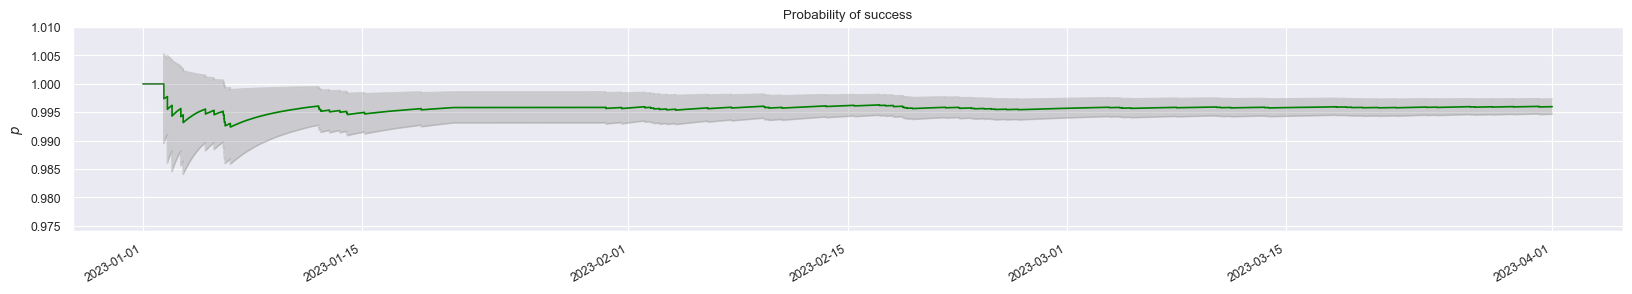

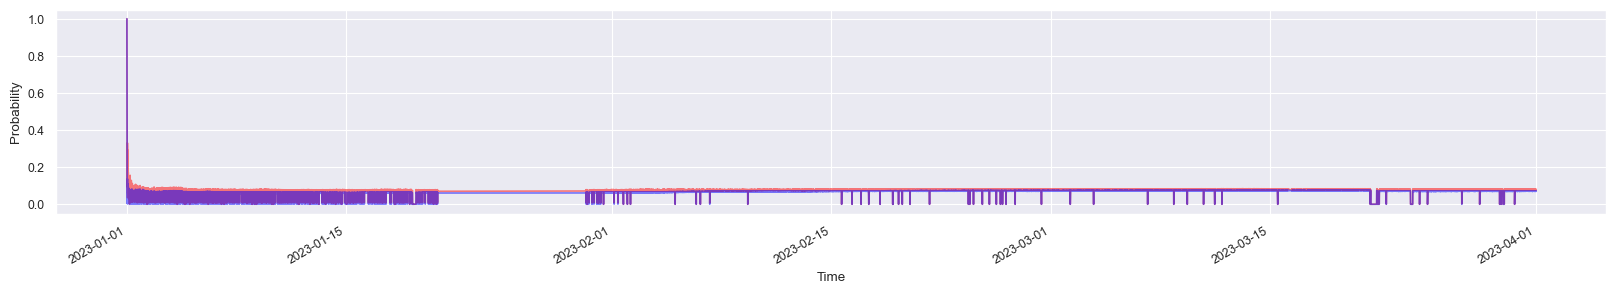

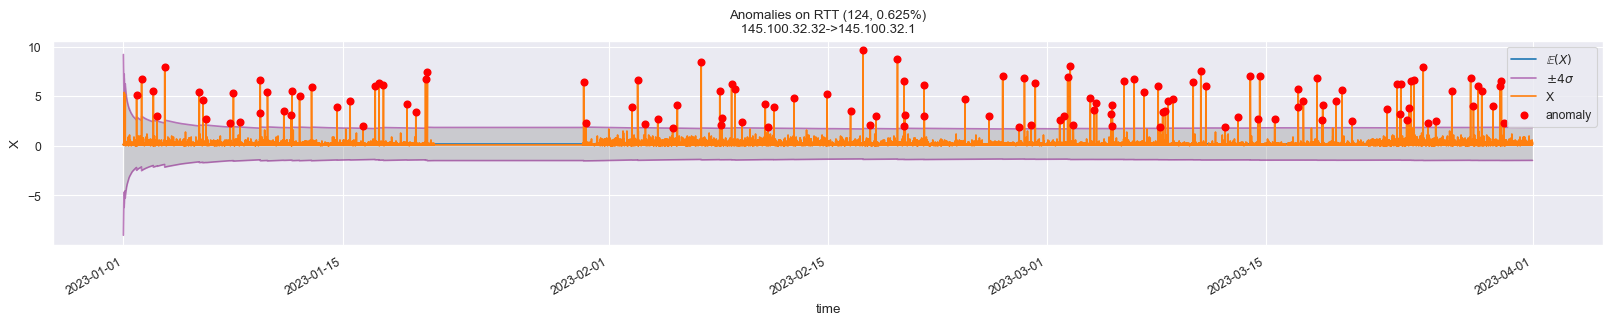

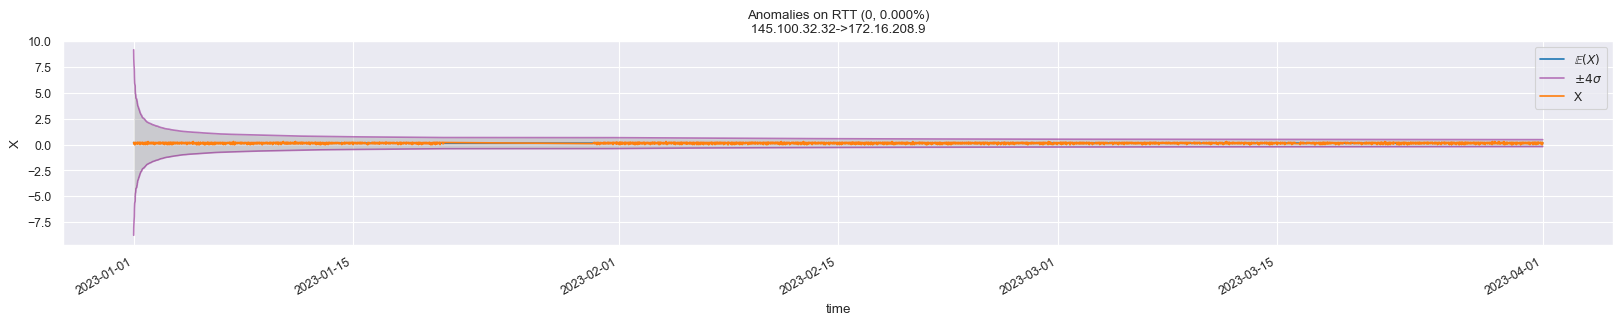

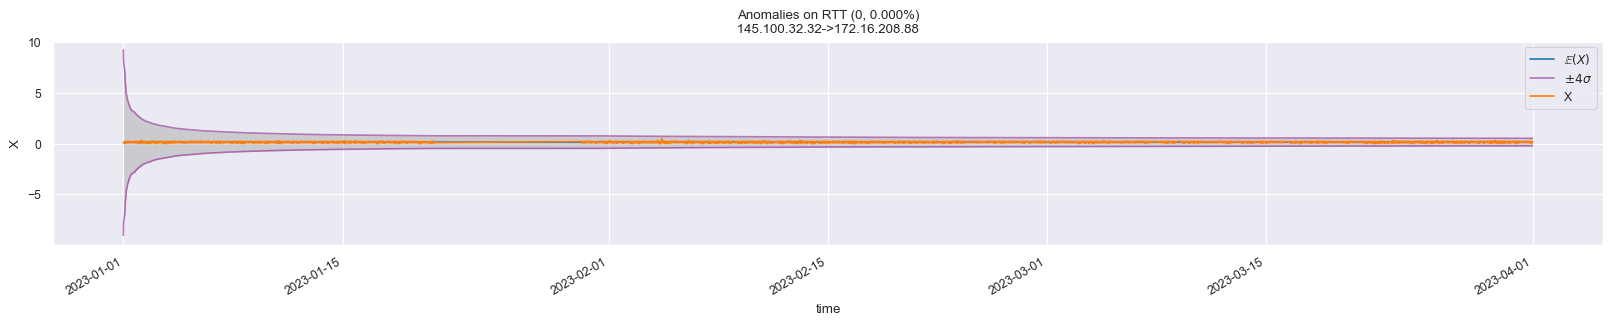

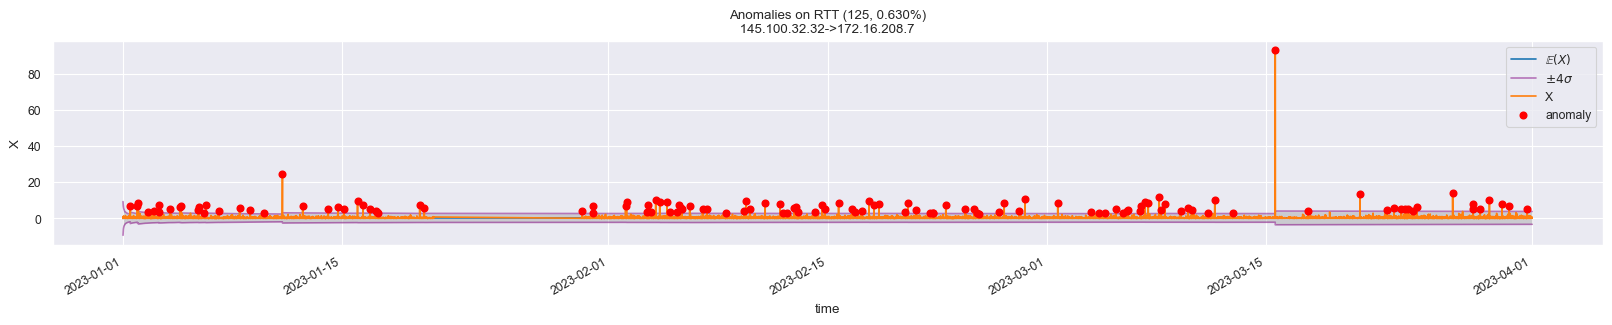

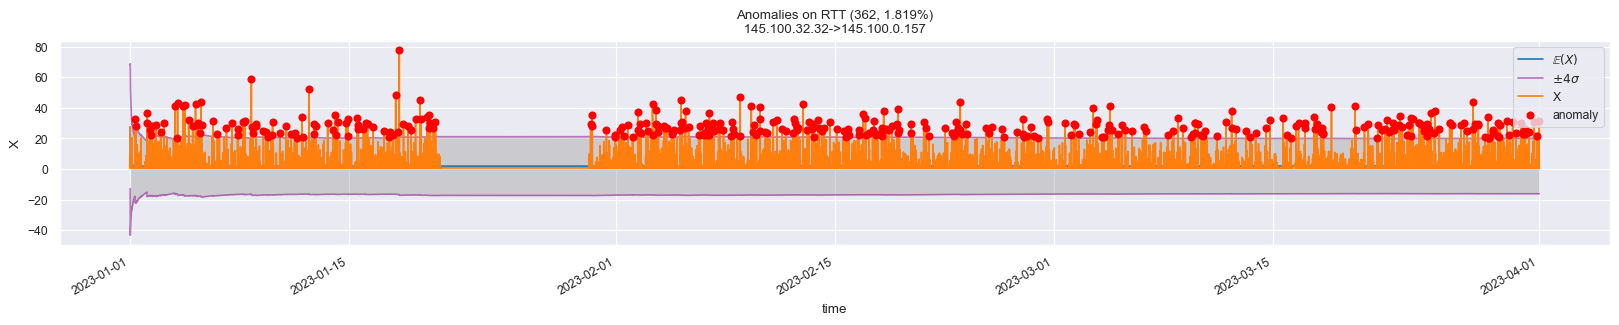

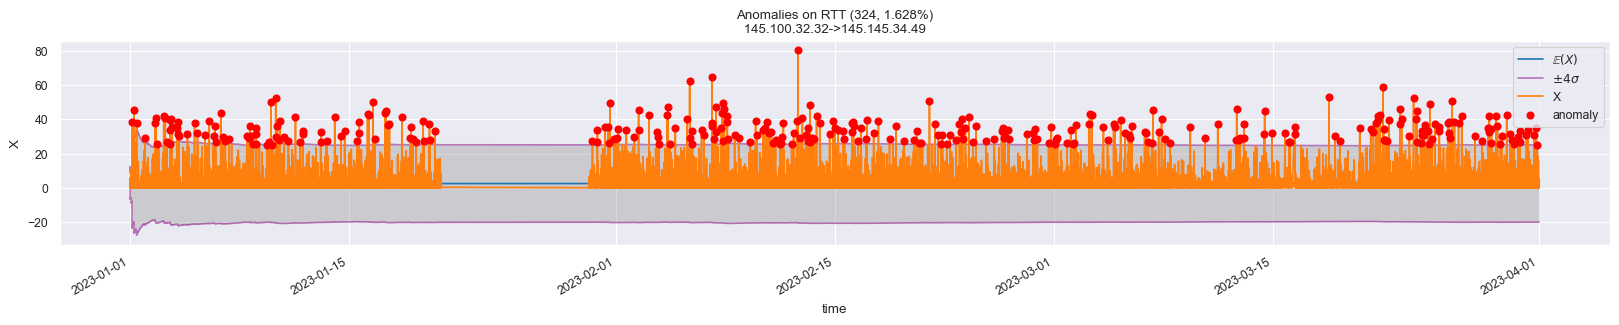

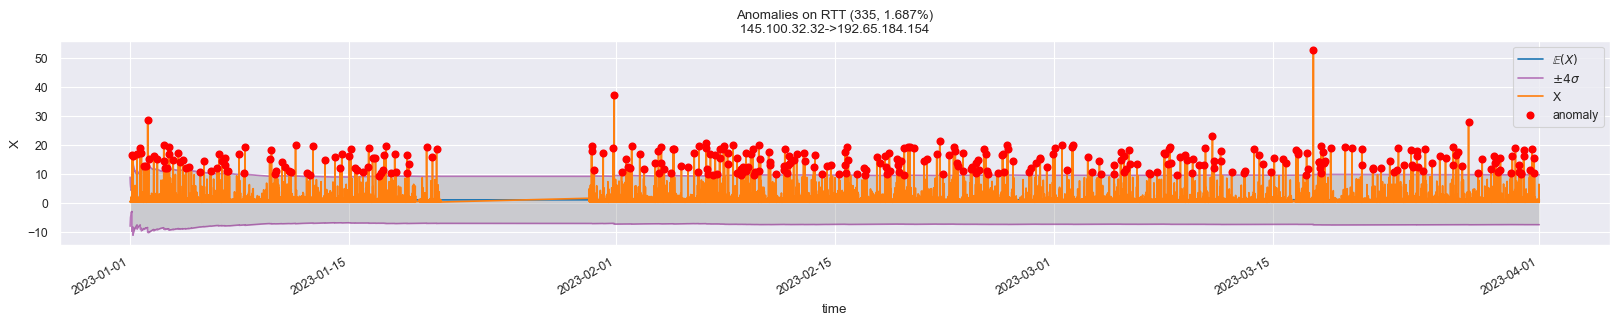

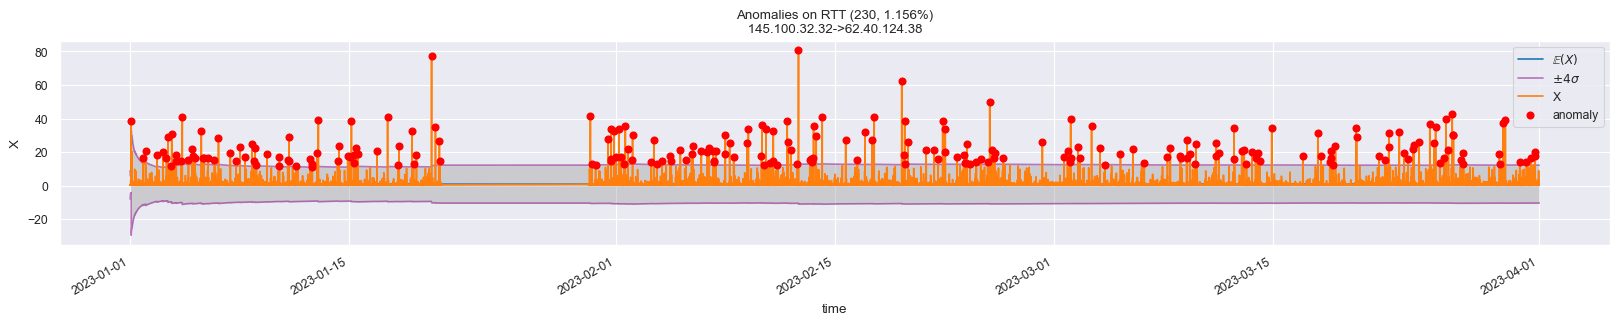

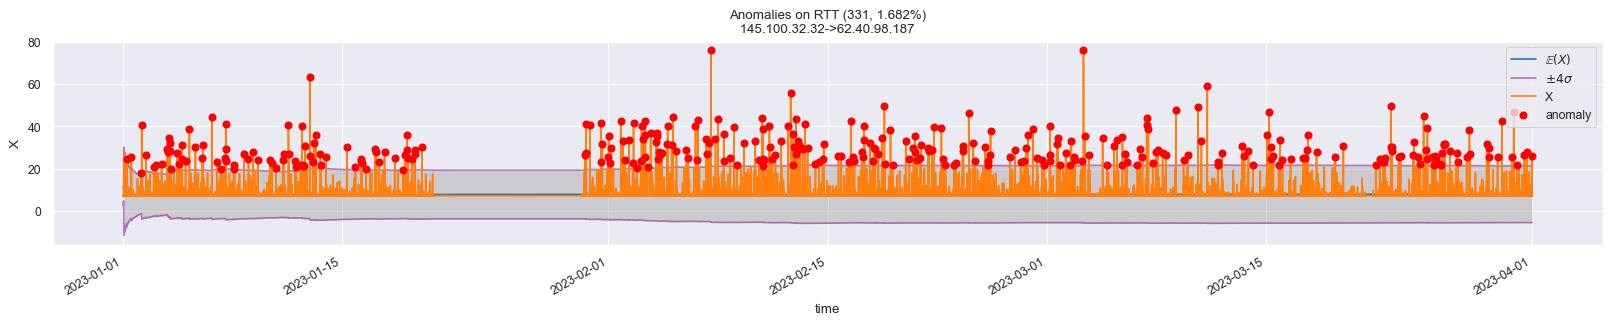

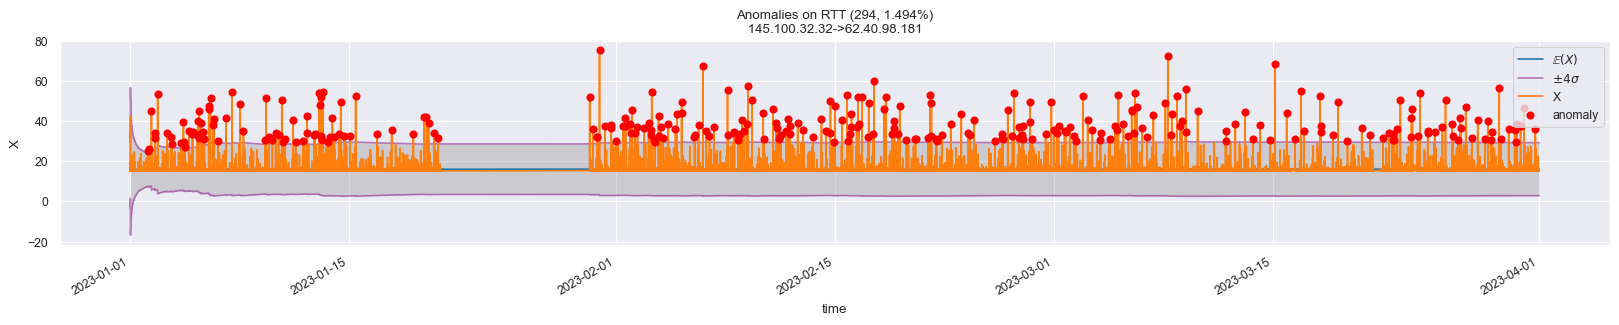

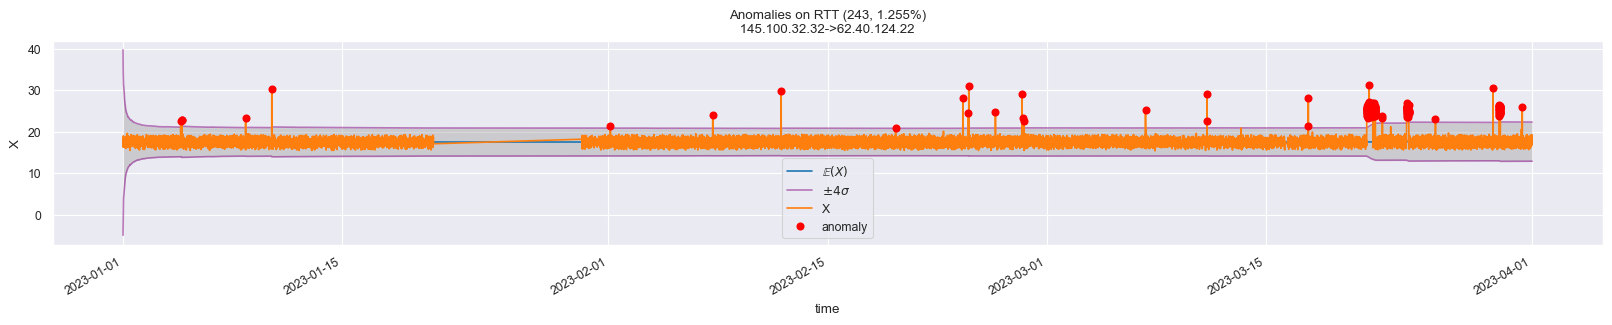

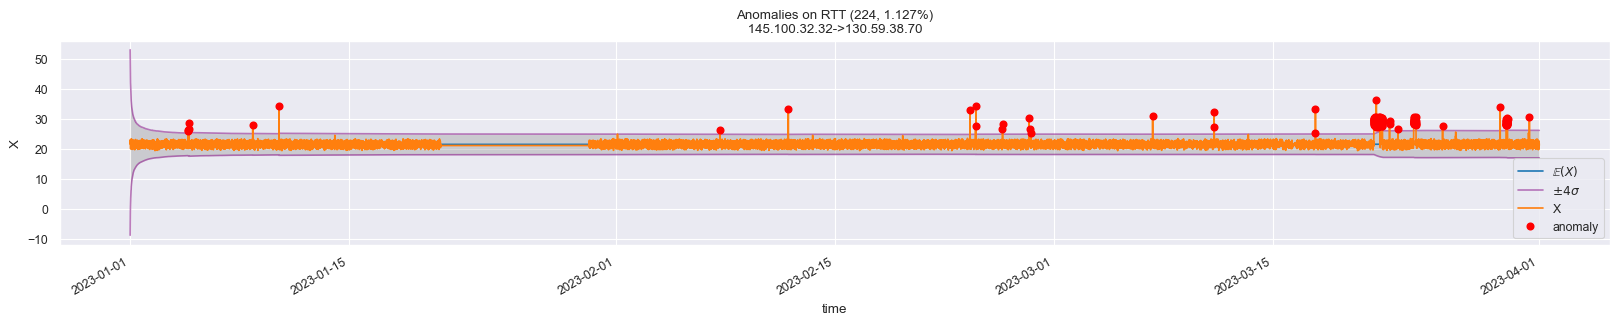

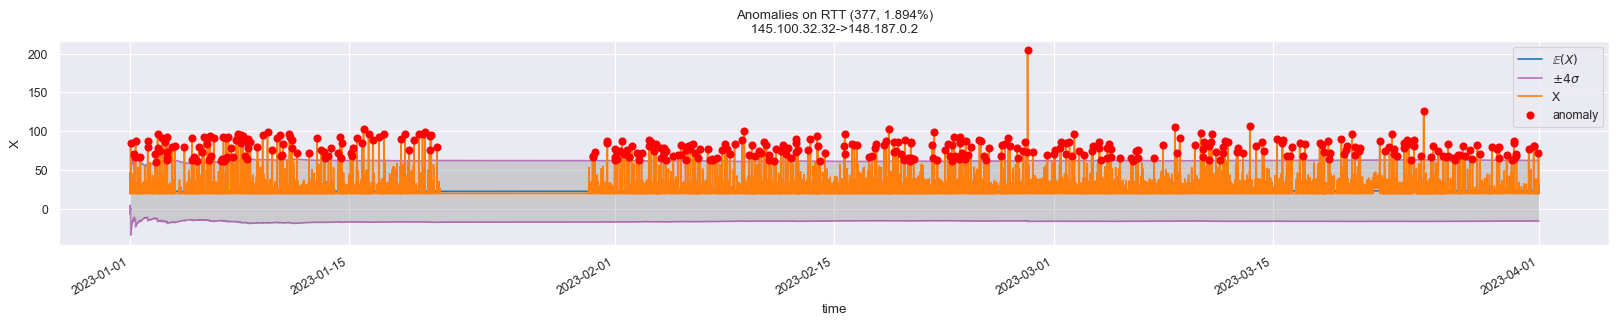

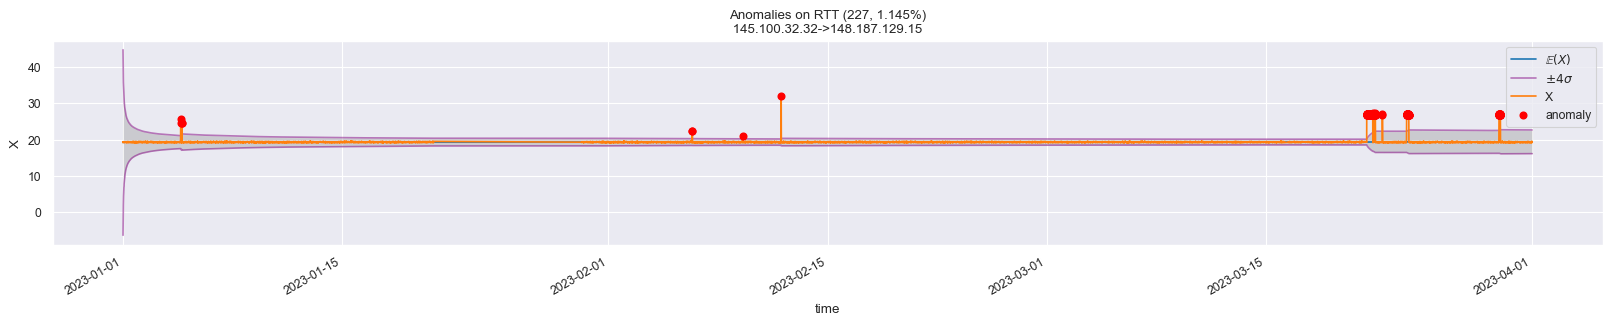

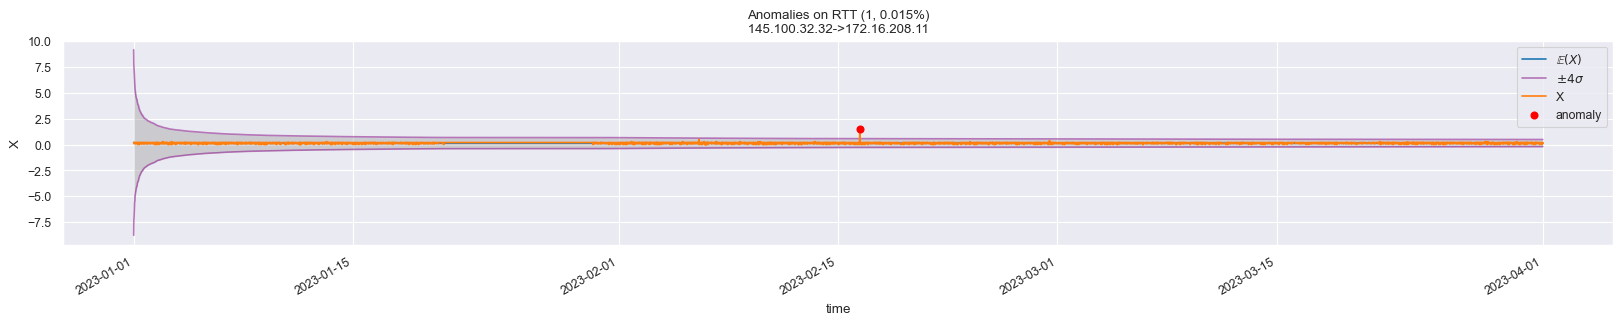

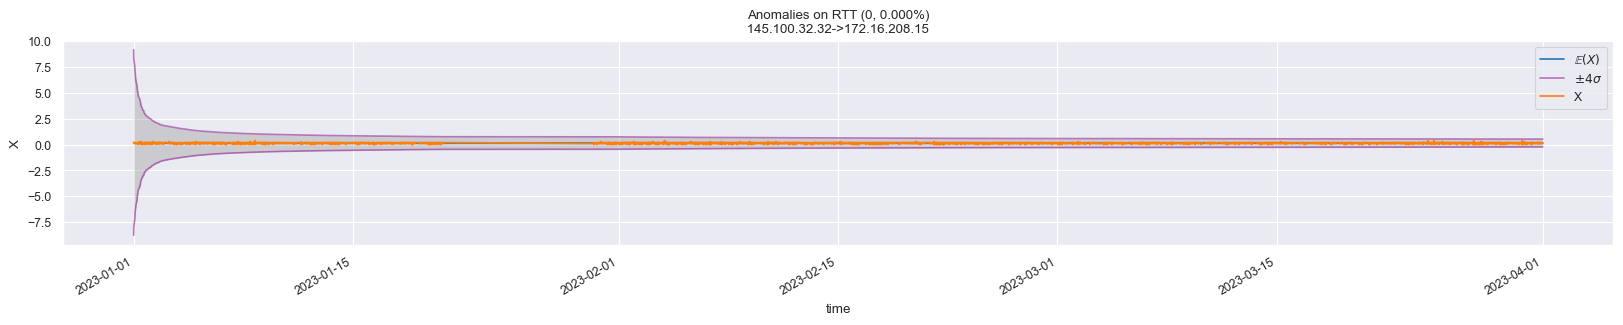

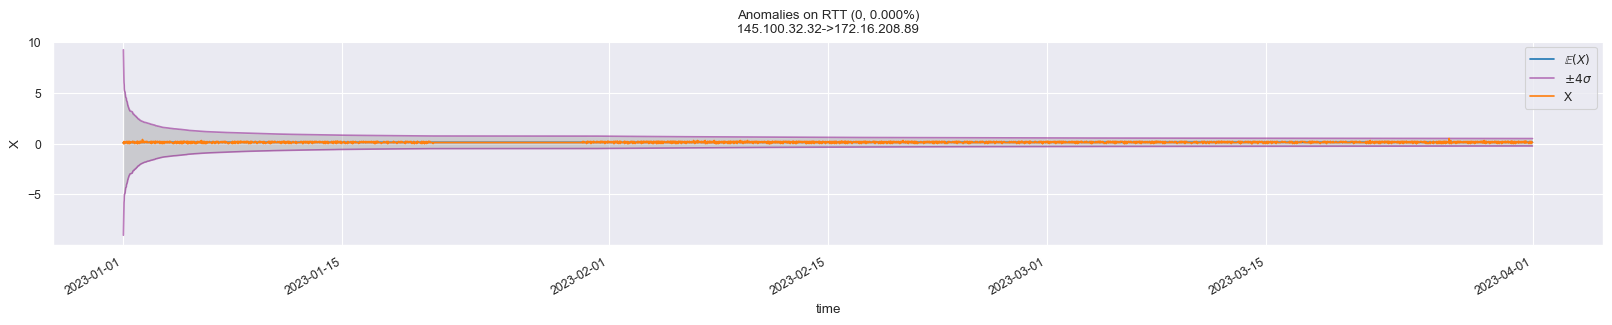

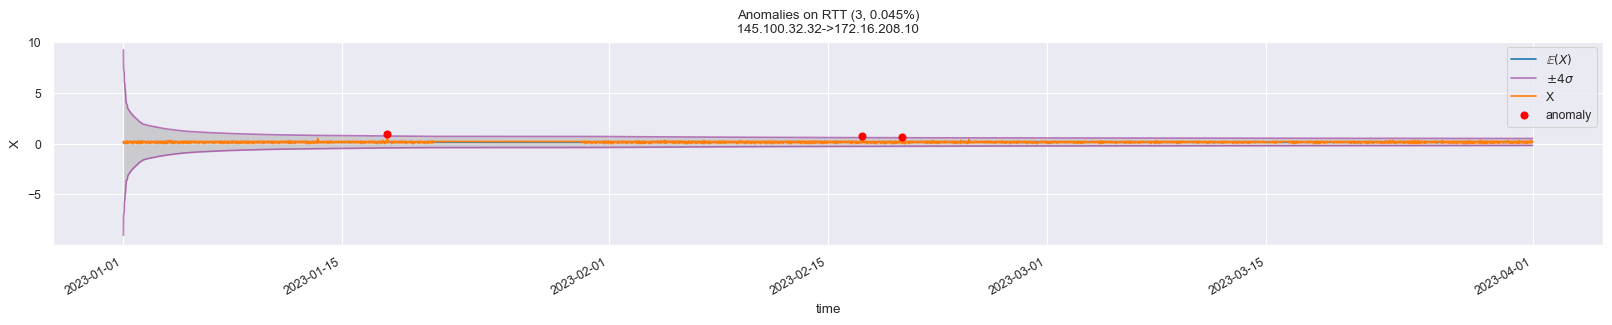

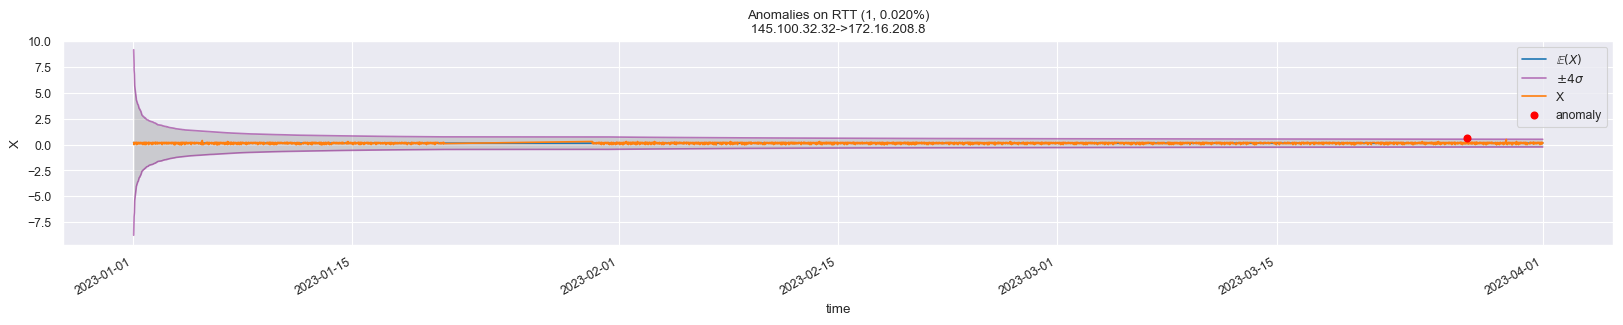

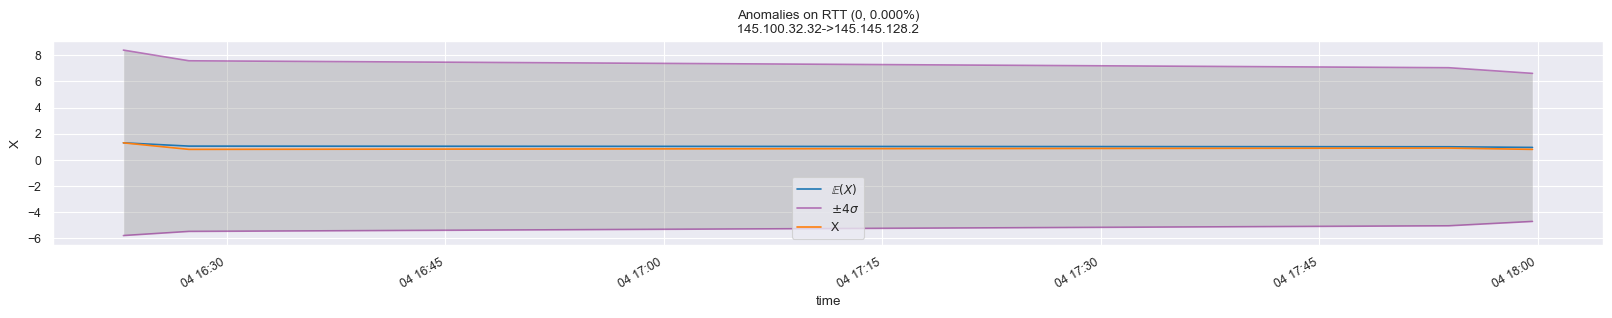

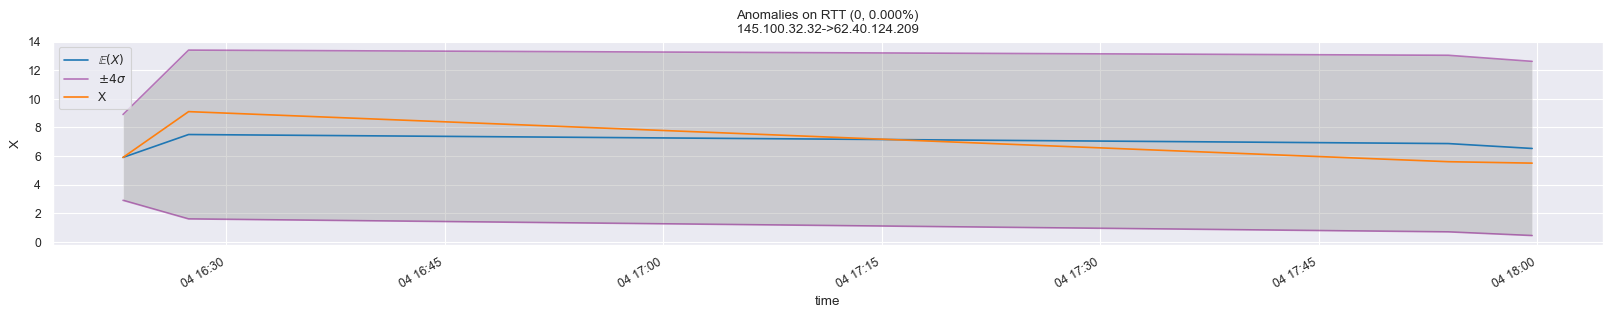

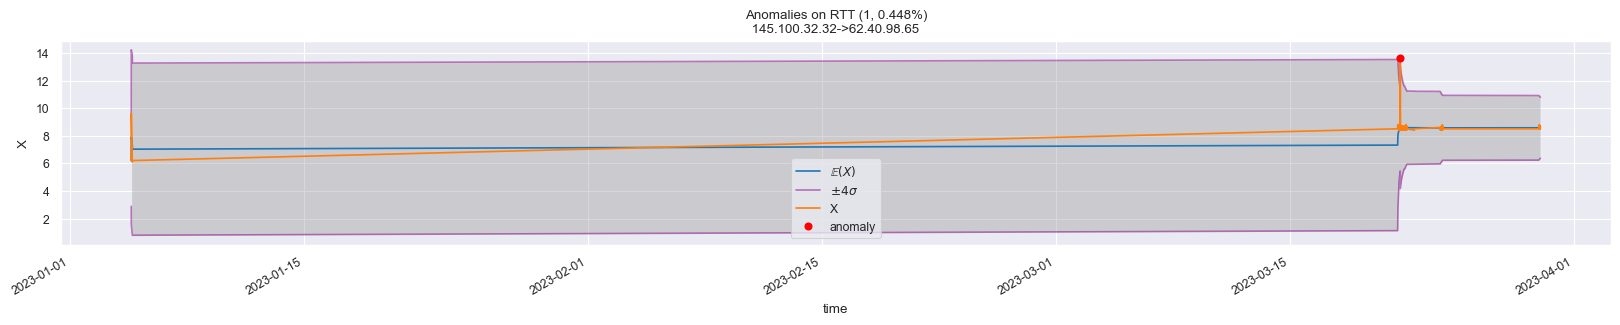

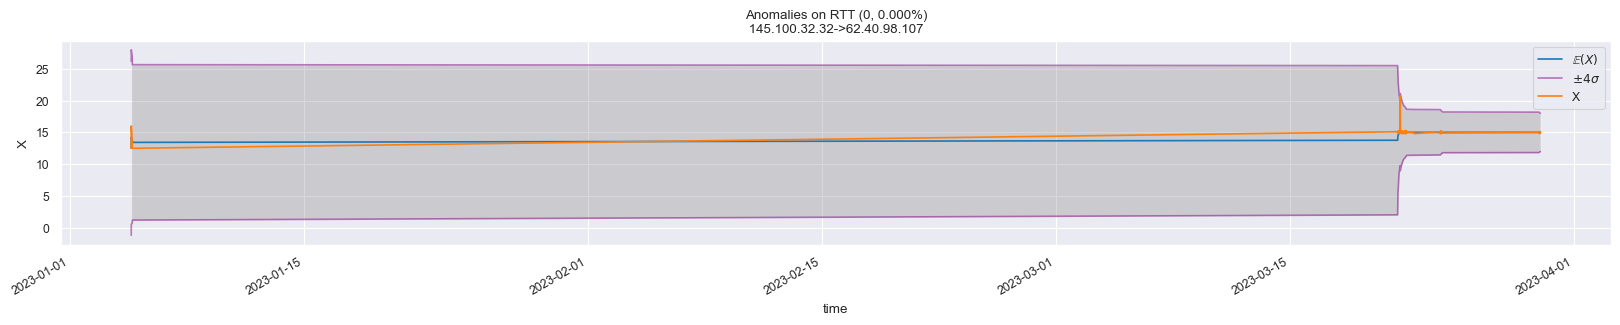

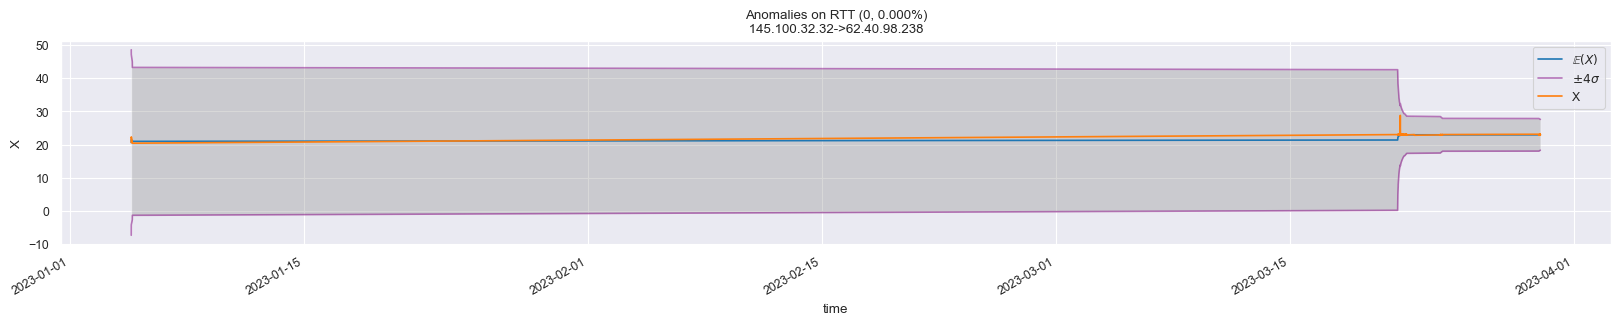

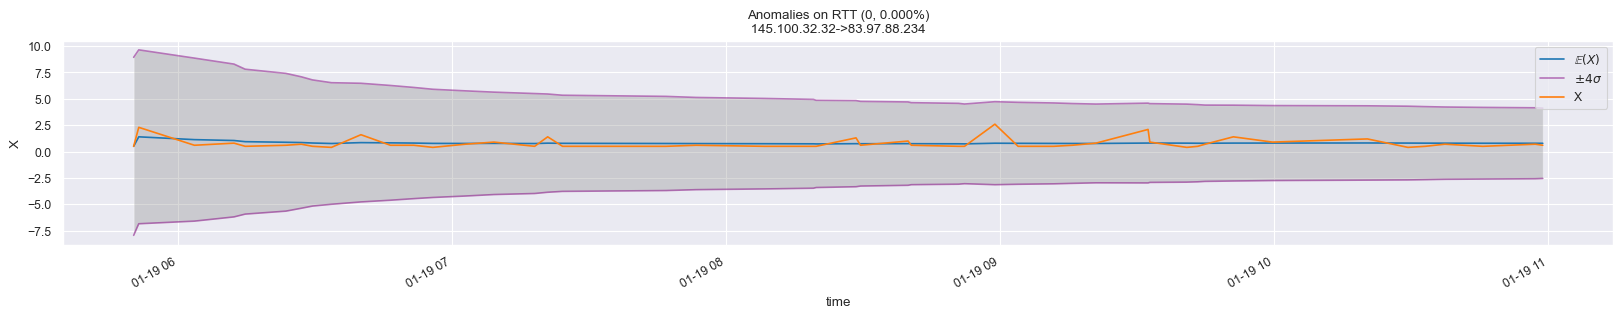

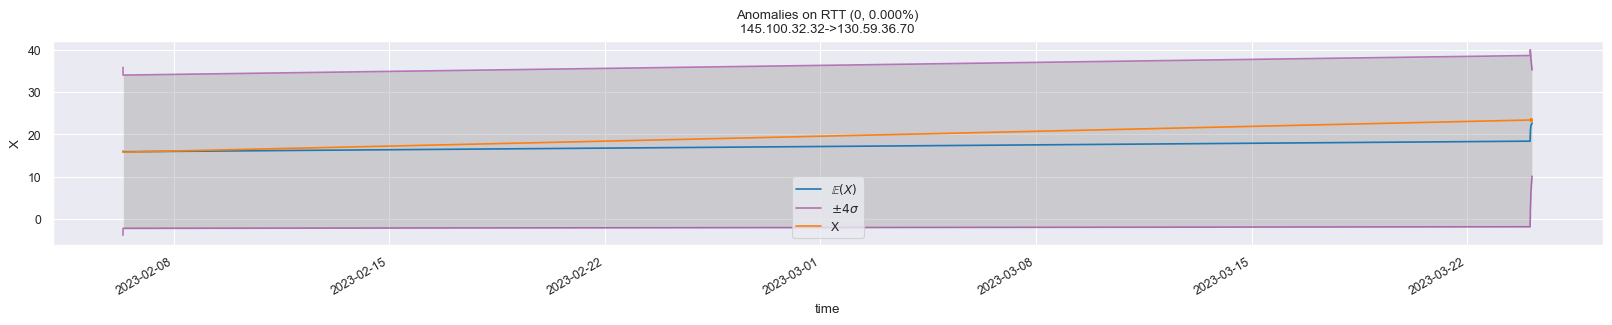

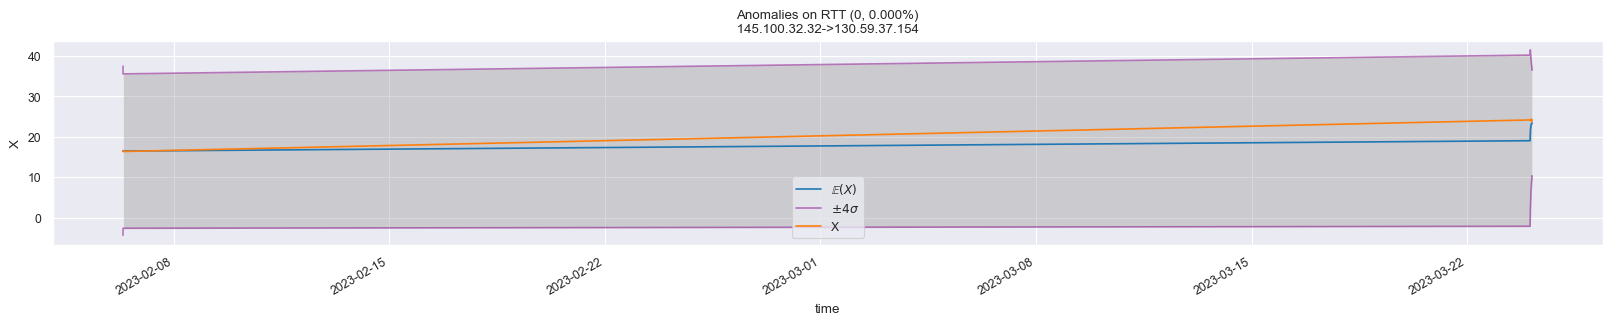

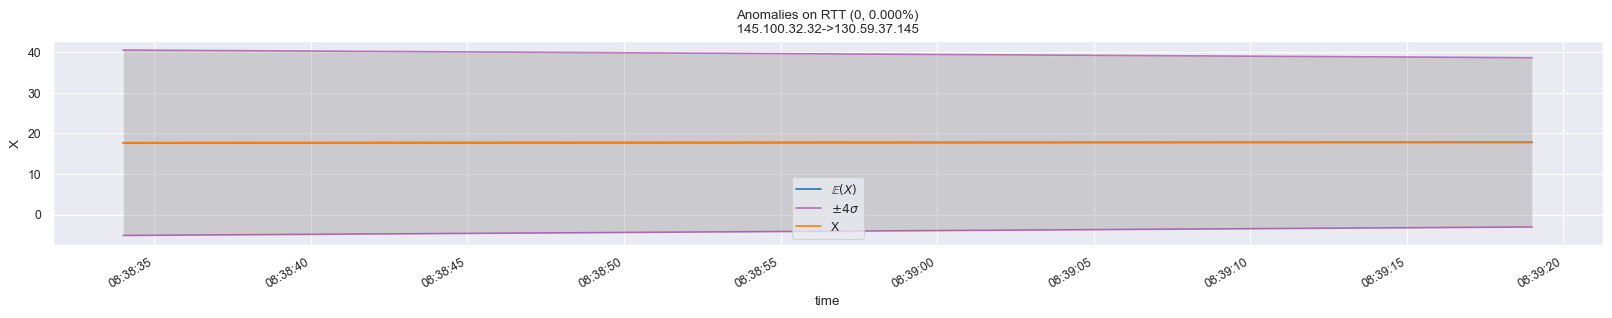

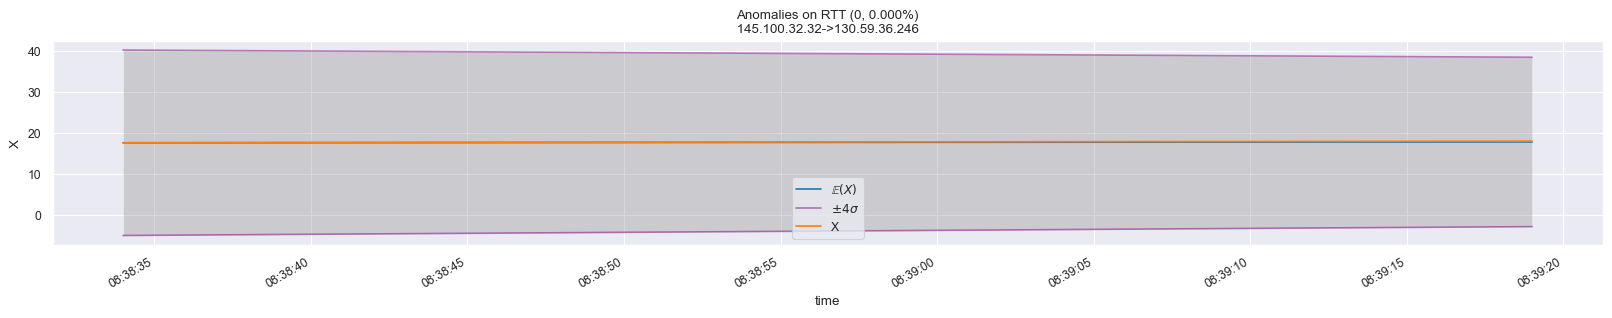

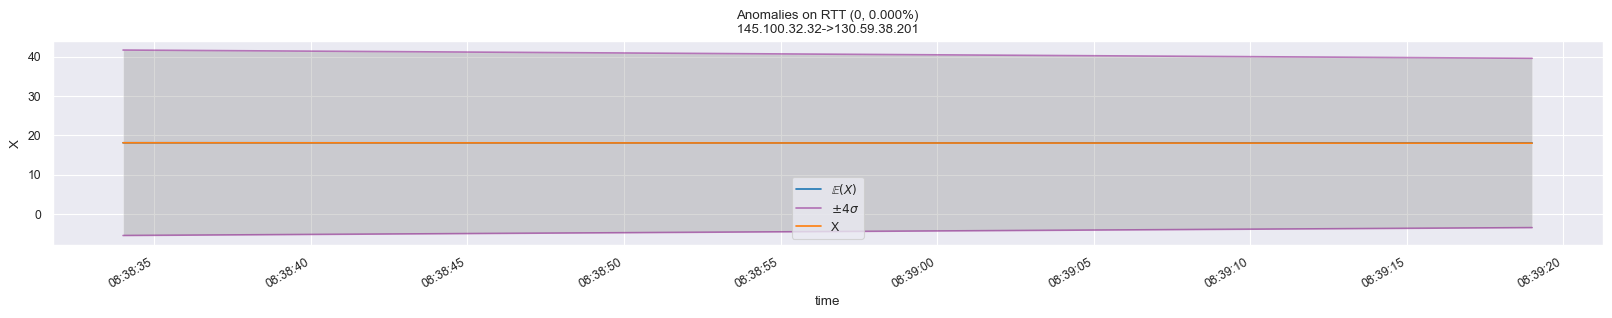

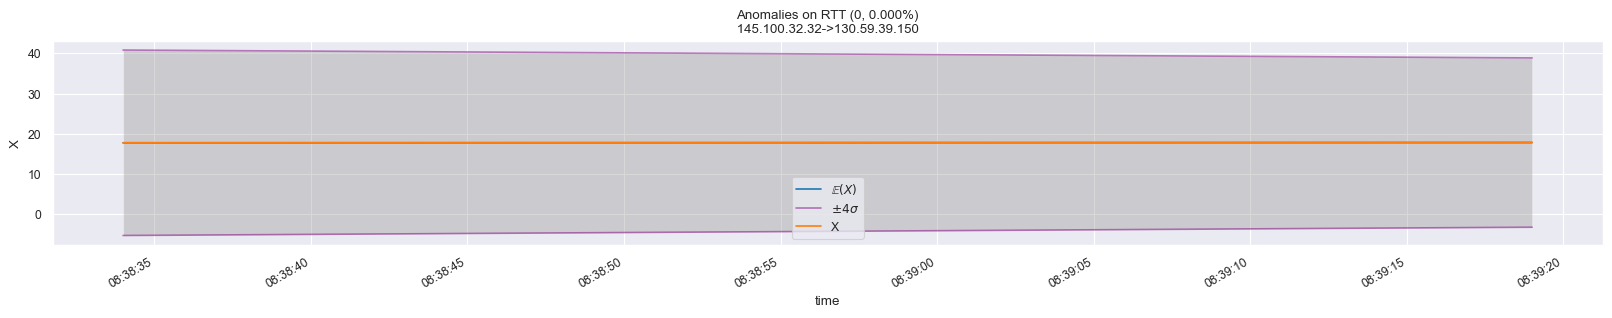

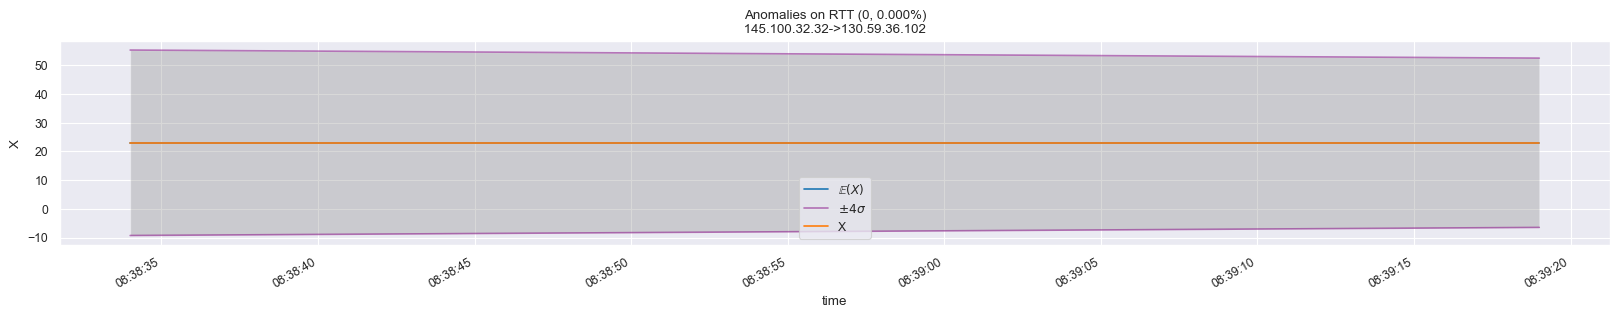

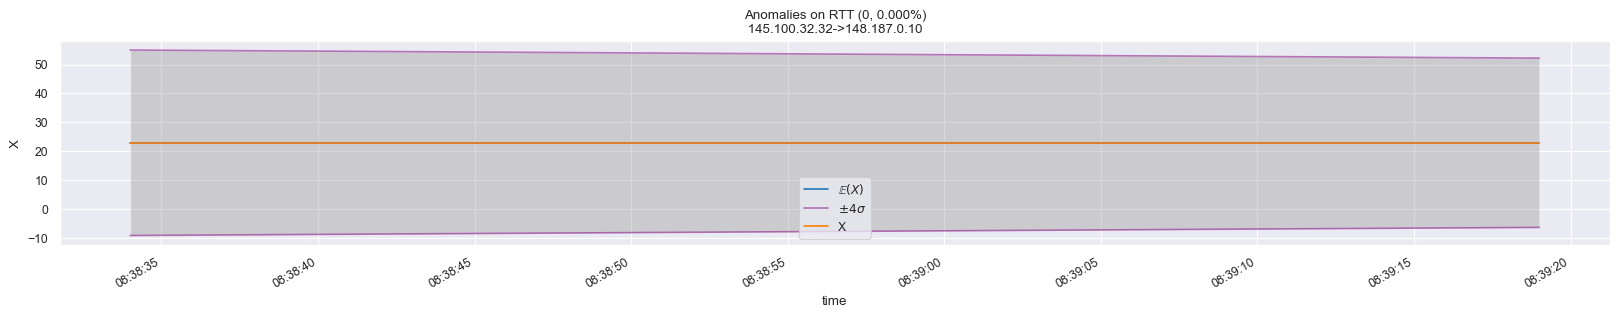

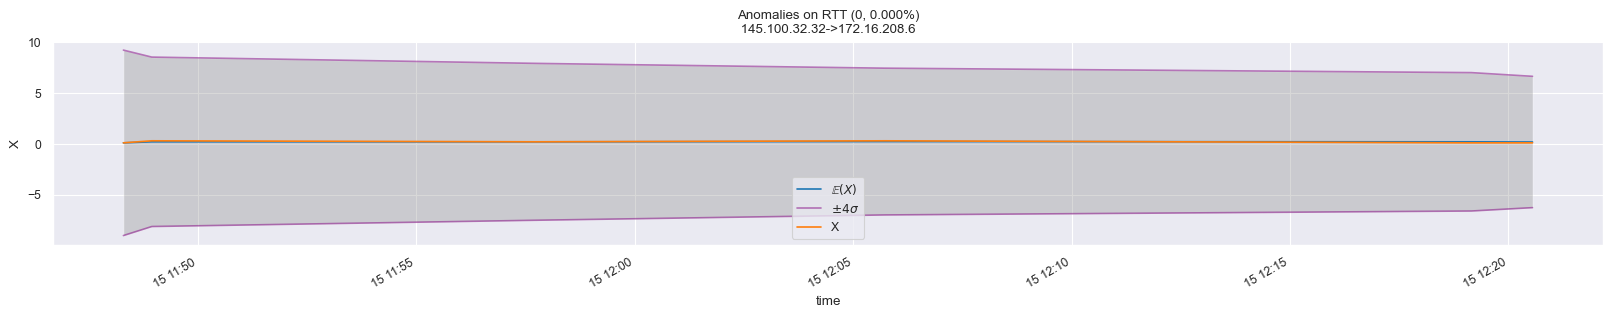

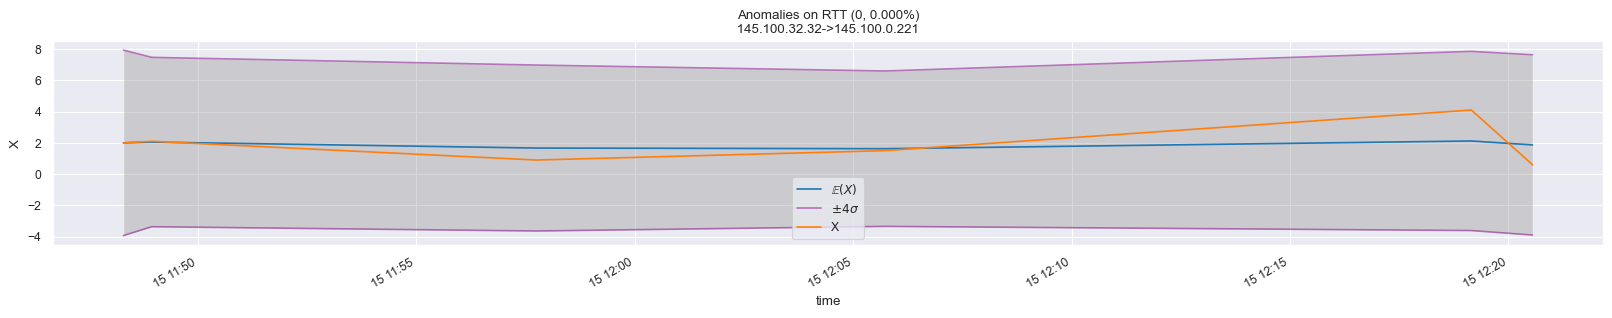

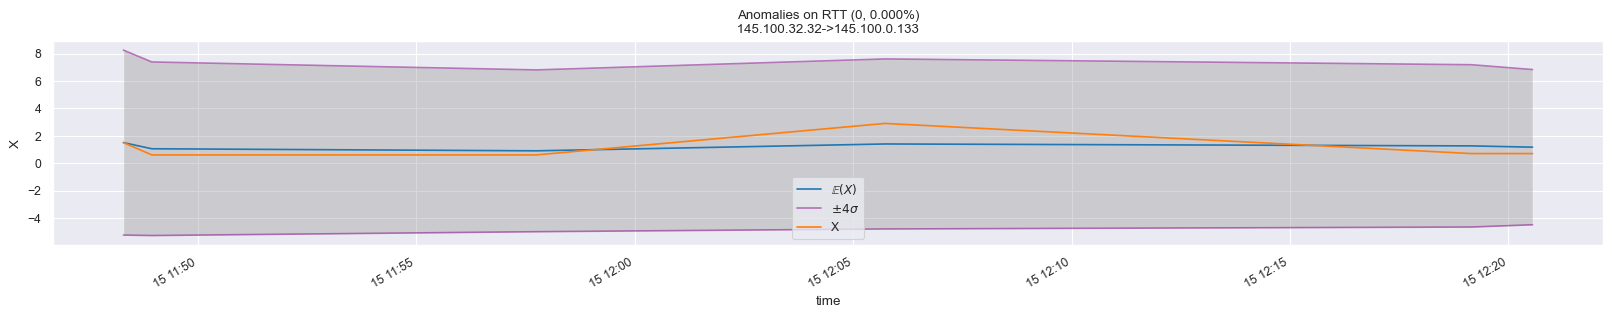

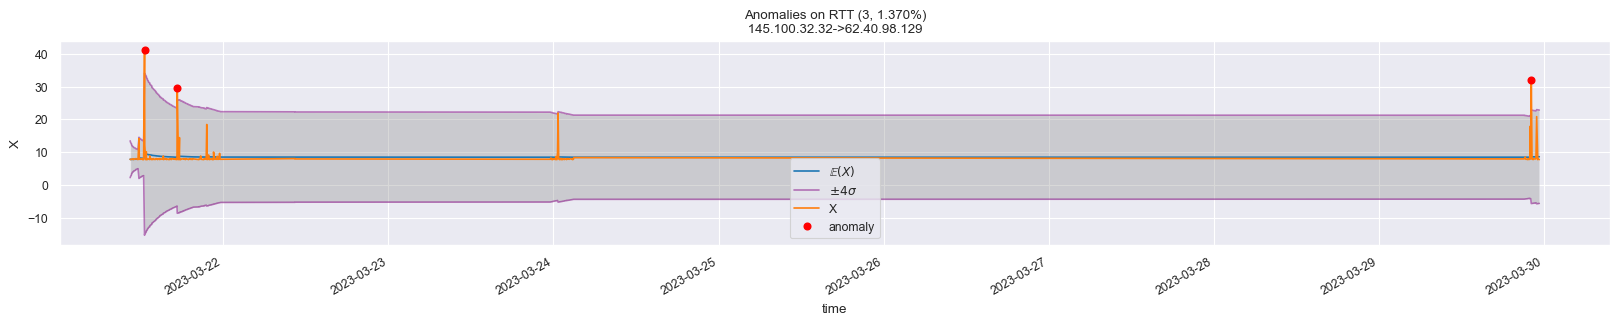

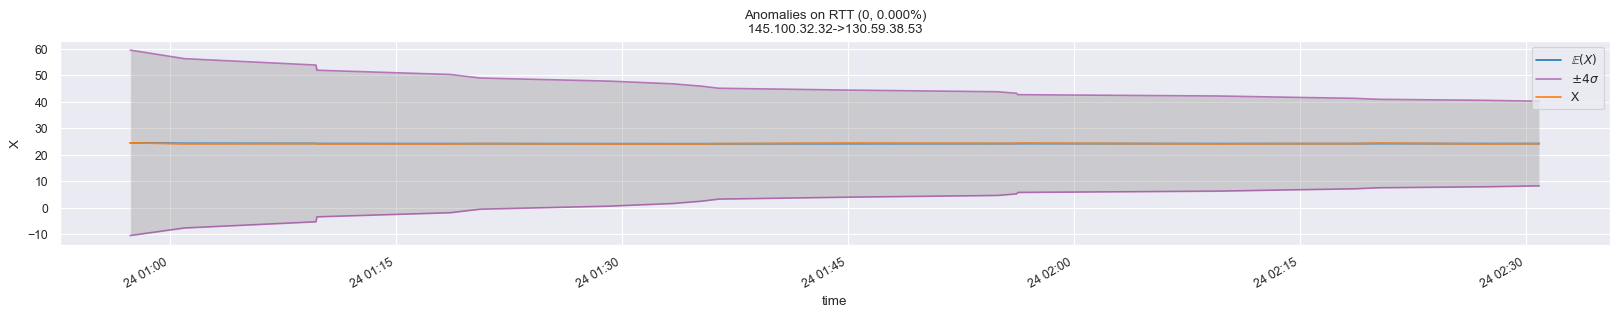

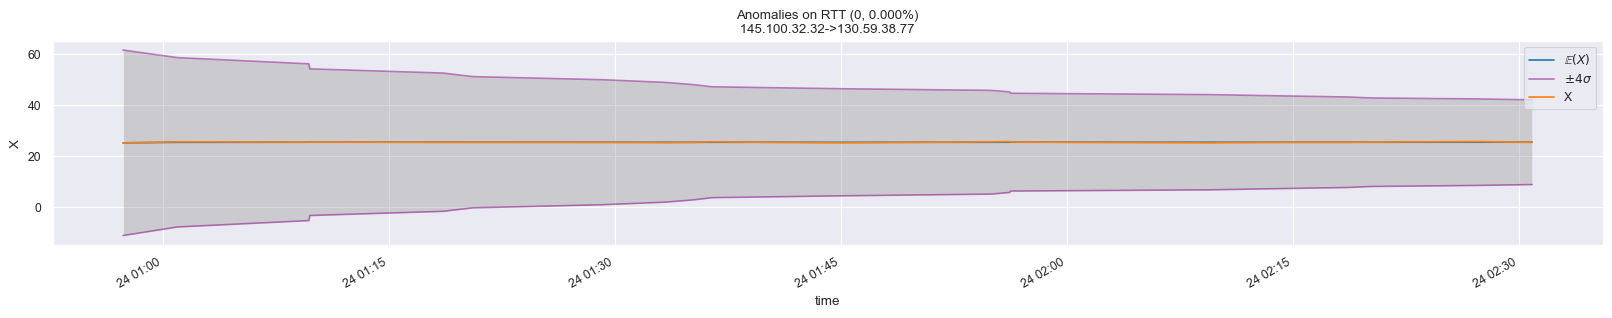

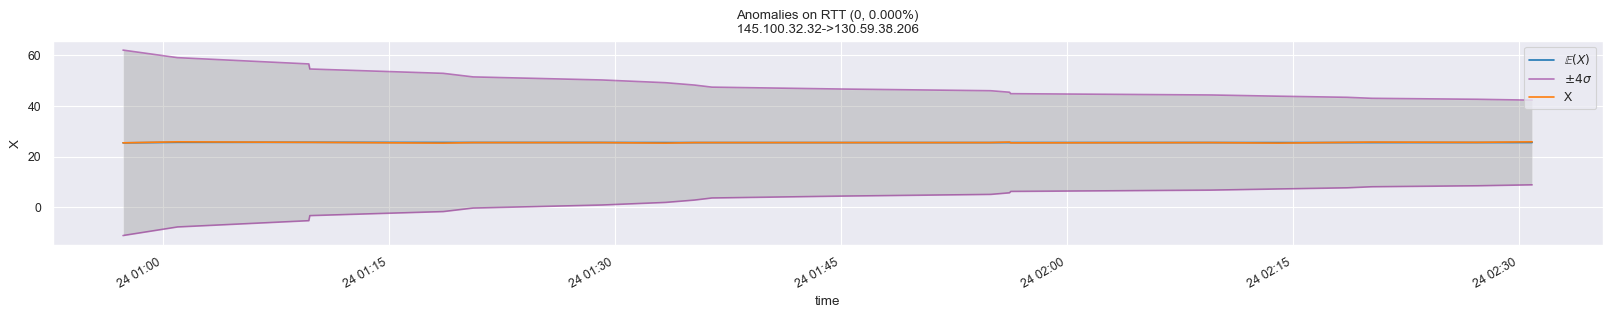

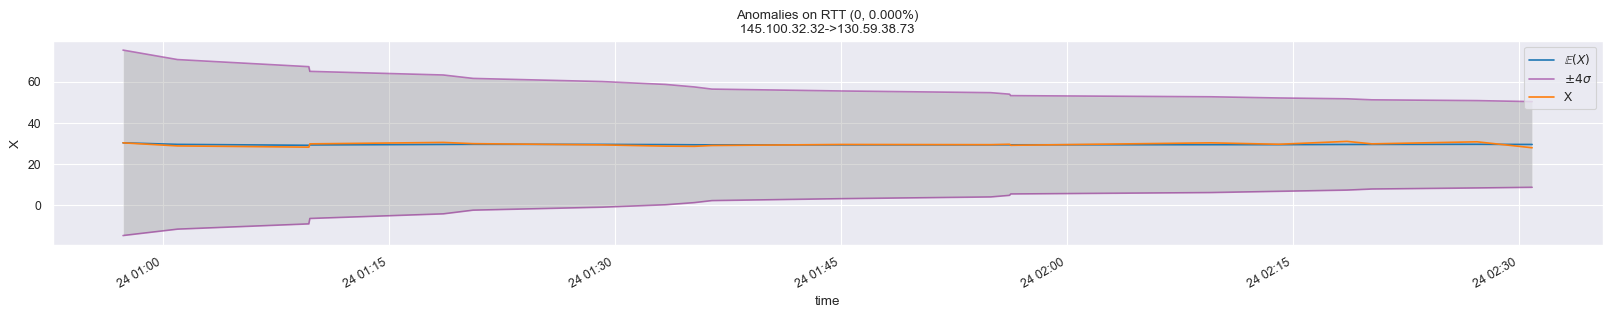

('2001:610:108:203a::31', '2001:620:808:4129::15')


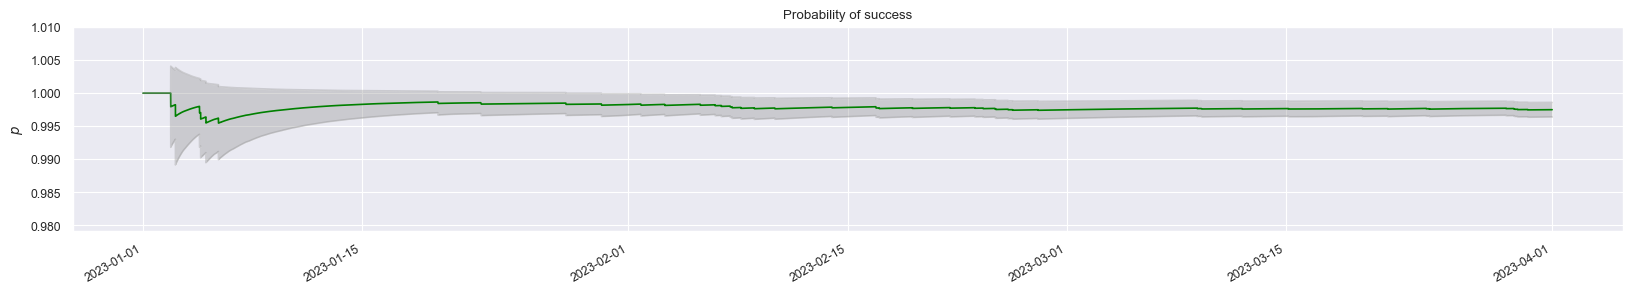

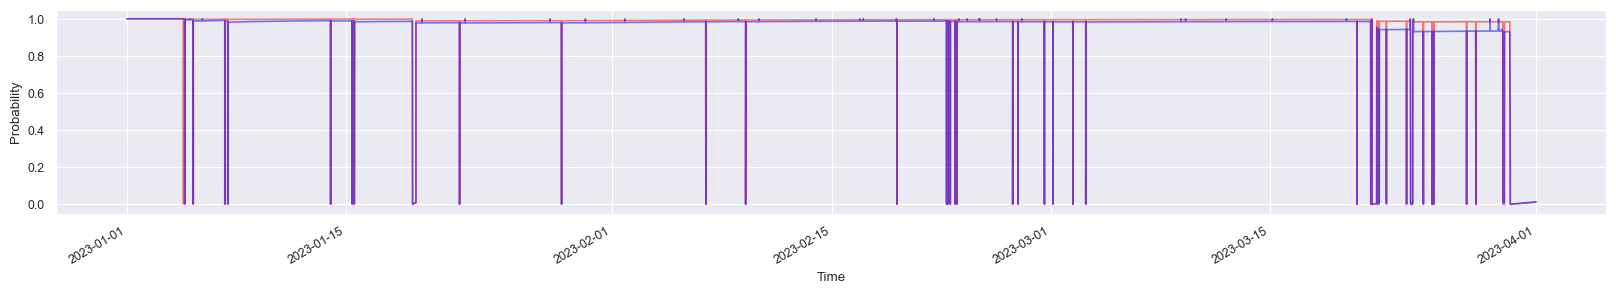

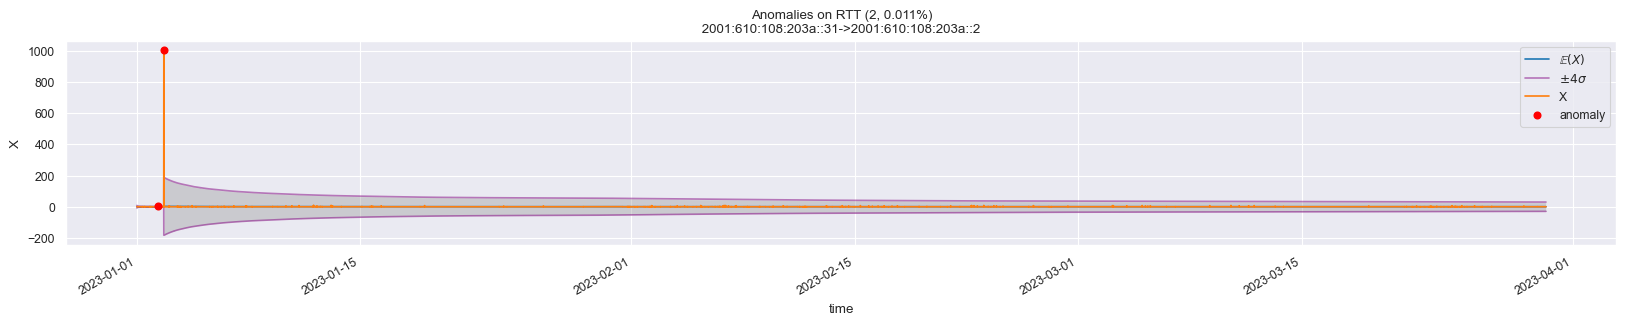

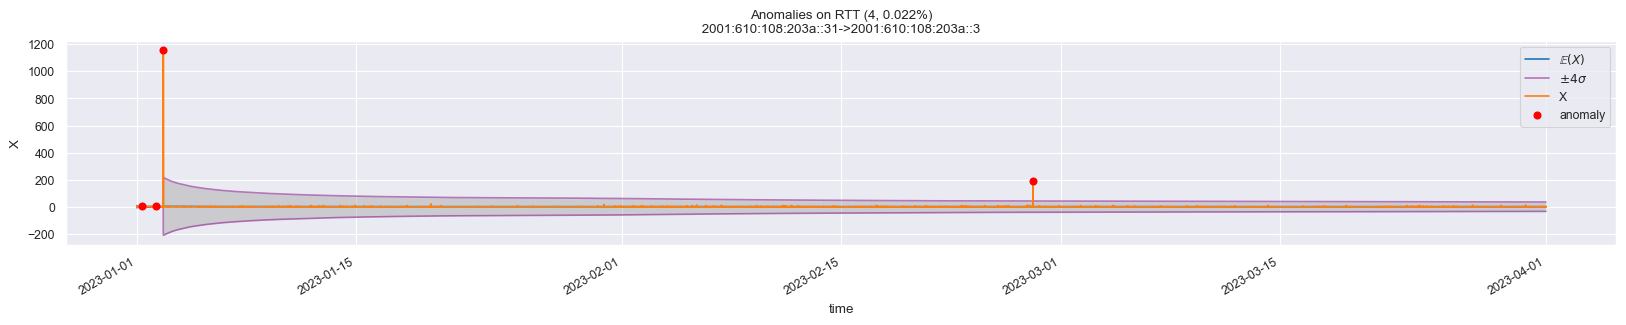

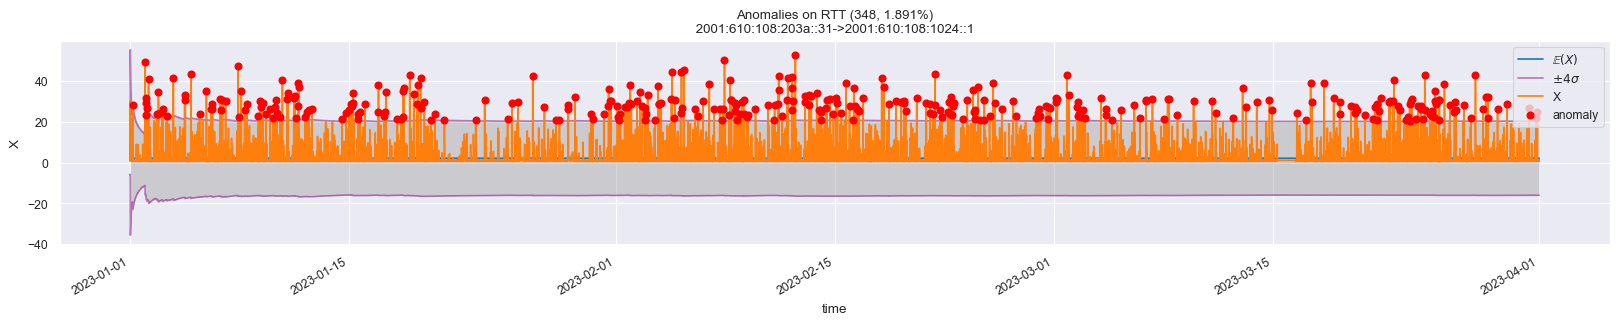

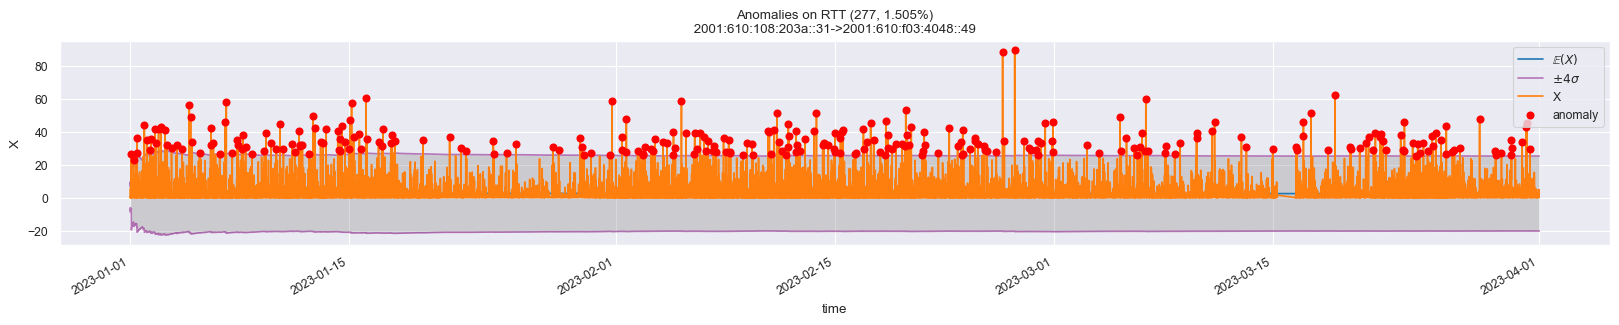

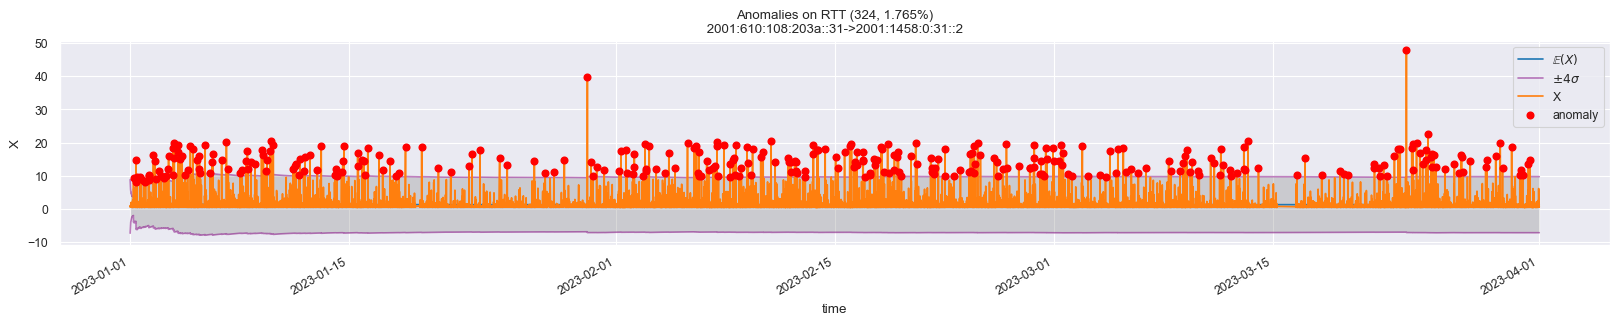

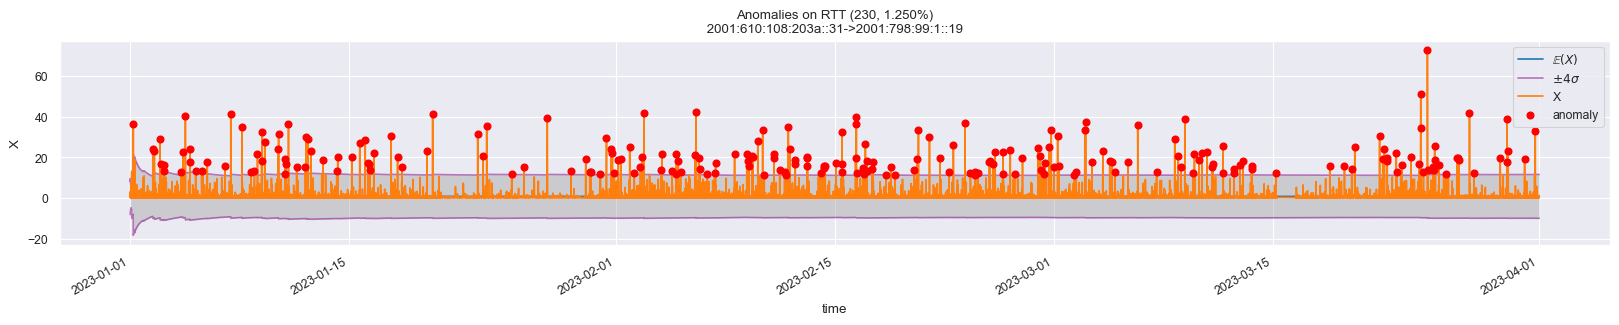

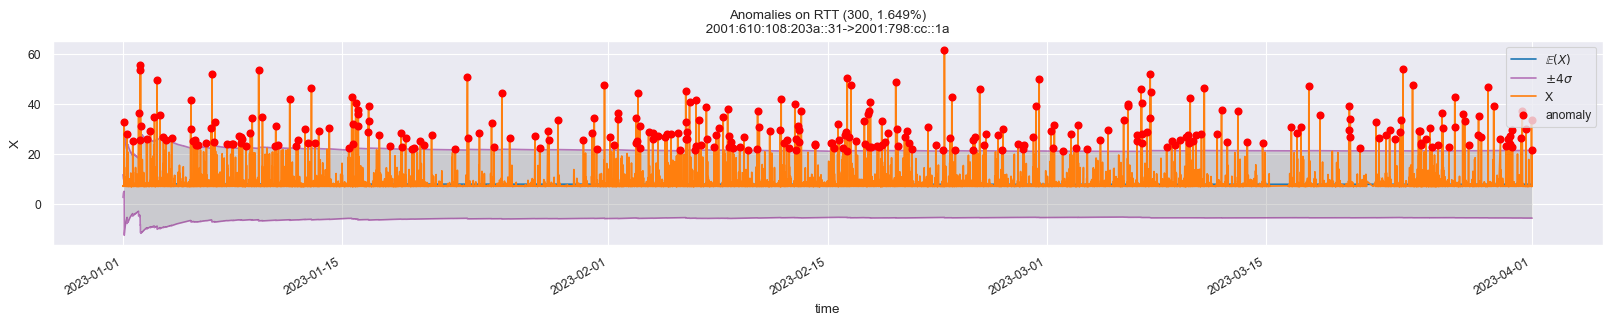

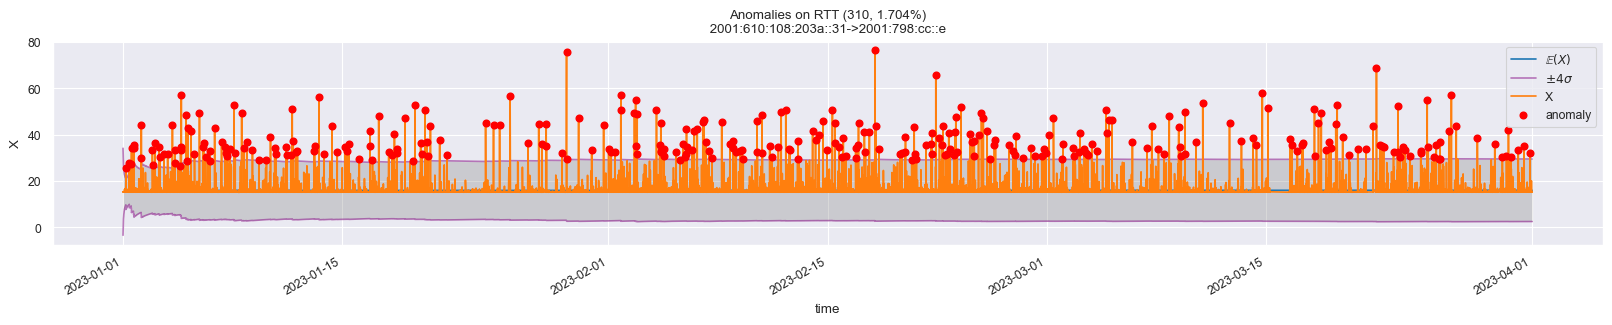

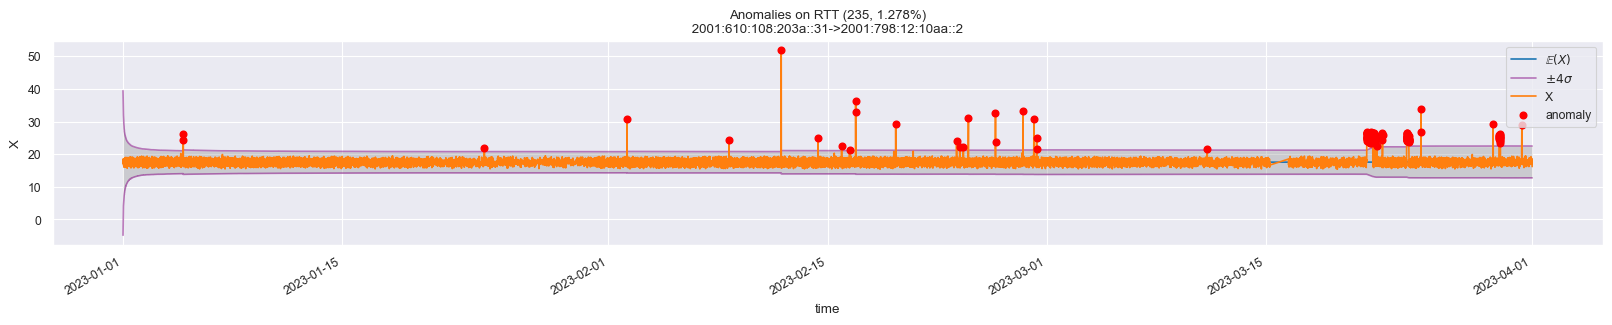

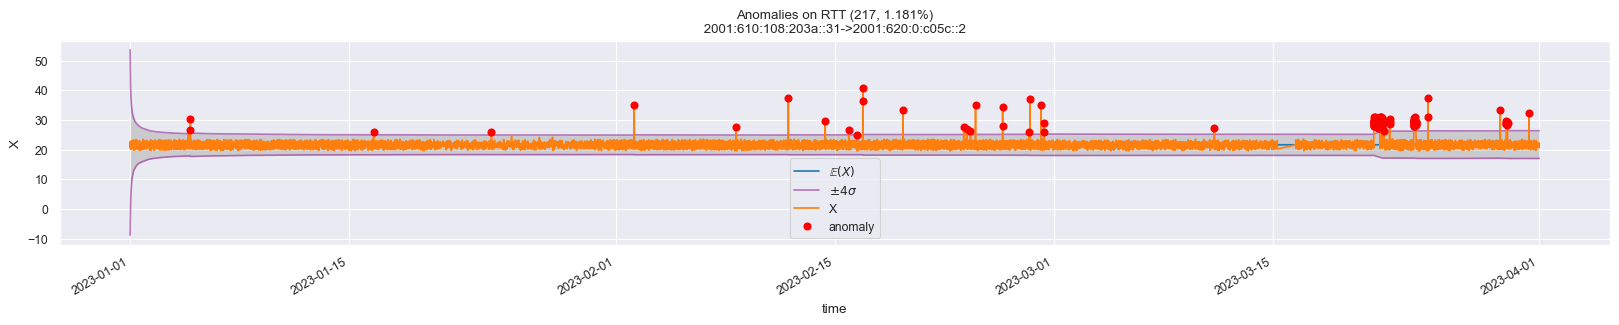

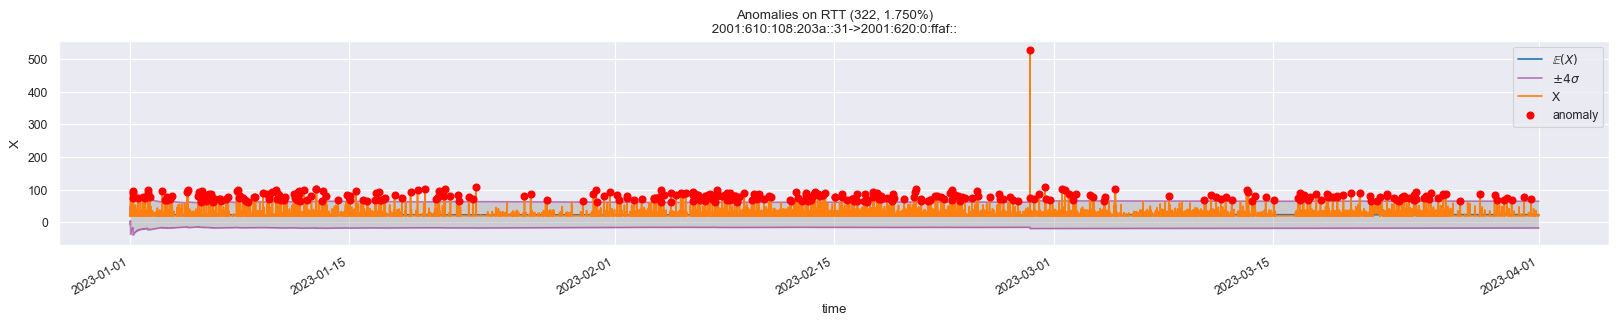

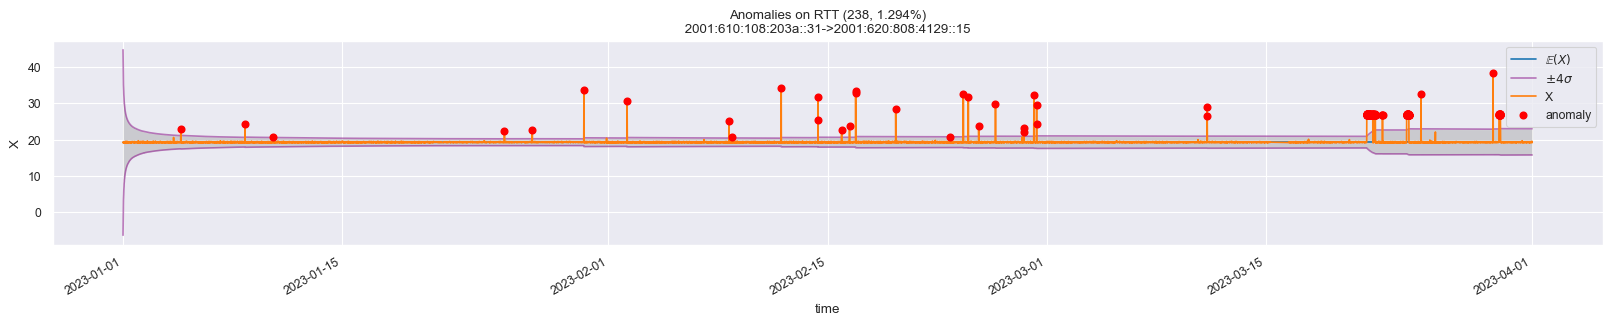

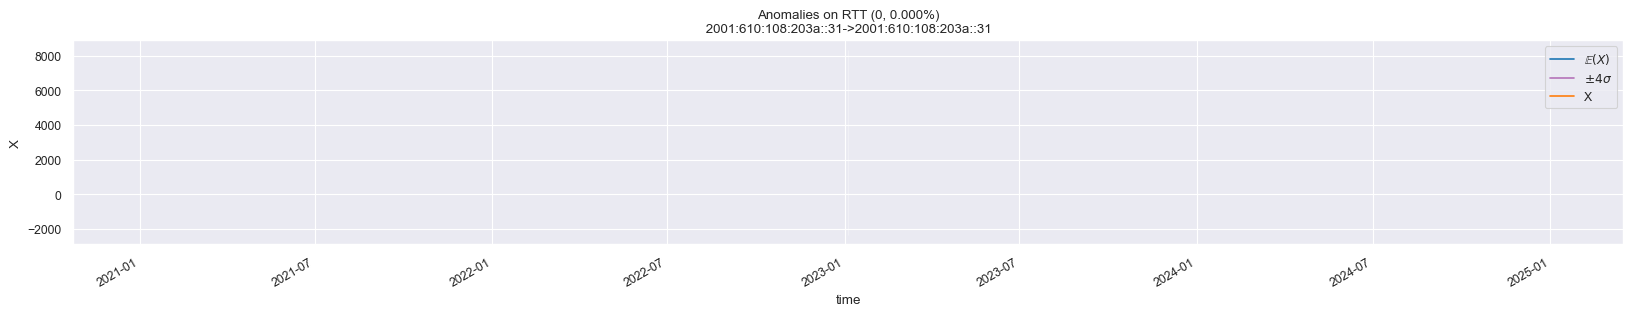

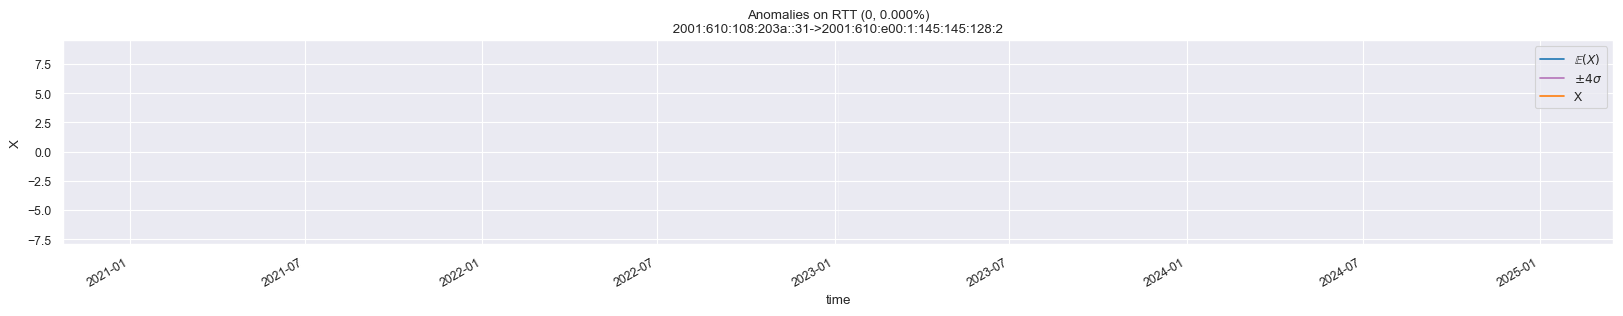

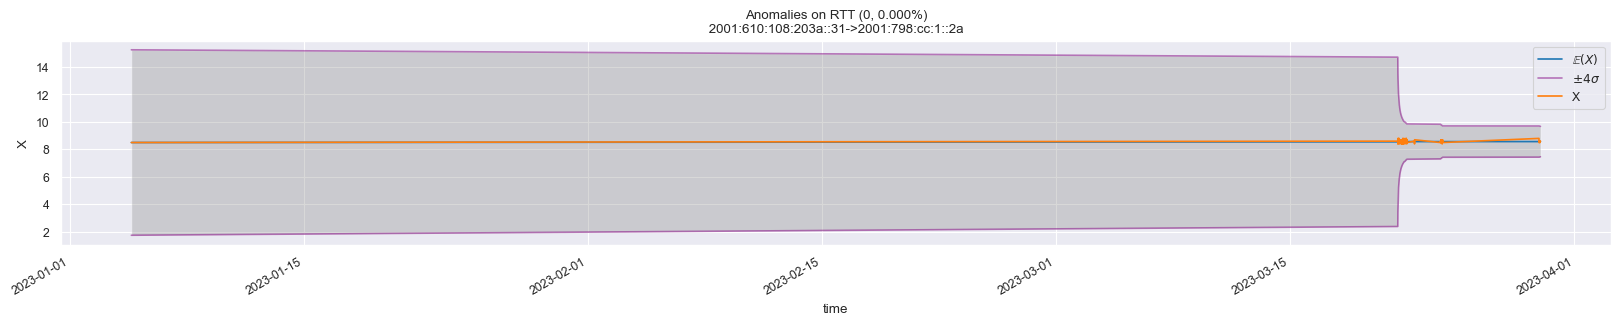

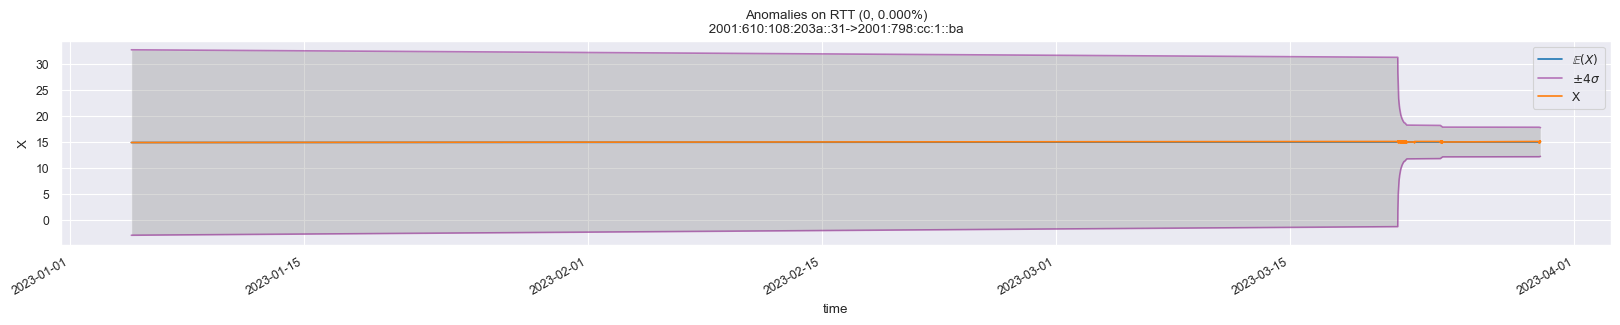

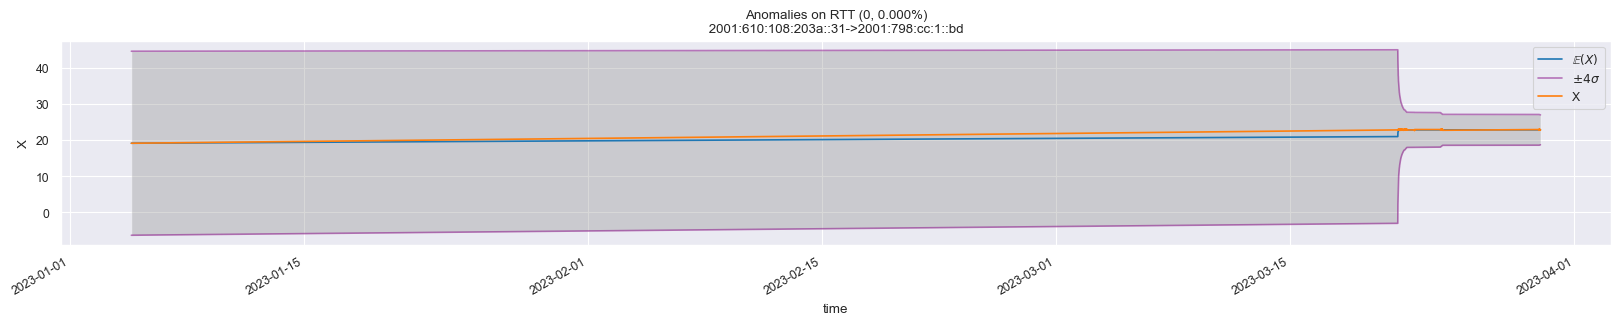

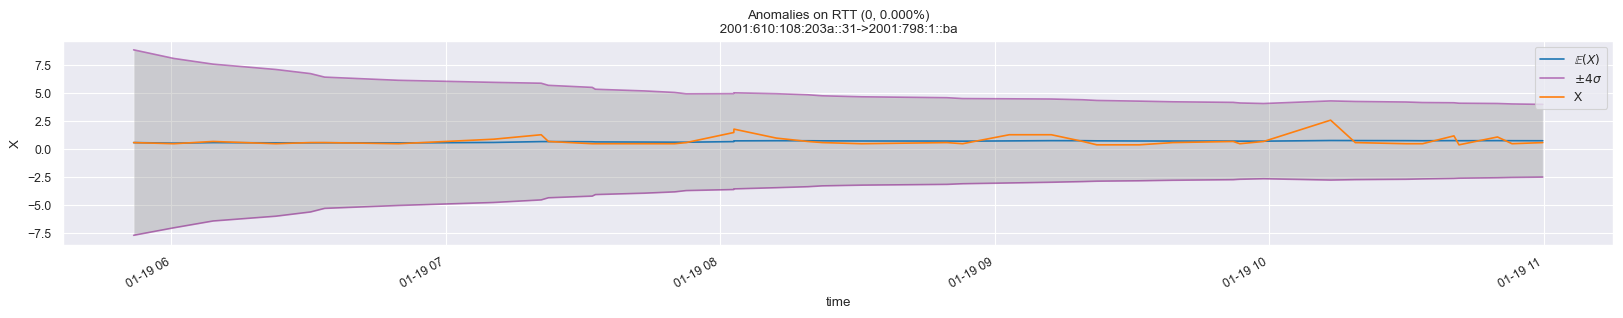

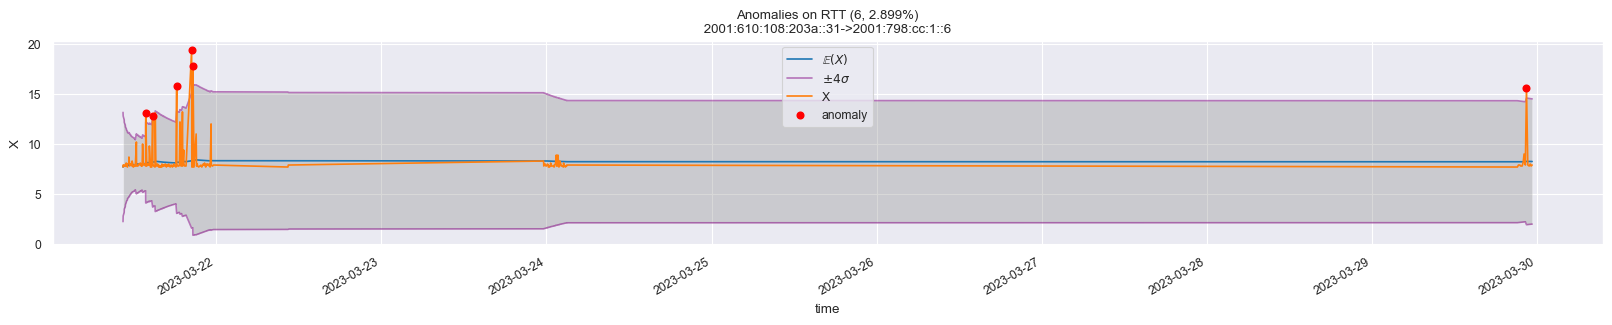

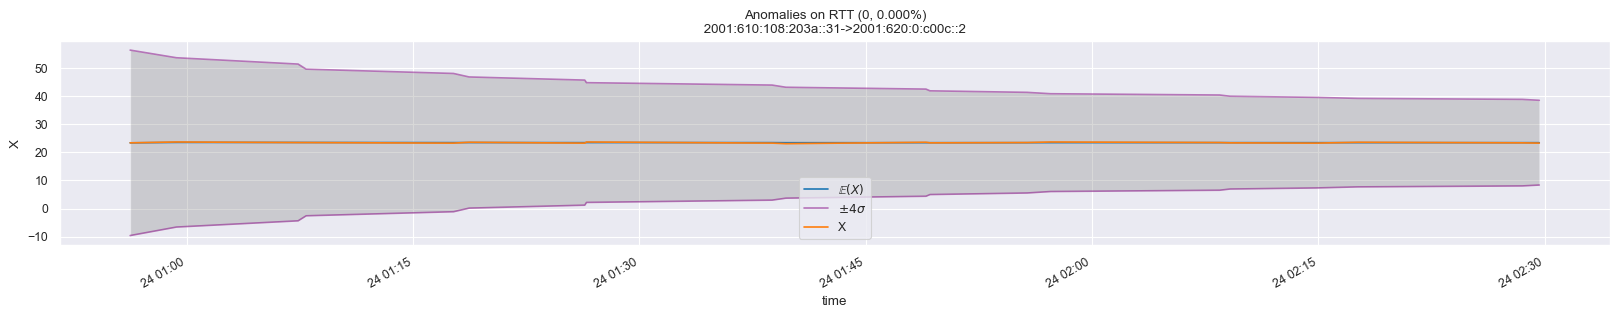

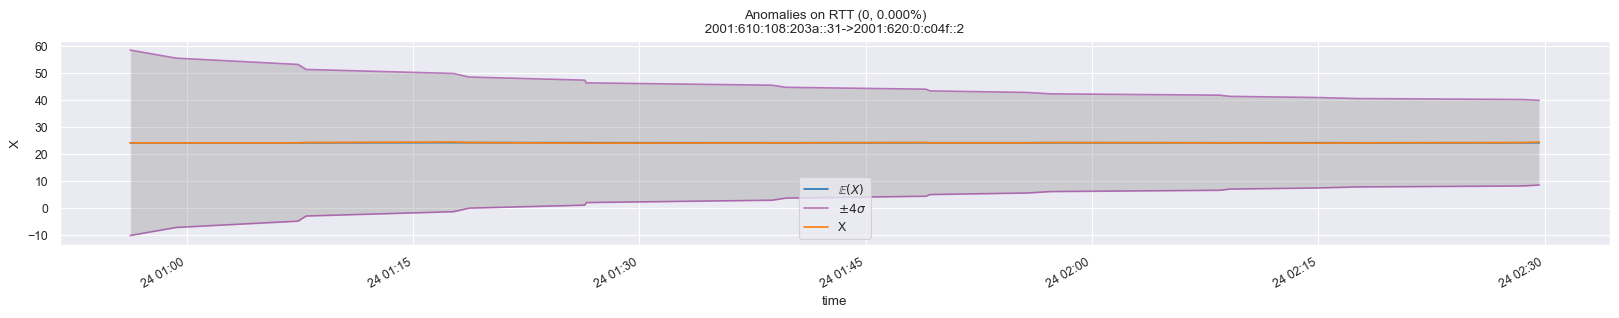

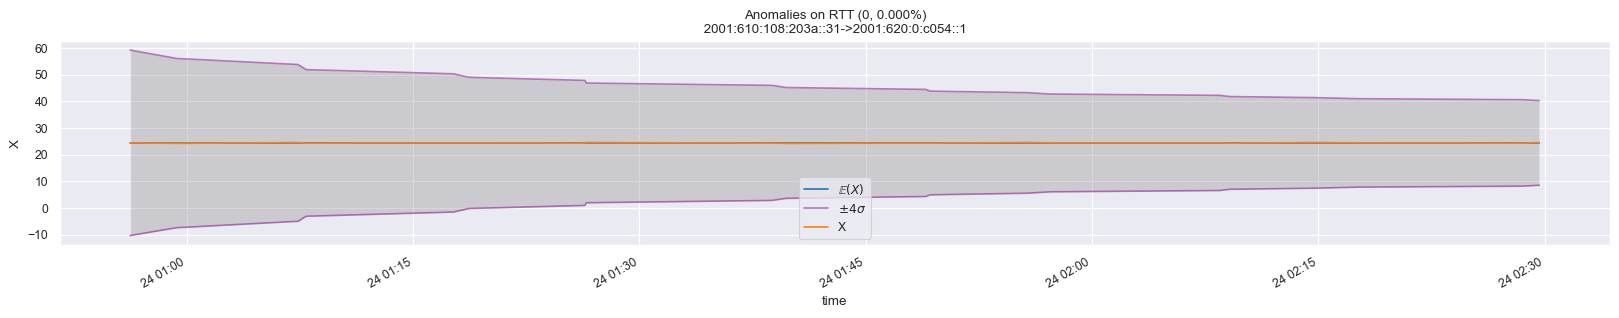

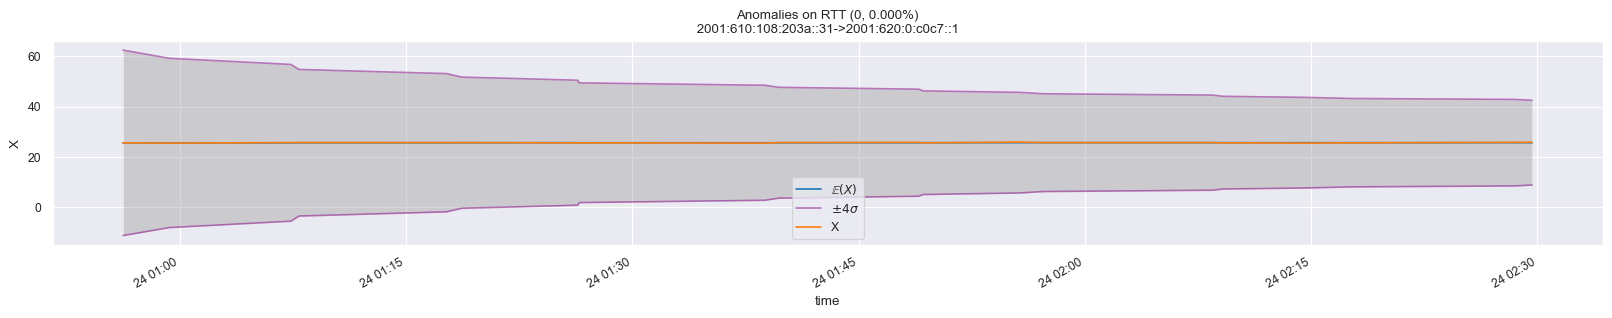

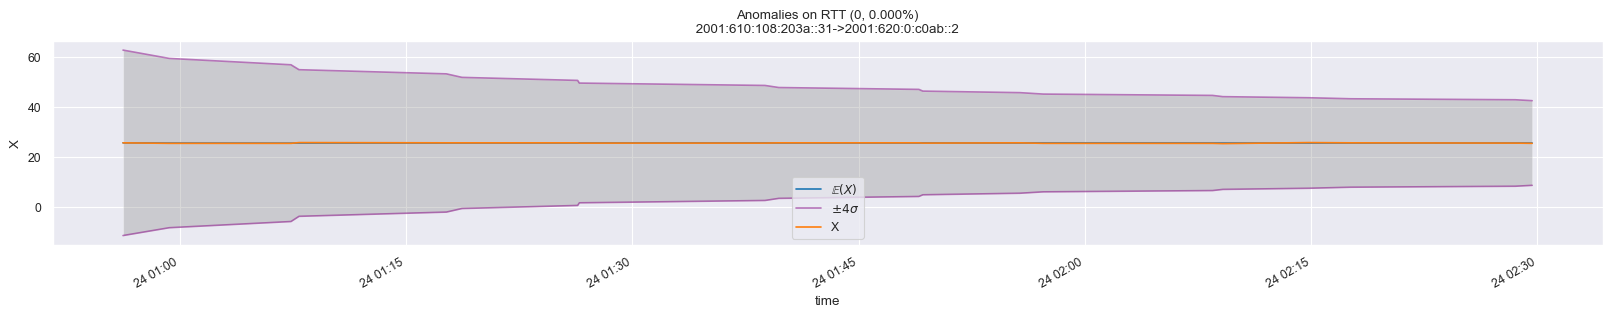

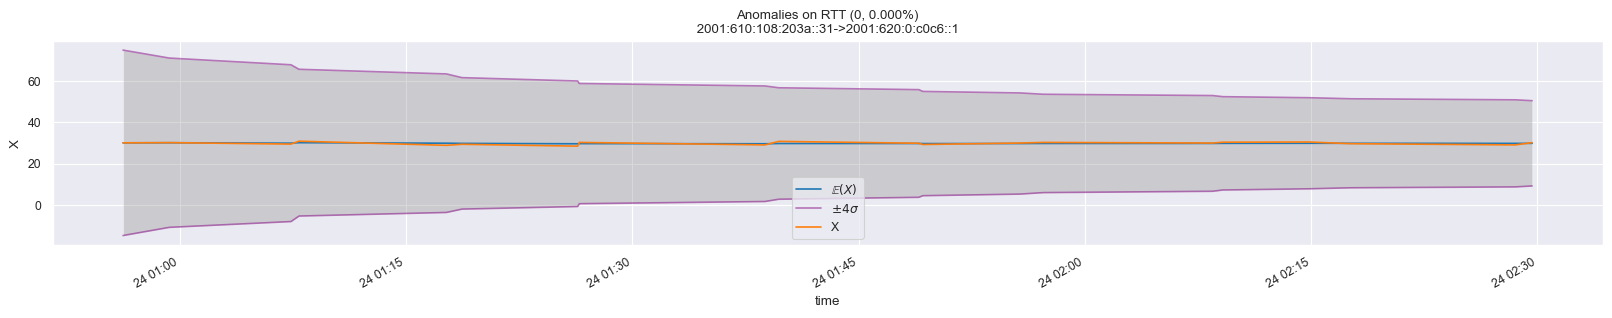

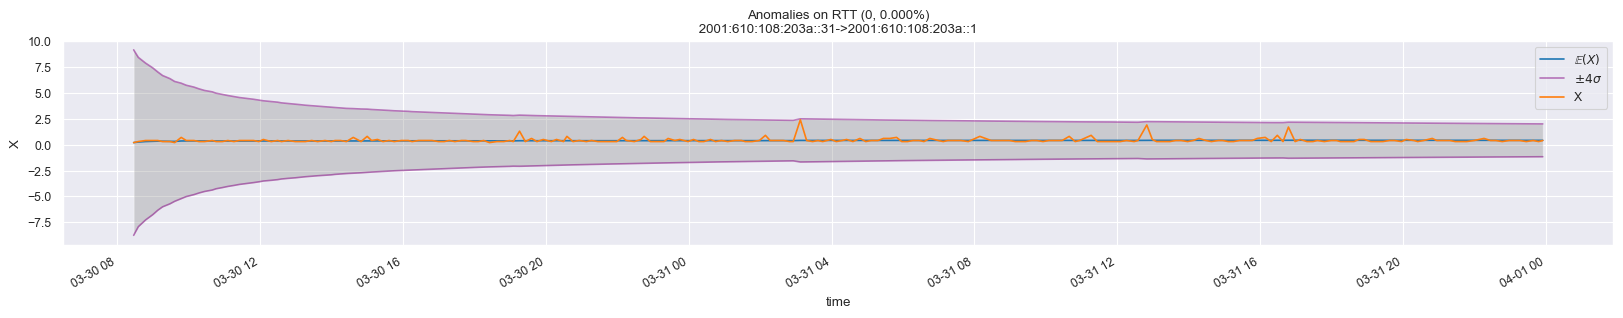

('145.100.32.31', '148.187.129.15')


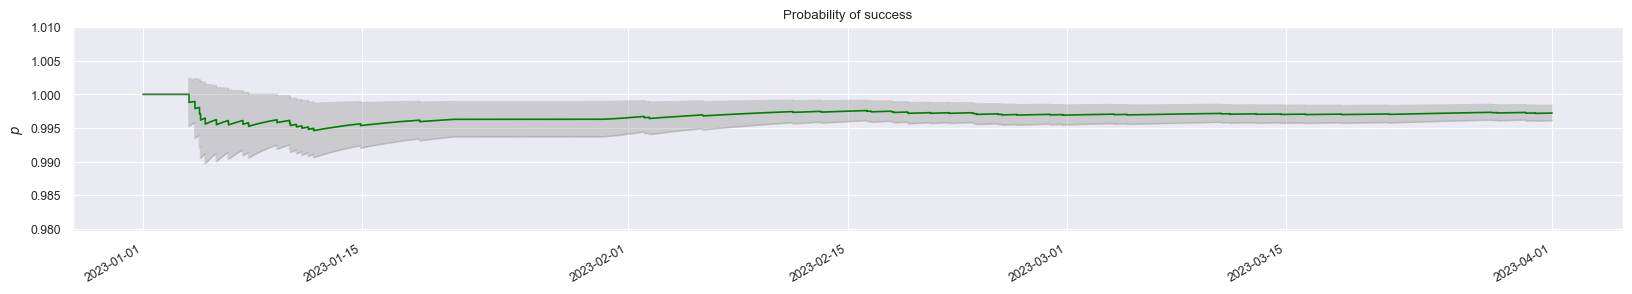

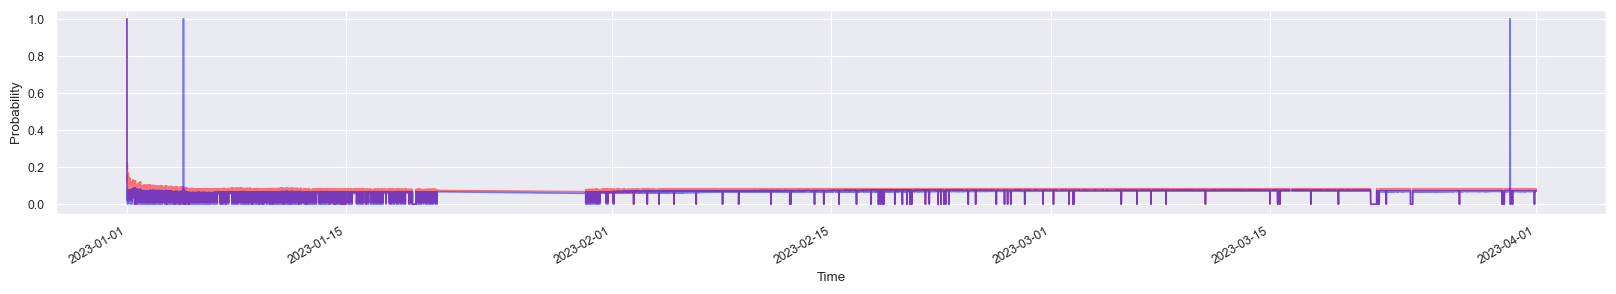

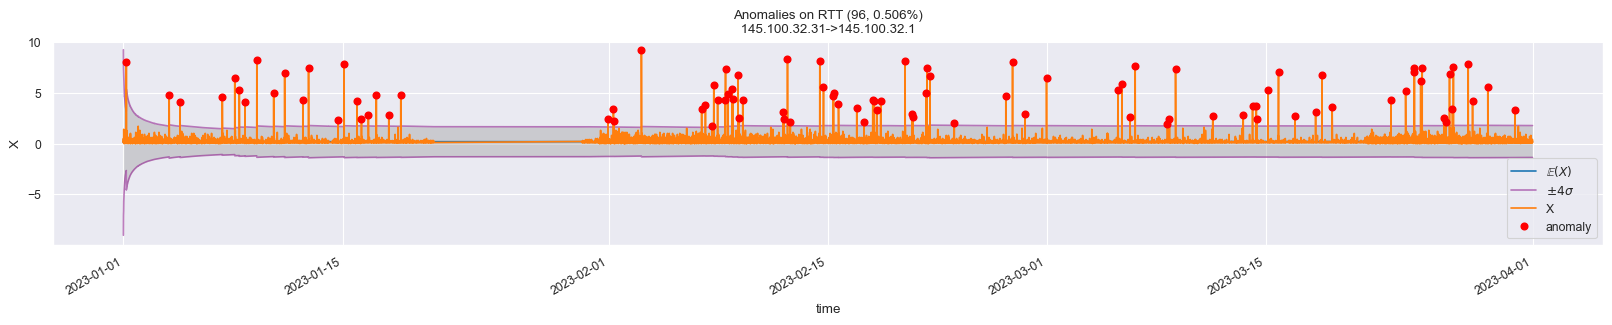

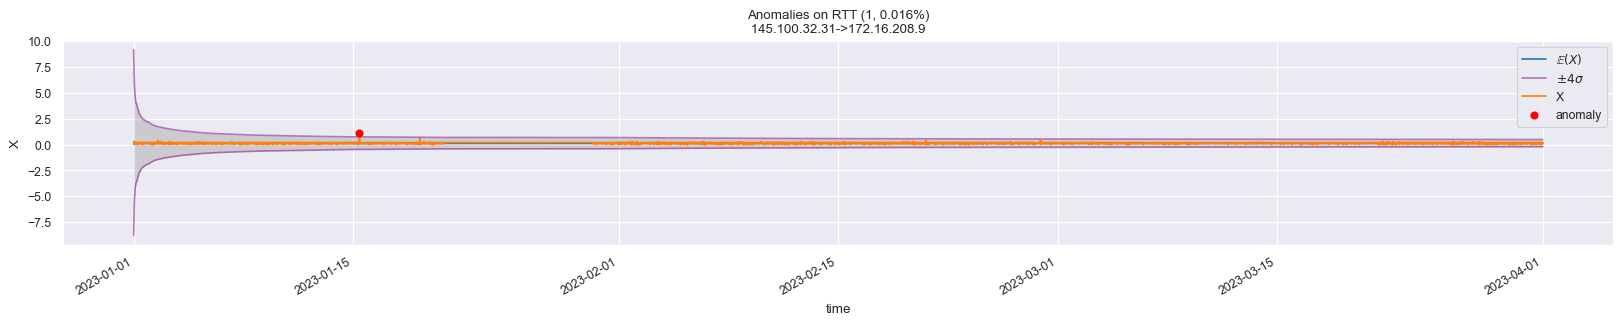

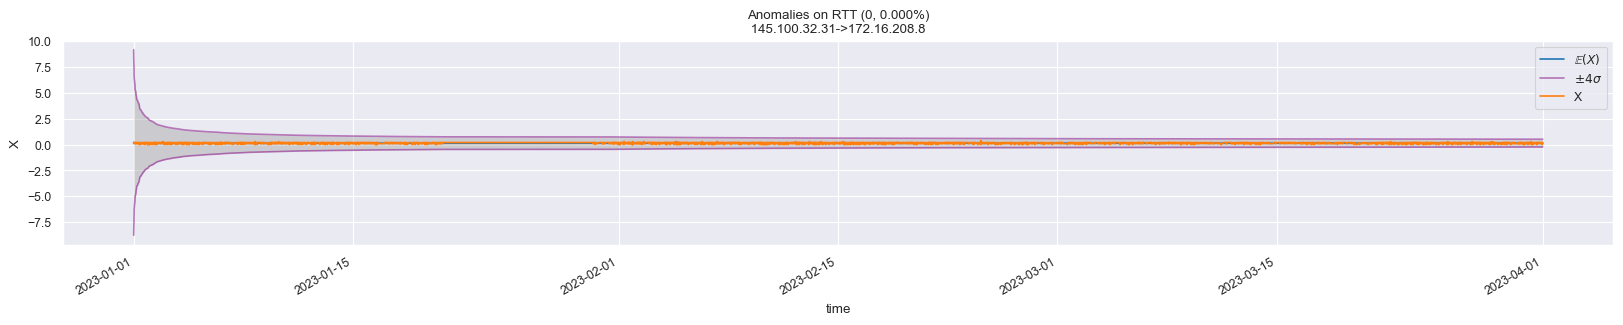

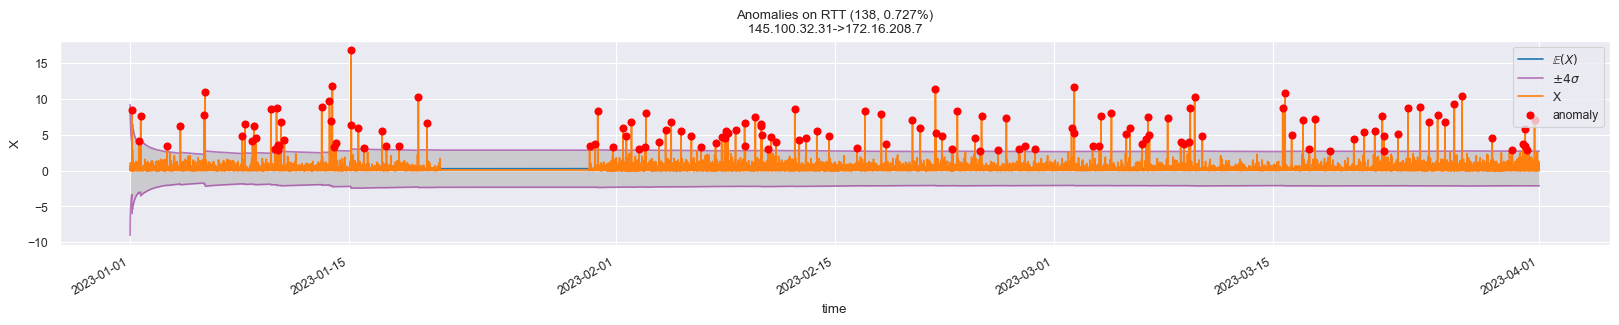

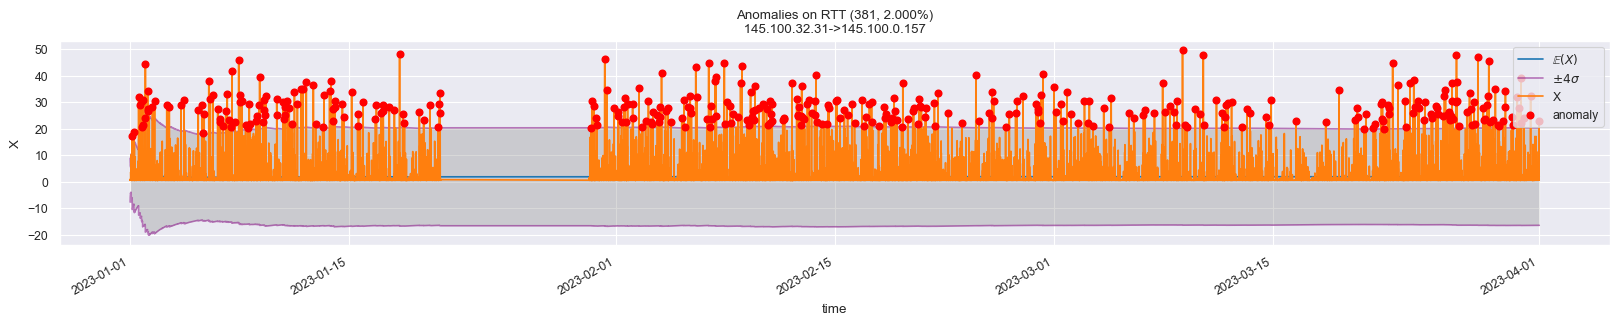

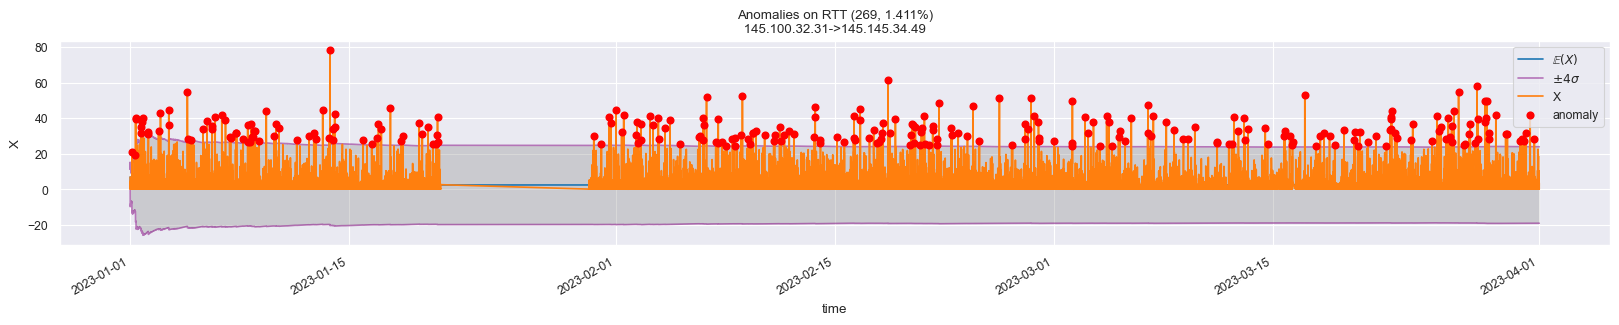

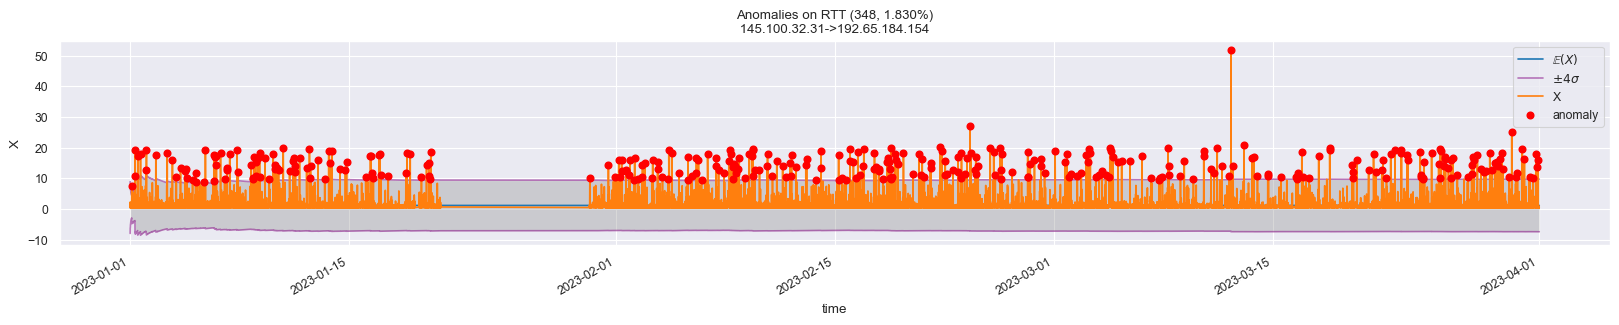

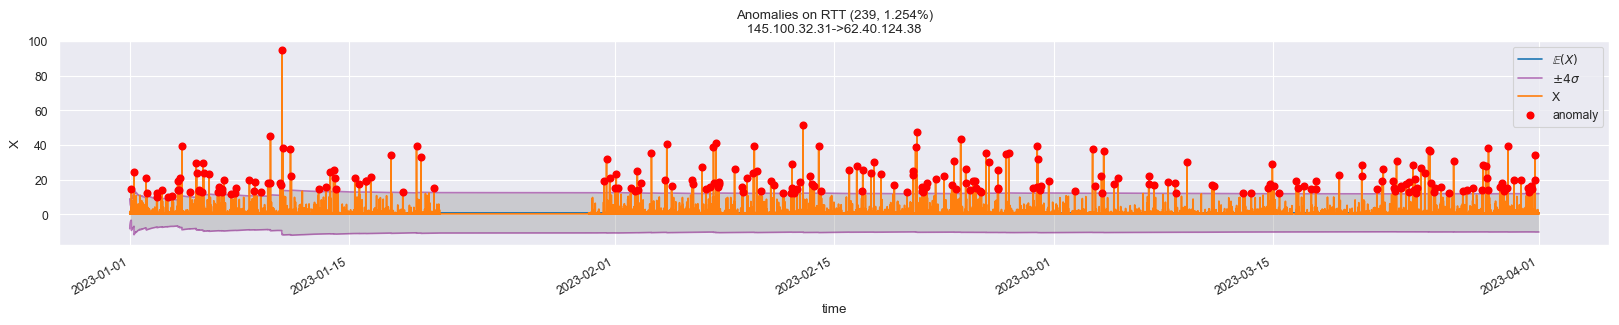

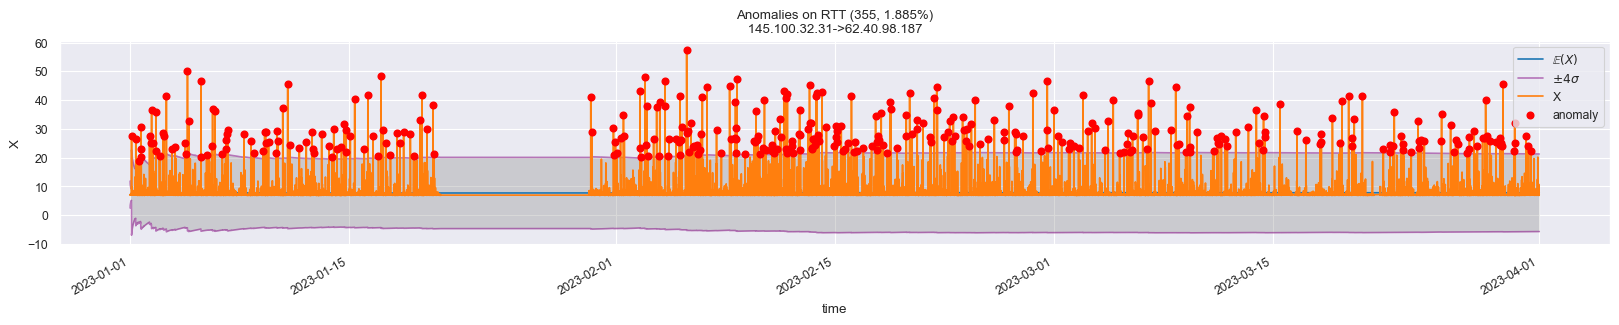

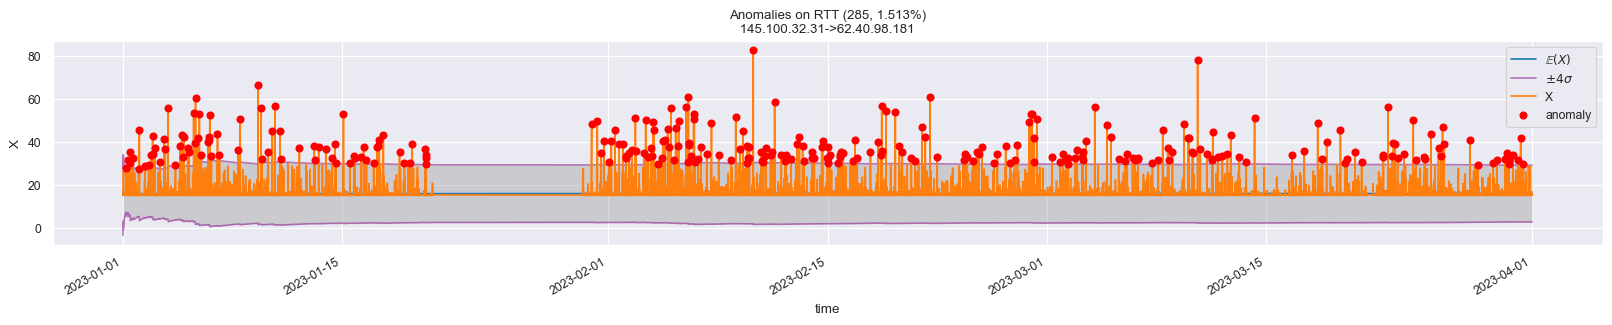

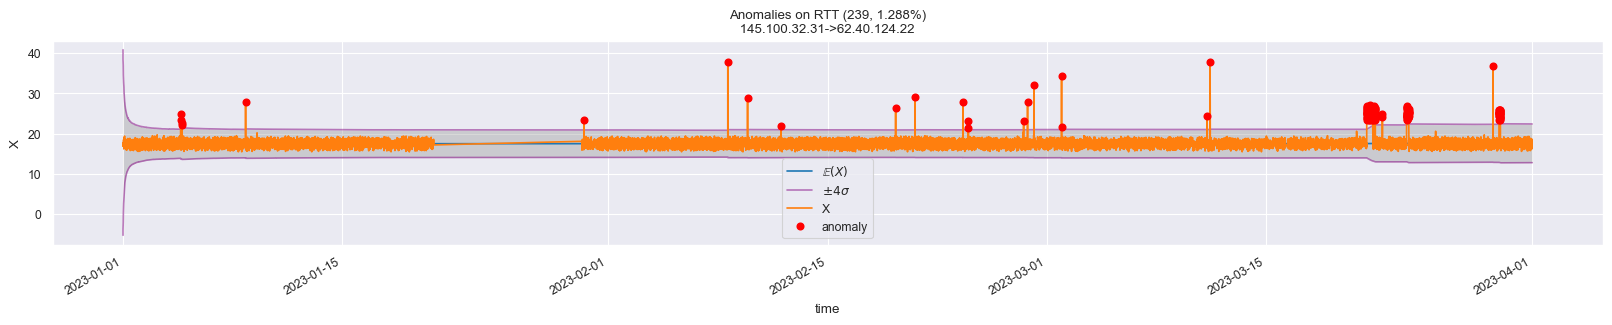

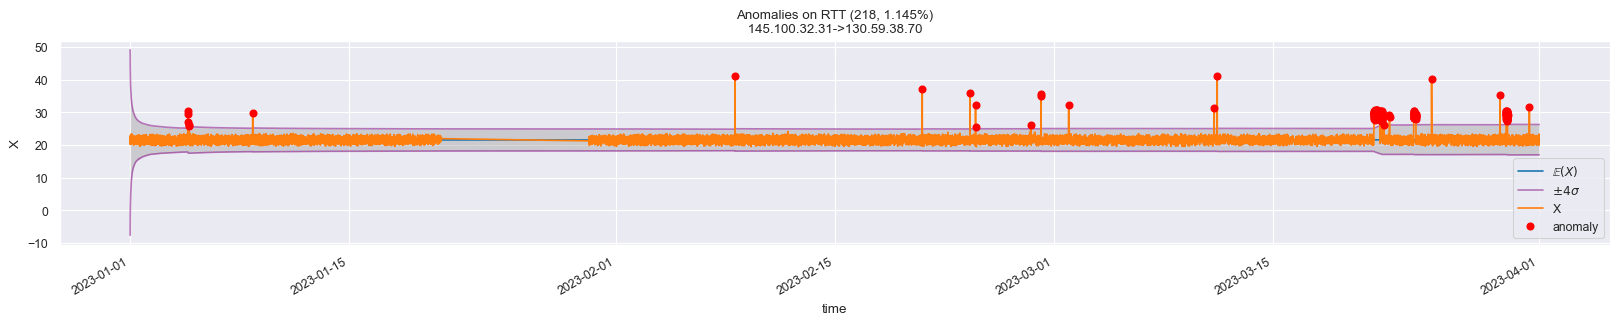

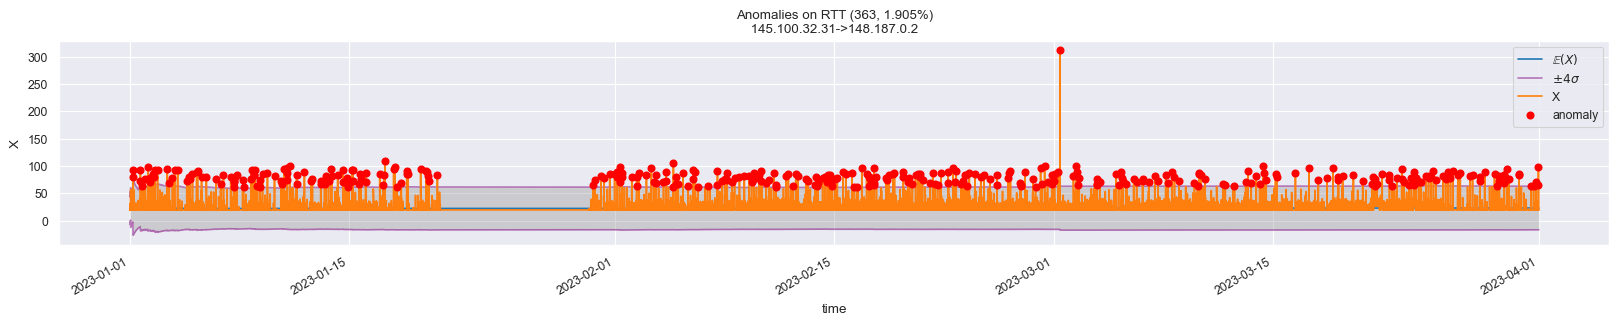

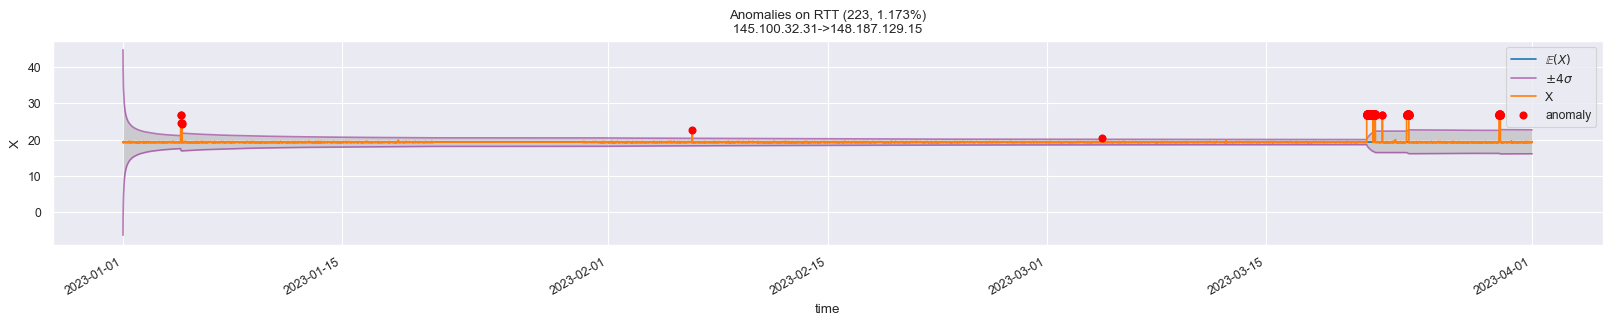

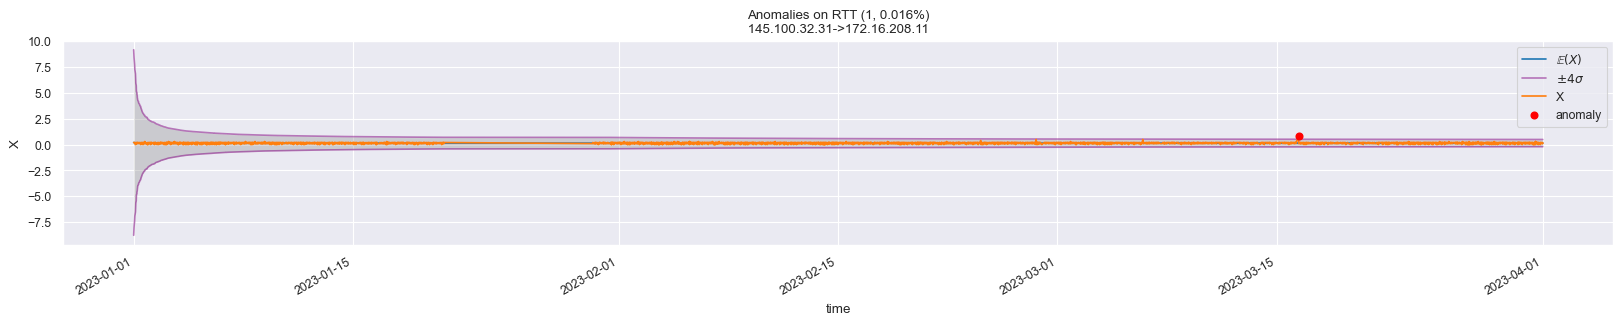

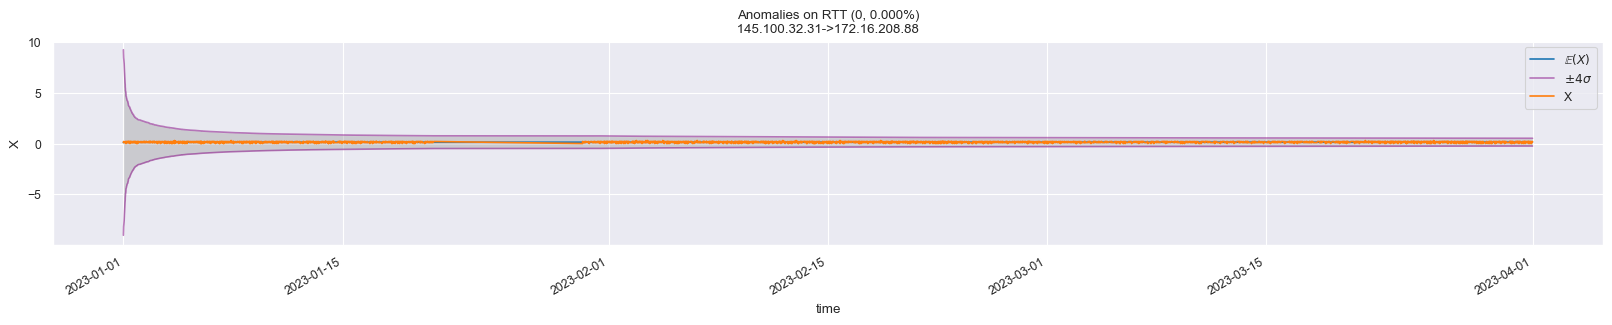

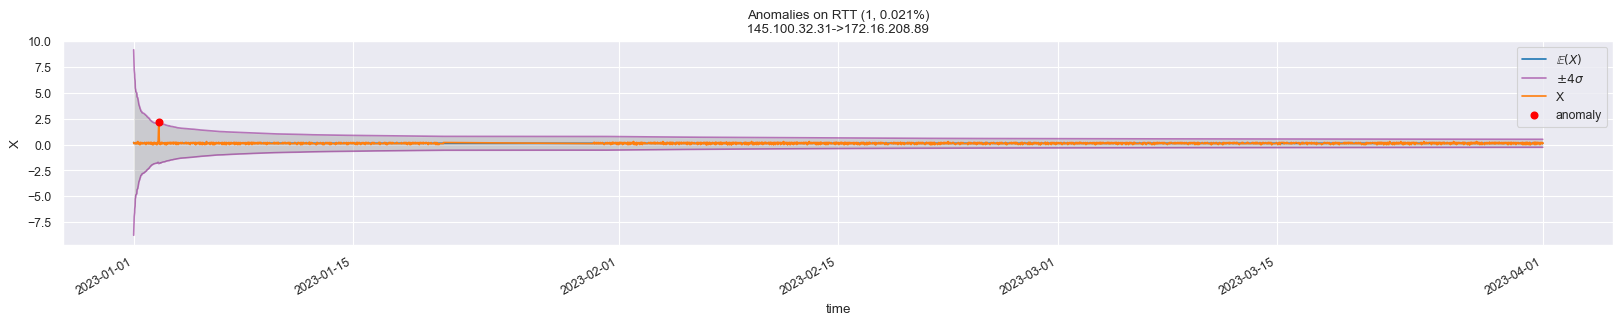

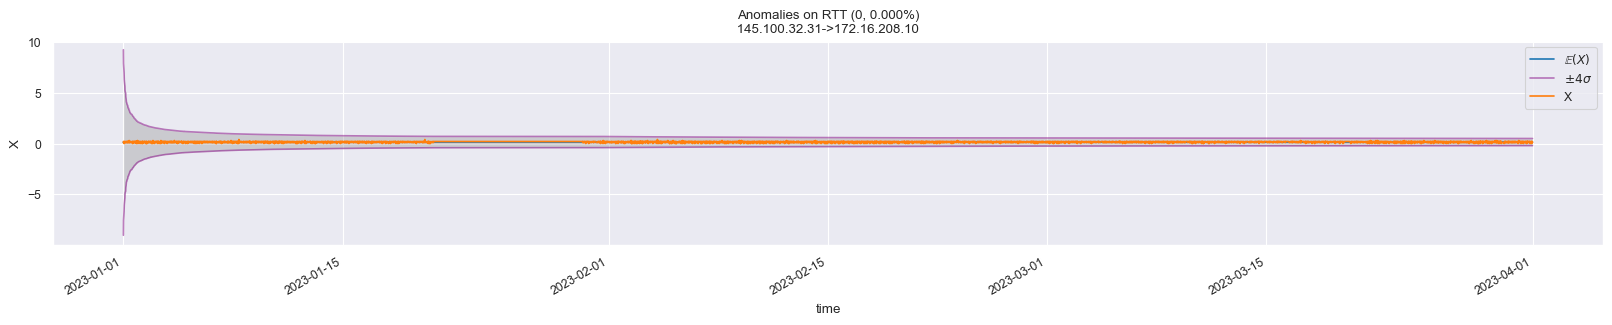

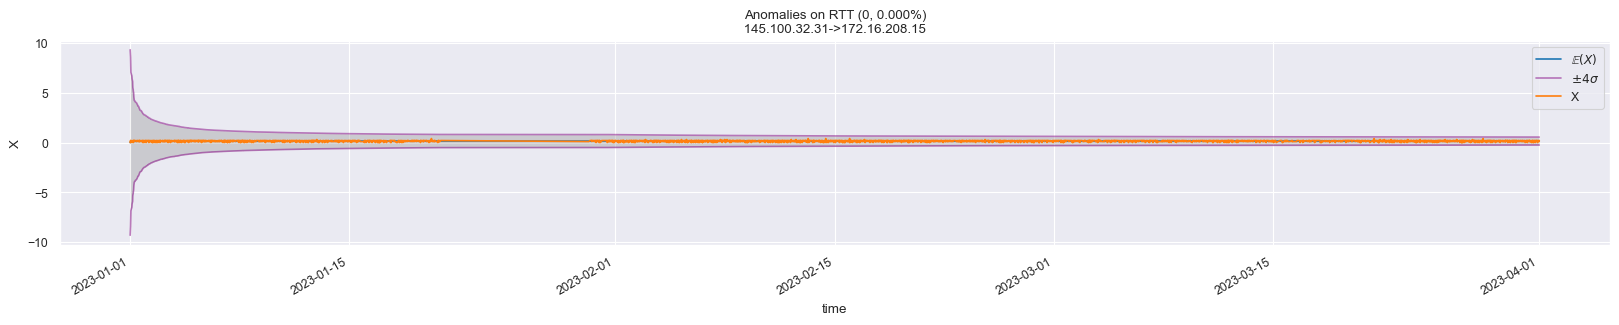

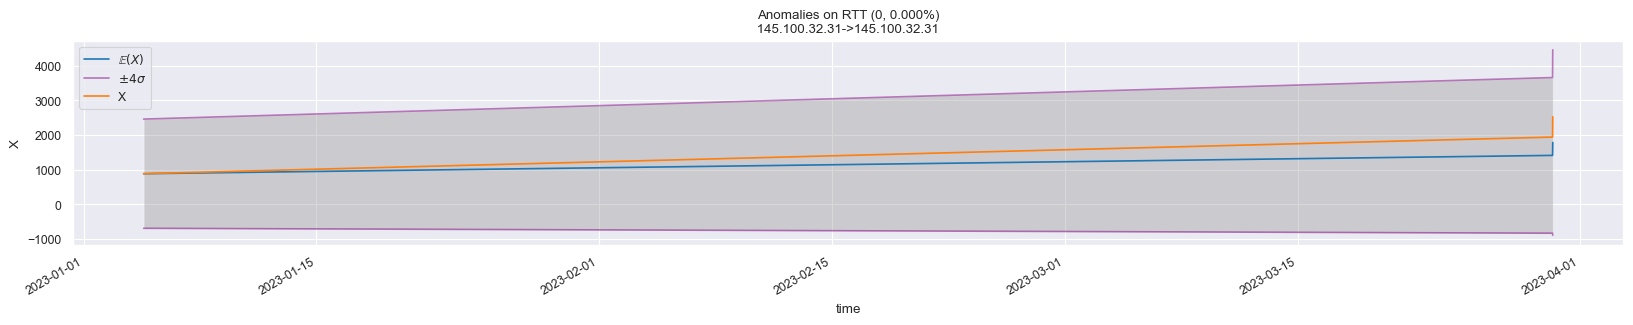

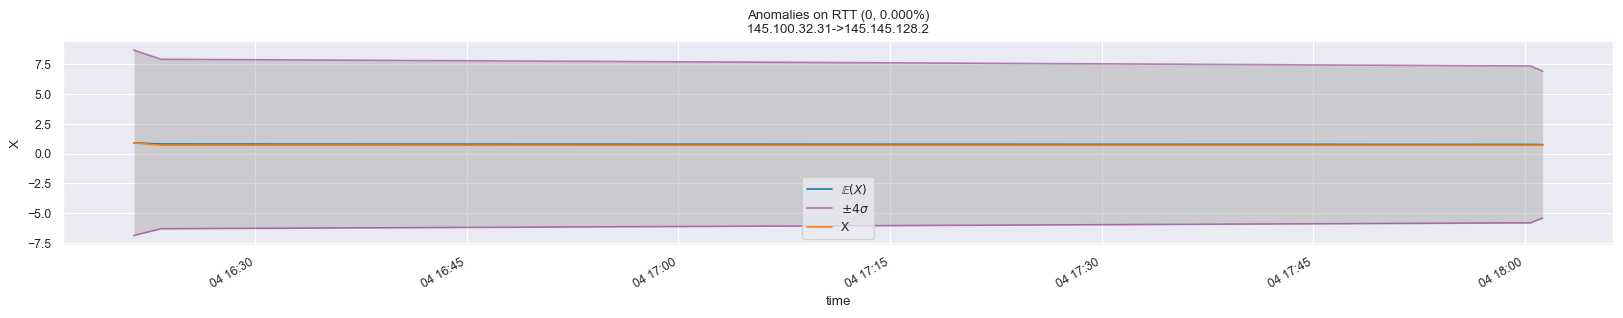

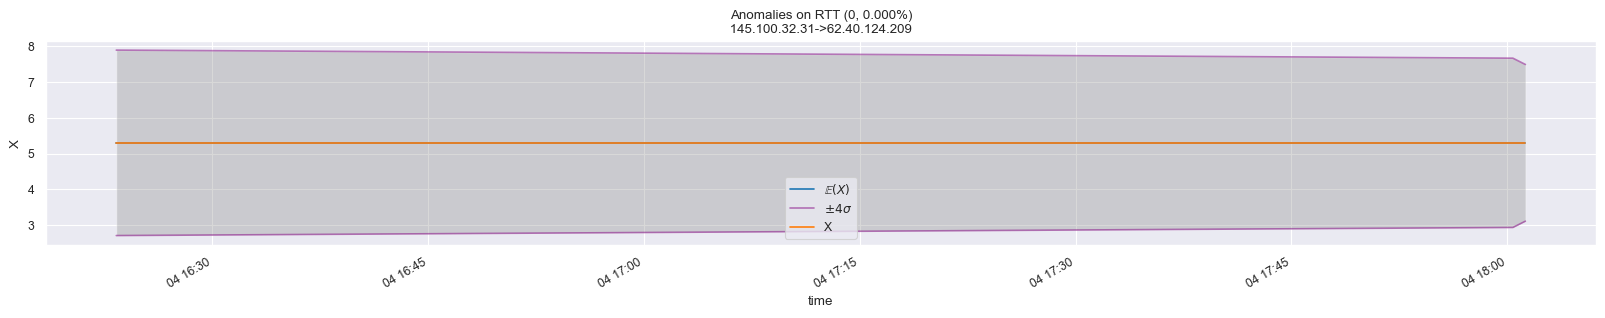

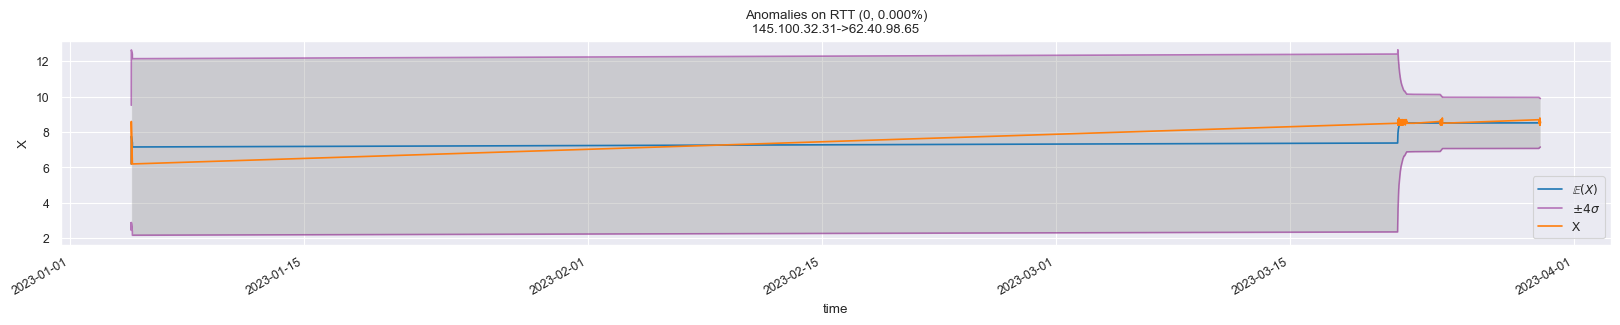

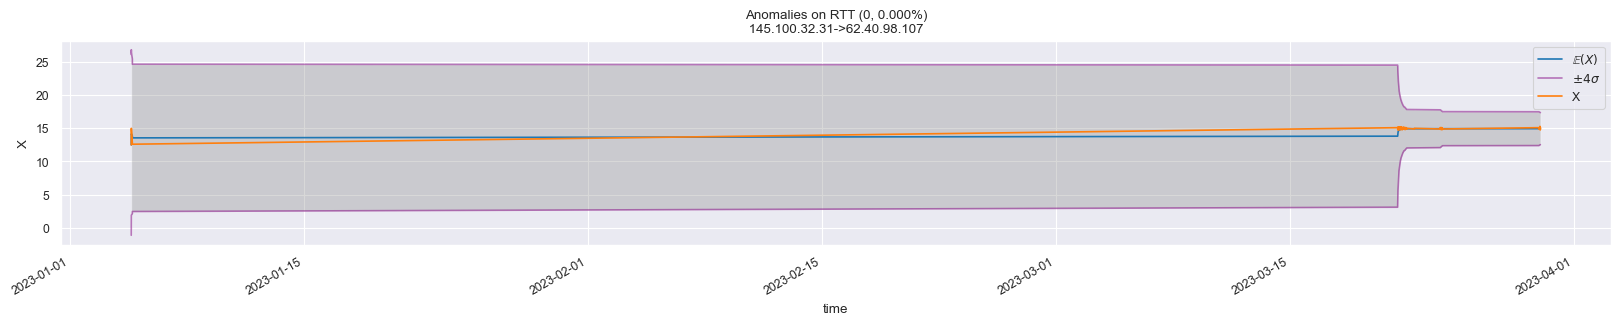

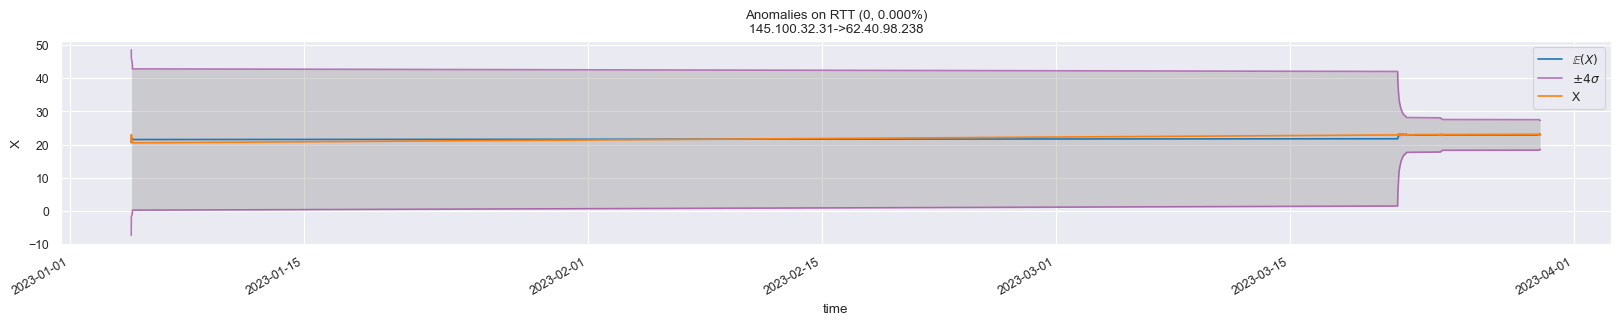

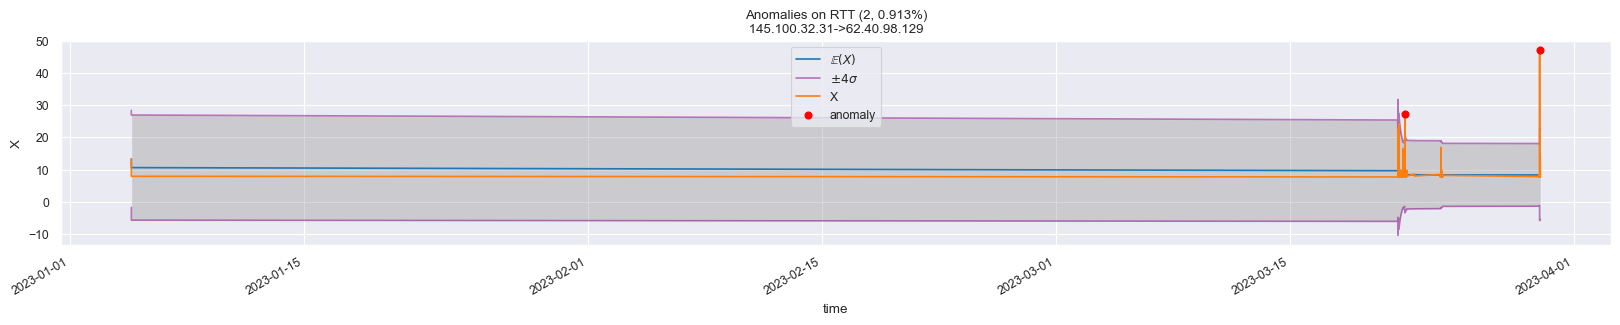

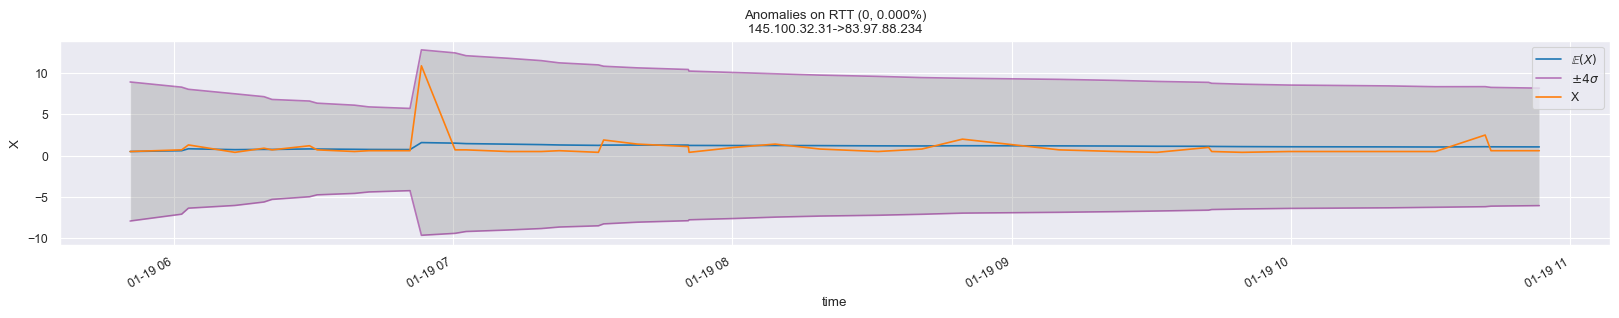

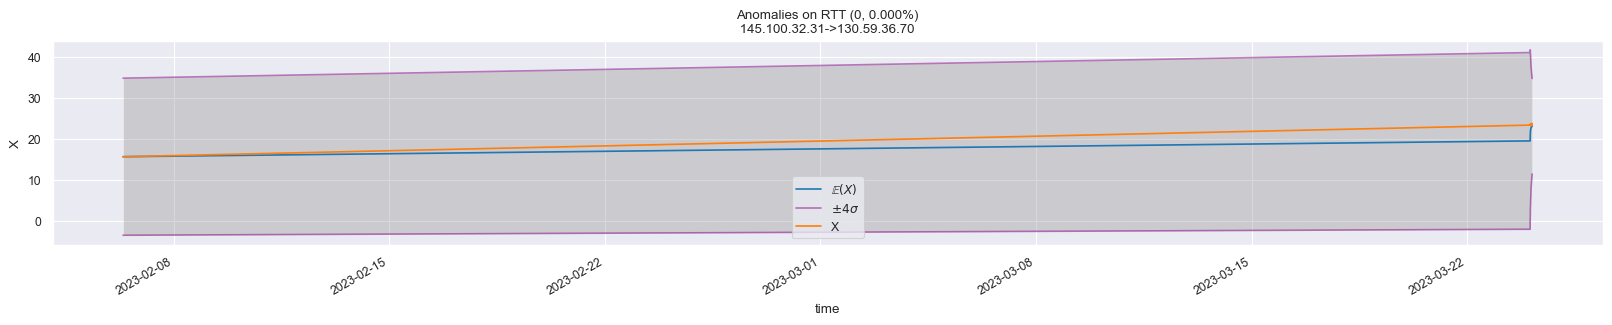

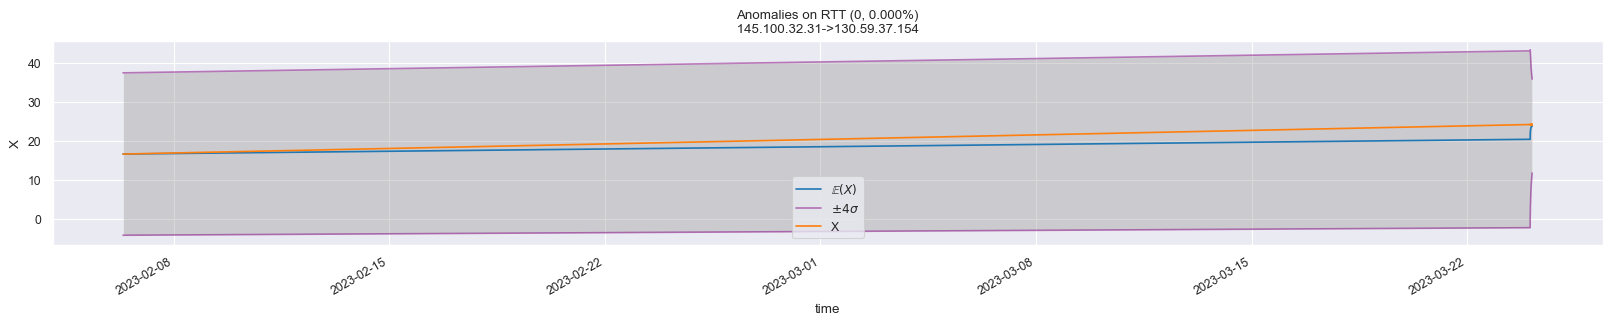

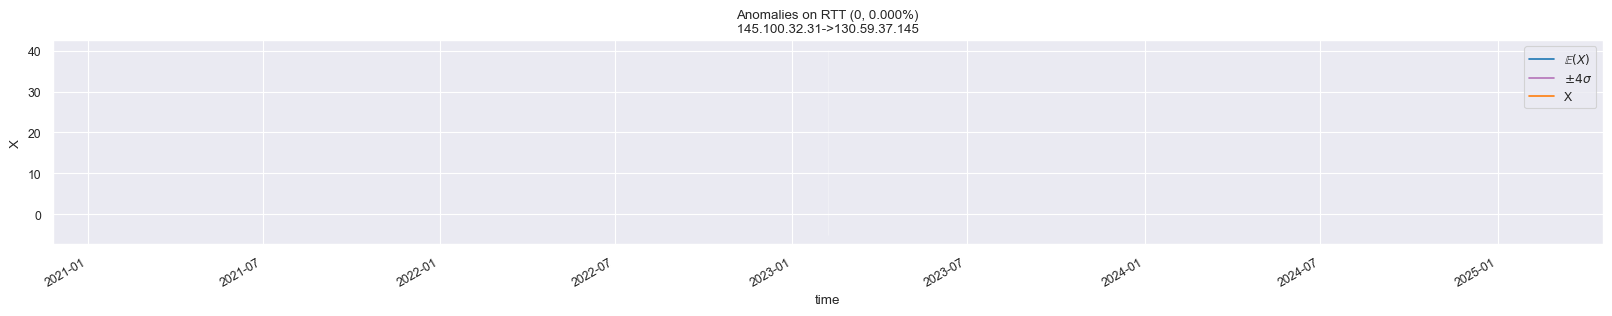

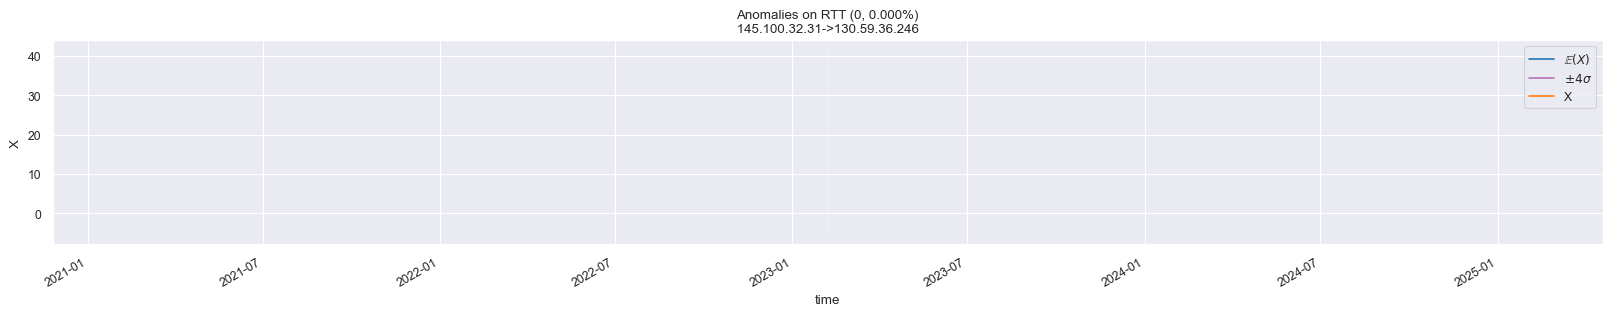

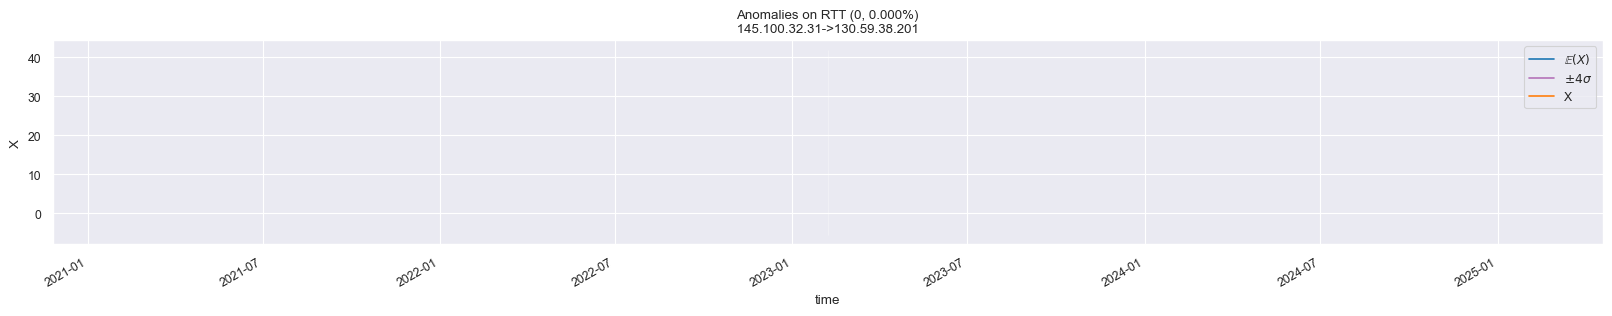

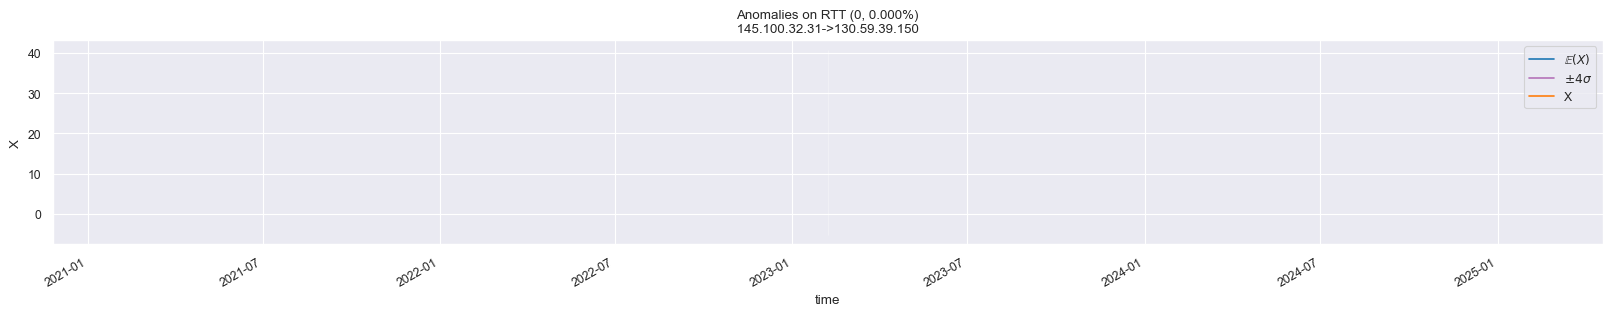

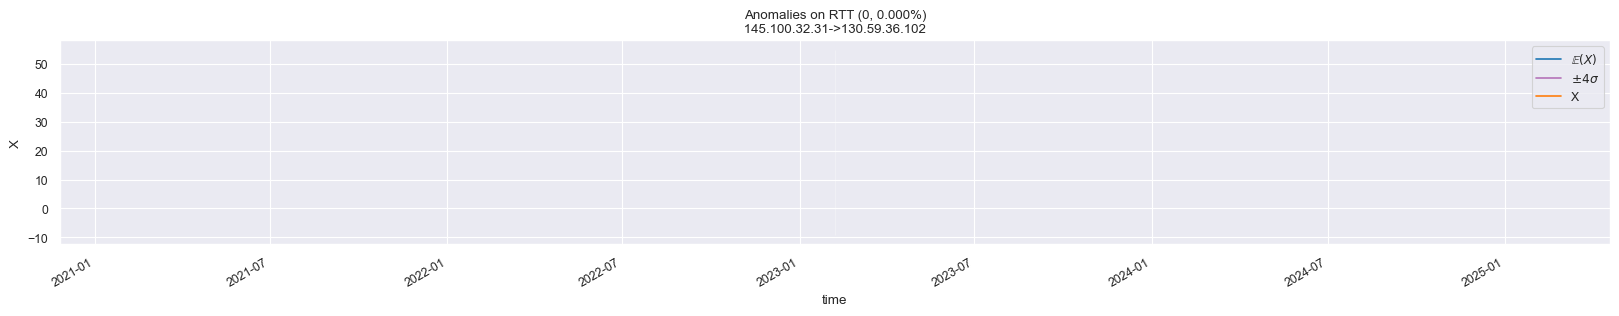

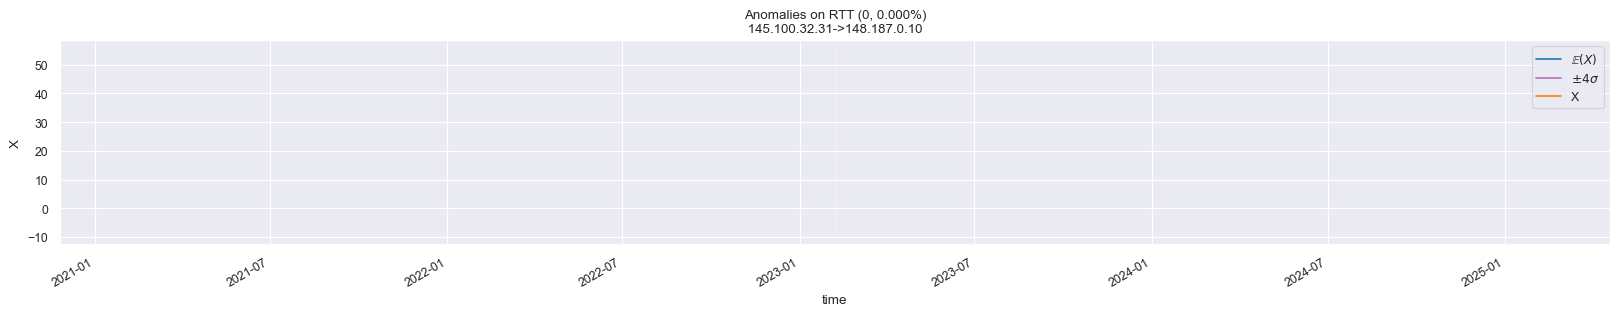

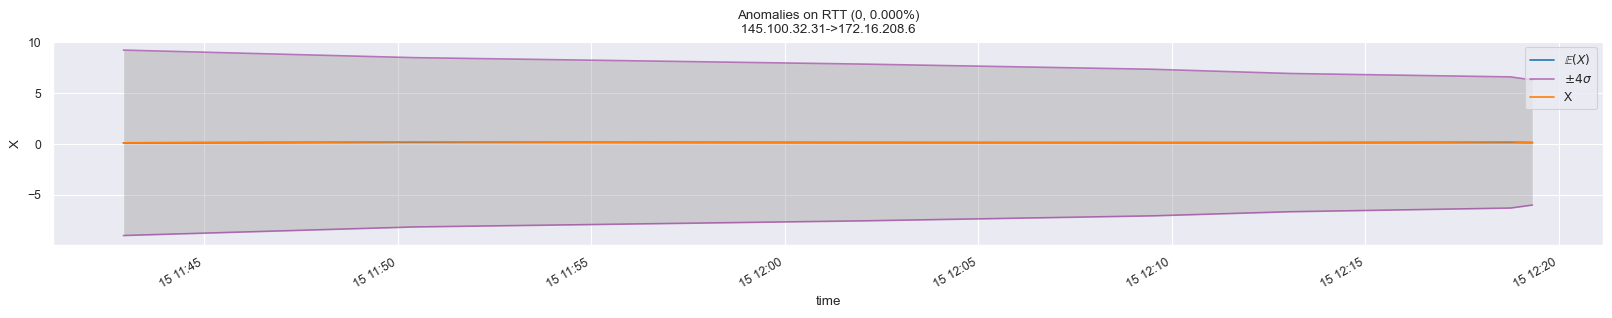

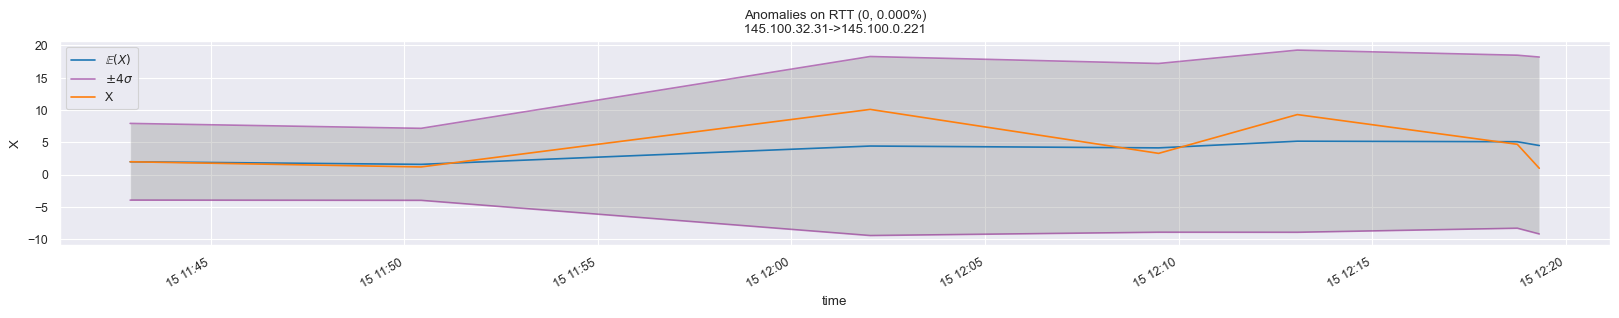

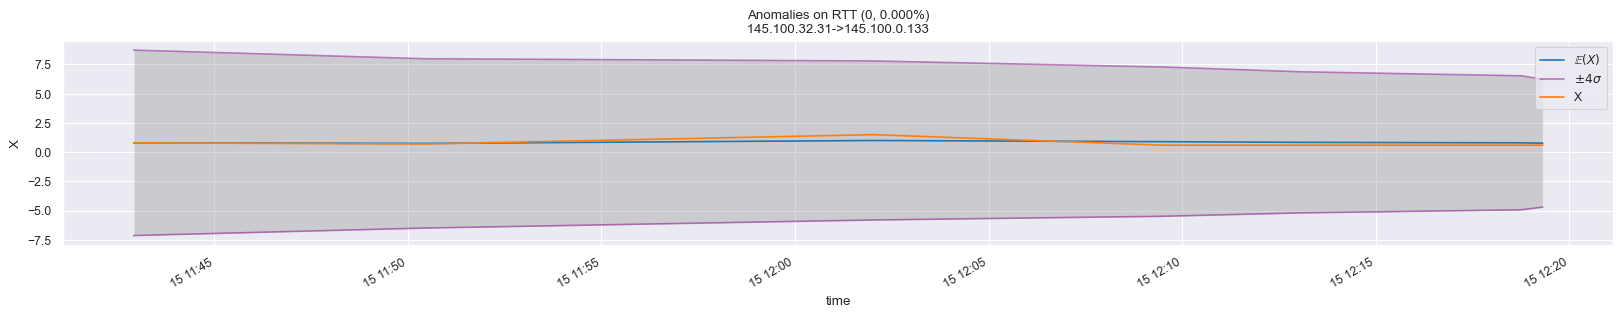

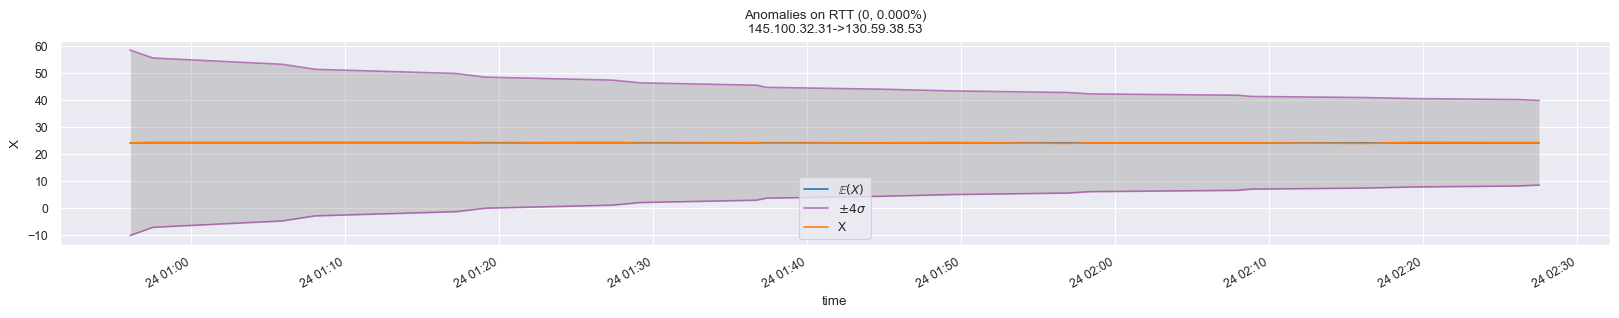

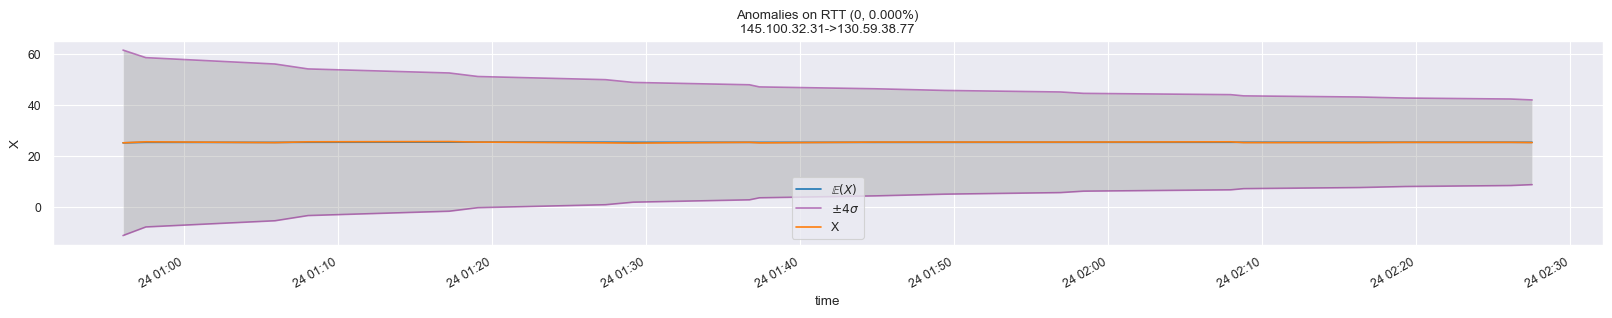

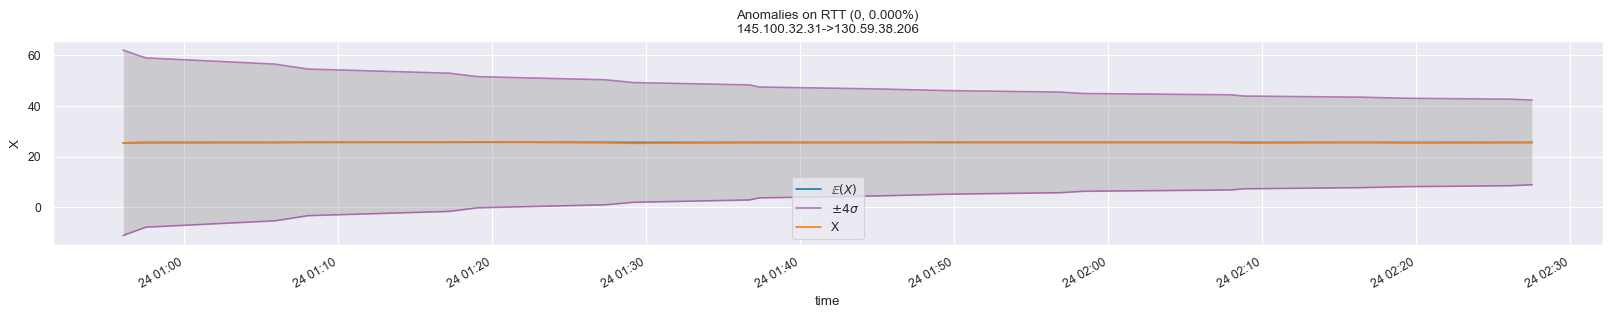

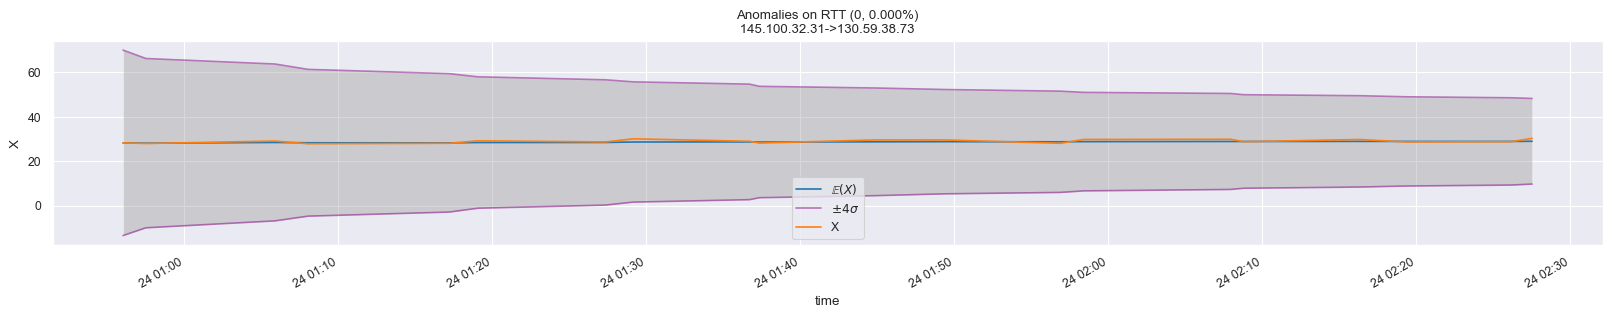

In [18]:
for k, v in stm.trace_models.items():
    print(k)
    fig = plt.figure(figsize=(20, 3))
    v.destination_reached_model.plot(fig.gca())
    plt.show()
    fig = plt.figure(figsize=(20, 3))
    v.hops_ip_model.plot(fig.gca())
    plt.show()

    for i,j in v.rtt_models.items():
        fig = plt.figure(figsize=(20, 3))
        j.plot(fig.gca())
        plt.legend()
        plt.show()


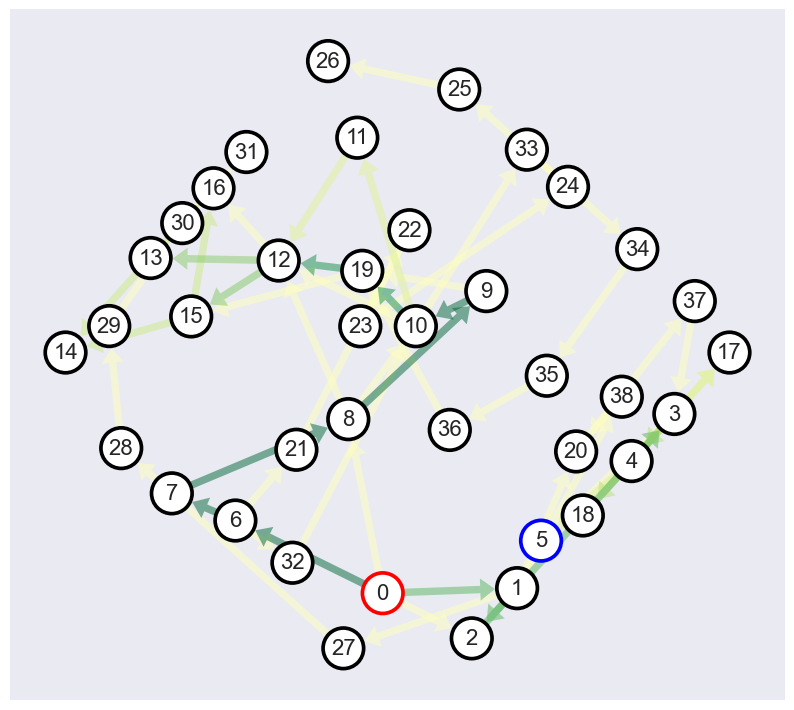

In [16]:
fig = plt.figure(figsize=(10, 10))
ta.hops_ip_model.plot_graph(fig.gca())

In [17]:
meta_df[meta_df['latitude'].isna()]

Empty DataFrame
Columns: [ip, continent_code, continent_name, country_code2, country_name, state_prov, district, city, latitude, longitude, is_eu, isp, connection_type, organization, time_zone]
Index: []

In [18]:
with open(f"data/out/geo_data/{dataset}.json", 'w') as f:
    f.write(ta.hops_ip_model.to_json(ip_to_geo))

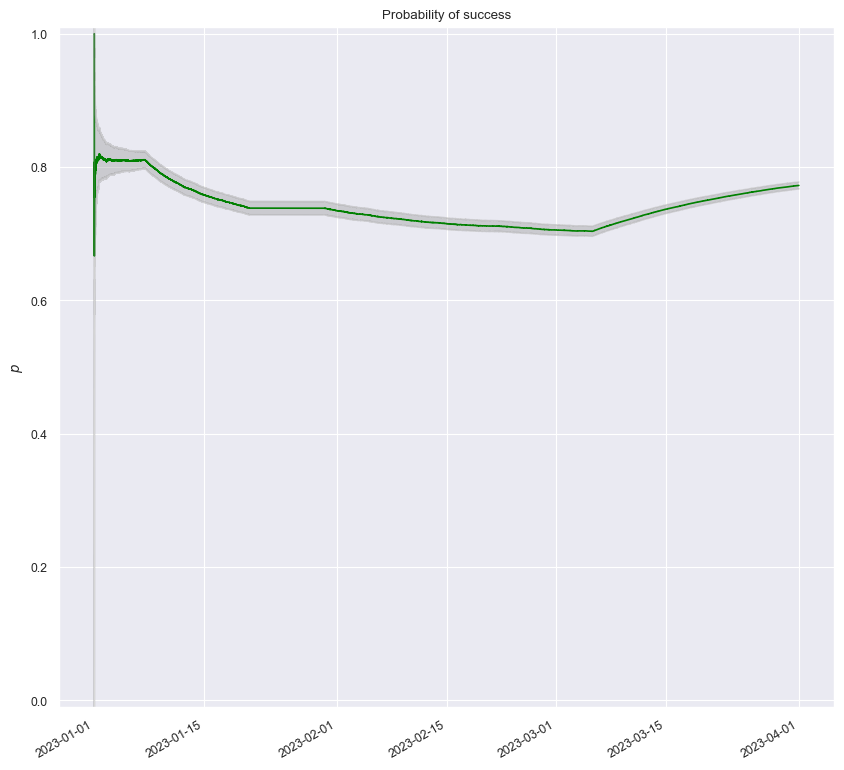

In [20]:
fig= plt.figure(figsize=(10, 10))
ta.destination_reached_model.plot(plt.gca())

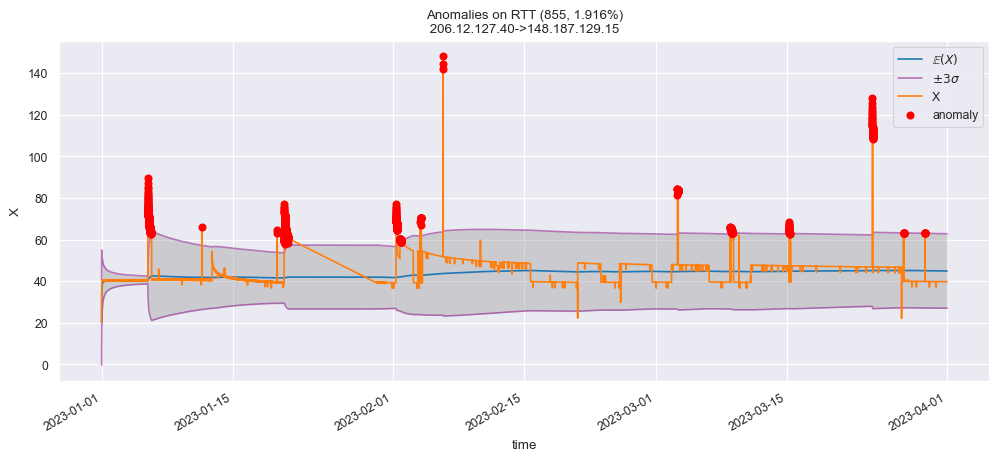

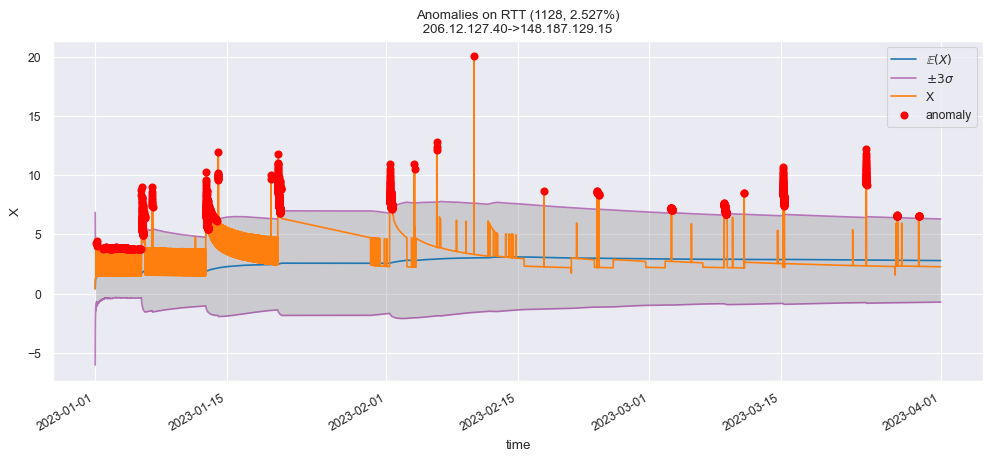

In [18]:
# fig, (ax1, ax2) = plt.subplots( 2, 1, figsize=(12, 5))
fig = plt.figure(figsize=(12, 5))
ax = plt.gca()
ta.hops_ip_model.global_anomaly_model.plot(ax)

fig = plt.figure(figsize=(12, 5))
ax = plt.gca()
ta.hops_ip_model.local_anomaly_model.plot(ax)

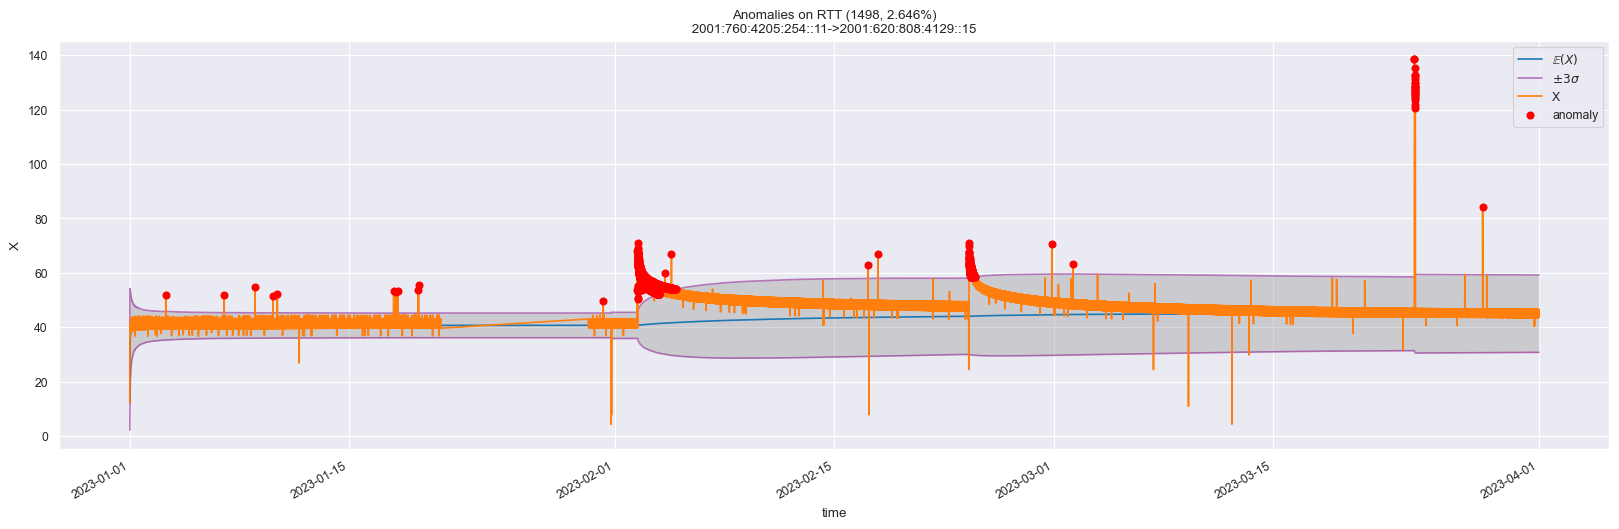

In [19]:
fig=plt.figure(figsize=(20, 6))
ta.hops_ip_model.weighted_anomaly_model.plot(plt.gca())

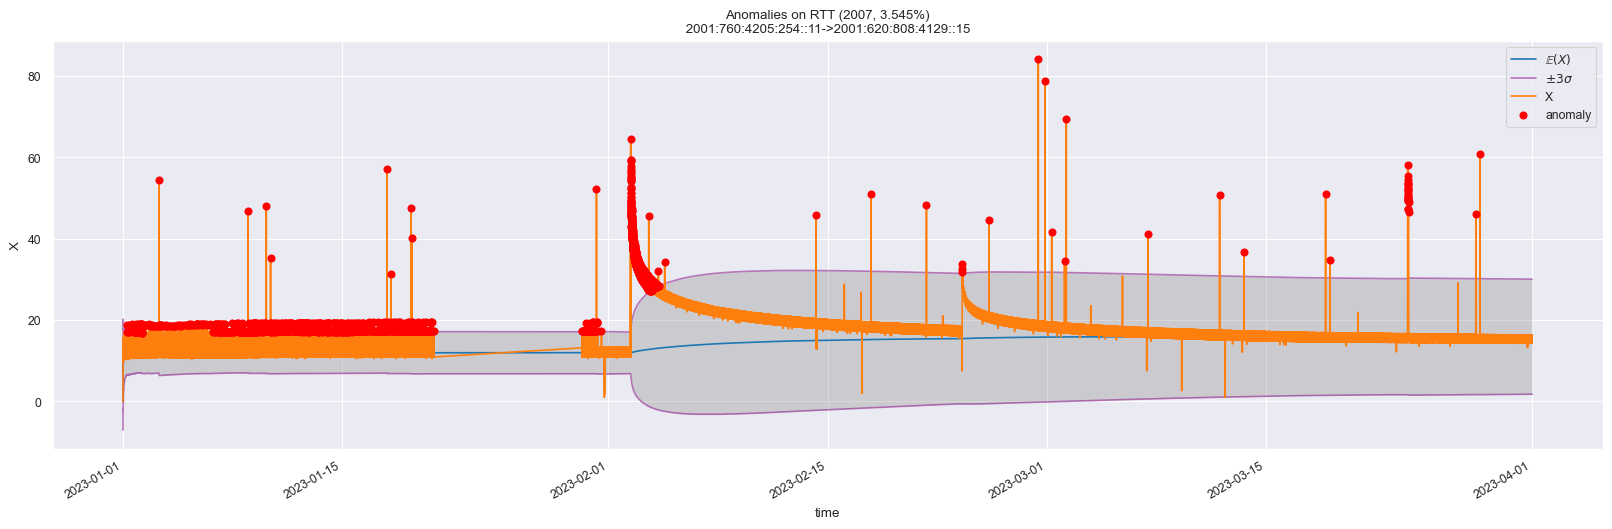

In [20]:
fig=plt.figure(figsize=(20, 6))
ta.hops_ip_model.node_prob_edge_prob.plot(plt.gca())

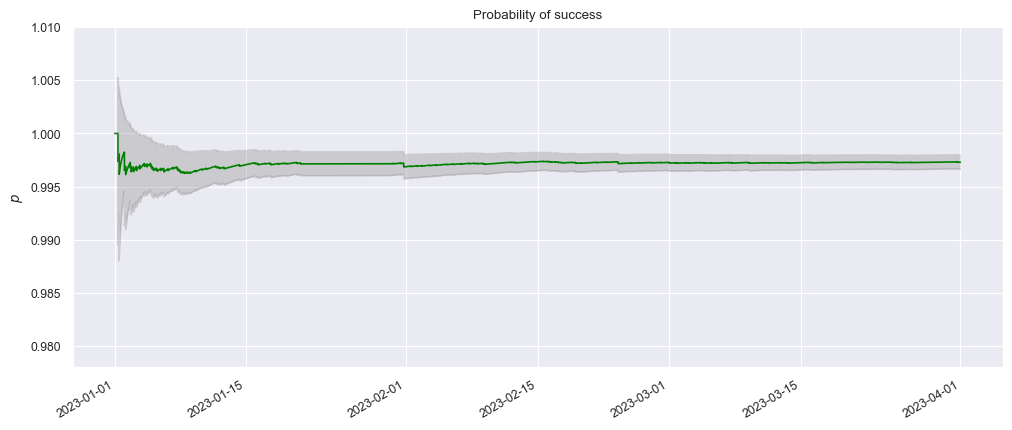

In [21]:
fig = plt.figure(figsize=(12, 5))
ta.destination_reached_model.plot(plt.gca())

In [22]:
import netgraph as ng

In [23]:
g = ta.hops_ip_model.to_graph()

In [24]:
import networkx as nx

In [25]:
current = 0

def increment():
    global current
    current += 1
    return current

In [26]:
depths = defaultdict(lambda : 0) # default value is current

In [27]:
g.nodes[0]['d'] = 0

In [28]:
for src, items in nx.algorithms.traversal.bfs_successors(g,0):
    depth = depths[src]
    for dest in items:
        depths[dest] = depth + 1
        # g.edges[(src, dest)]['l'] = depths[dest]
        g.nodes[dest]['d'] = depths[dest]

In [29]:
layout = nx.layout.multipartite_layout(g, subset_key='d')

In [30]:
for node in g.nodes:
    g.nodes[node]['pos'] = layout[node]

In [35]:
df = ta.hops_ip_model.global_anomaly_model.to_frame().reset_index()

In [36]:
df[~df['anomalies']].sample(n=5)

index   observed             ts    alpha           beta         mu     sigma  upper_bound  lower_bound  anomalies                      u                      v  total
49002 2023-03-11 13:11:02  42.969122  1678540262000  24502.5  309617.190027  41.125833  3.554663    51.789823    30.461843      False  2001:760:4205:254::11  2001:620:808:4129::15  49003
15855 2023-01-15 18:59:28  37.298526  1673809168000   7929.0    8709.919201  37.876984  1.048022    41.021050    34.732917      False  2001:760:4205:254::11  2001:620:808:4129::15  15856
17661 2023-01-17 14:49:30  39.567509  1673966970000   8832.0    9532.172653  37.877225  1.038824    40.993696    34.760754      False  2001:760:4205:254::11  2001:620:808:4129::15  17662
18814 2023-01-18 20:10:50  37.502946  1674072650000   9408.5   10092.538419  37.879488  1.035659    40.986467    34.772510      False  2001:760:4205:254::11  2001:620:808:4129::15  18815
19599 2023-01-19 17:08:14  37.297184  1674148094000   9801.0   10510.345360  37.881861  1.035502    40.988369    34.775354      False  2001:760:4205:254::11  2001:620:808:4129::15  19600

In [41]:
key_iter = iter(list(ta.ttl_models.keys())[3:])

In [71]:
ip  = next(key_iter)    

<AxesSubplot: title={'center': '2001:620:808:4129::15'}>

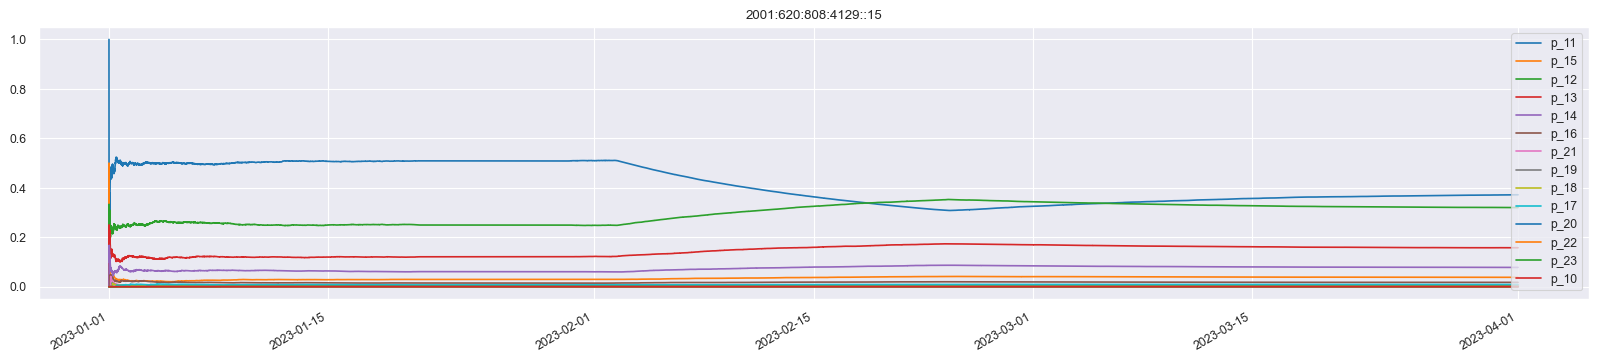

In [73]:
fig = plt.figure(figsize=(20, 4))

tmp = ta.ttl_models[ip].to_frame()


probs = tmp[filter(lambda x: x.startswith('p') , tmp.columns)]
probs.plot(title=ip, ax=plt.gca())

In [74]:
informations = probs.apply(lambda x: -x*np.log(x))

/home/msi/miniconda3/envs/stats/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: >

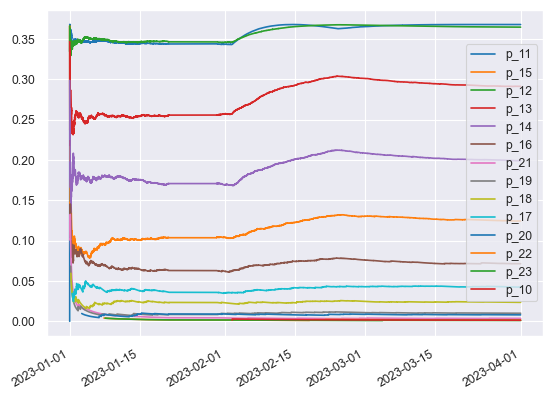

In [75]:
informations.plot()

<AxesSubplot: >

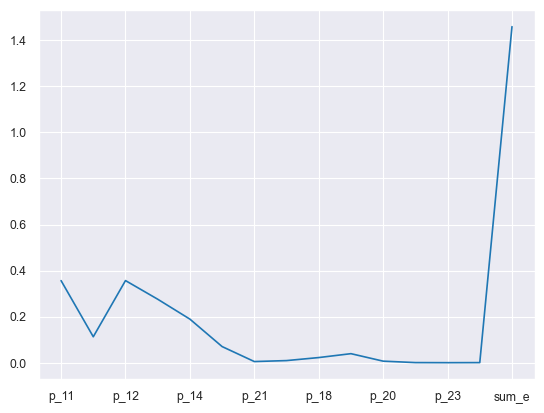

In [80]:
informations.mean(axis=1).plot()

In [120]:
tmp['expected'] = tmp[filter(lambda x: x[0]=='p', tmp.columns)].apply(lambda x: int( x.index[np.argmax(x)][2:]), axis=1)

In [121]:
tmp

ttls      p_11      p_15      p_12      p_13      p_14      p_16      p_21      p_19      p_18      p_17      p_20      p_22      p_23      p_10  var_p_11  var_p_15  var_p_12  var_p_13  var_p_14      var_p_16      var_p_21      var_p_19      var_p_18      var_p_17      var_p_20      var_p_22      var_p_23      var_p_10      m_11      m_15      m_12      m_13      m_14      m_16      m_21      m_19      m_18      m_17      m_20      m_22      m_23      m_10   n_11  n_15  n_12  n_13  n_14  n_16  n_21  n_19  n_18  n_17  n_20  n_22  n_23  n_10  anomalies  anomalies_y                      u                      v  total  expected
2023-01-01 00:00:36    11  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000      1     0     0     0     0     0     0     0     0     0     0     0     0     0       True     0.000000  2001:760:4205:254::11  2001:620:808:4129::15      1        11
2023-01-01 00:01:46    15  0.666667  0.500000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.083333  0.083333  0.000000  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.500000  0.500000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000      1     1     0     0     0     0     0     0     0     0     0     0     0     0       True     0.000000  2001:760:4205:254::11  2001:620:808:4129::15      2        11
2023-01-01 00:07:17    12  0.400000  0.333333  0.333333  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.055556  0.055556  0.055556  0.000000  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.333333  0.333333  0.333333  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000      1     1     1     0     0     0     0     0     0     0     0     0     0     0       True     0.000000  2001:760:4205:254::11  2001:620:808:4129::15      3        11
2023-01-01 00:08:51    13  0.285714  0.250000  0.285714  0.250000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.037500  0.037500  0.037500  0.037500  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.250000  0.250000  0.250000  0.250000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000      1     1     1     1     0     0     0     0     0     0     0     0     0     0       True     0.000000  2001:760:4205:254::11  2001:620:808:4129::15      4        11
2023-01-01 00:09:47    11  0.333333  0.222222  0.222222  0.222222  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.040000  0.026667  0.026667  0.026667  0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.400000  0.200000  0.200000  0.200000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000      2     1     1     1     0     0     0     0     0     0     0     0     0     0      False     0.285714  2001:760:4205:254::11  2001:620:808:4129::15      5        11
...                   ...       ...       ...       ...       ...       ...       ...       ...  

<AxesSubplot: >

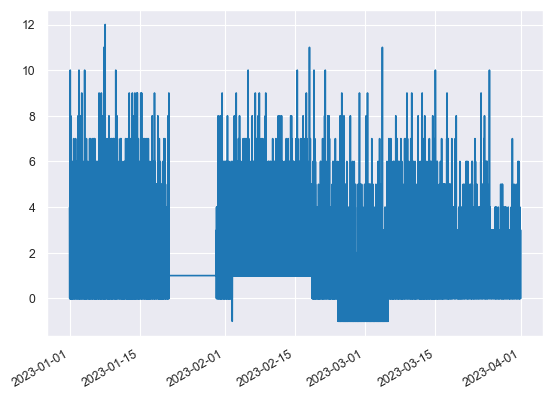

In [125]:
(tmp['ttls'] - tmp['expected']).plot()

In [81]:
informations['sum_e'] = informations.sum(axis=1)

In [82]:
informations['e_p'] = np.nan

In [83]:
tmp['expected'] = np.nan

In [84]:
for i,x in tmp['ttls'].items():
    print(i,x)
    informations.loc[i, 'e_p'] = np.median(informations.loc[i, f'p_{x}'])
    tmp.loc[i, 'expected'] = tmp.loc[i, f'p_{x}']

2023-01-01 00:00:36 11
2023-01-01 00:01:46 15
2023-01-01 00:07:17 12
2023-01-01 00:08:51 13
2023-01-01 00:09:47 11
2023-01-01 00:10:19 12
2023-01-01 00:18:07 14
2023-01-01 00:19:08 12
2023-01-01 00:19:51 11
2023-01-01 00:20:16 11
2023-01-01 00:27:23 12
2023-01-01 00:28:00 11
2023-01-01 00:28:16 14
2023-01-01 00:30:49 11
2023-01-01 00:37:14 15
2023-01-01 00:38:28 11
2023-01-01 00:40:31 12
2023-01-01 00:41:34 13
2023-01-01 00:48:32 13
2023-01-01 00:48:34 12
2023-01-01 00:48:54 13
2023-01-01 00:49:21 11
2023-01-01 00:57:24 12
2023-01-01 00:57:44 12
2023-01-01 00:58:22 13
2023-01-01 01:00:10 13
2023-01-01 01:10:17 14
2023-01-01 01:10:36 11
2023-01-01 01:11:15 12
2023-01-01 01:11:59 13
2023-01-01 01:19:50 11
2023-01-01 01:19:55 11
2023-01-01 01:20:06 11
2023-01-01 01:20:45 14
2023-01-01 01:27:42 11
2023-01-01 01:27:42 16
2023-01-01 01:29:53 11
2023-01-01 01:30:29 11
2023-01-01 01:38:43 11
2023-01-01 01:39:04 11
2023-01-01 01:39:46 11
2023-01-01 01:41:25 13
2023-01-01 01:47:00 11
2023-01-01 

In [85]:
informations.sample(n=10).sort_index()

p_11      p_15      p_12      p_13      p_14      p_16      p_21      p_19      p_18      p_17      p_20      p_22      p_23      p_10     sum_e       e_p
2023-01-06 02:58:58  0.346734  0.089604  0.350425  0.251469  0.176084  0.070540  0.011064  0.009162  0.022894  0.042603  0.005064       NaN       NaN       NaN  2.751284  0.346734
2023-01-11 01:49:33  0.344877  0.100294  0.346116  0.254099  0.179254  0.064248  0.007416  0.008456  0.024437  0.039196  0.006345  0.002870  0.002870       NaN  2.760954  0.344877
2023-01-16 19:10:09  0.344484  0.101885  0.346757  0.255362  0.172441  0.062614  0.005174  0.008016  0.024943  0.038535  0.009359  0.001986  0.001986       NaN  2.747088  0.344484
2023-01-31 08:28:43  0.343356  0.104228  0.345755  0.256549  0.170104  0.061778  0.004185  0.009699  0.023359  0.035040  0.008660  0.001600  0.001600       NaN  2.731827  0.345755
2023-02-17 06:47:14  0.367248  0.125408  0.366297  0.296241  0.203569  0.074747  0.003594  0.011153  0.024630  0.041398  0.007911  0.001061  0.001061  0.001959  3.052553  0.296241
2023-02-26 21:51:33  0.364419  0.130269  0.367294  0.301967  0.209549  0.076868  0.003419  0.010958  0.025292  0.042952  0.008798  0.002044  0.000908  0.001679  3.092834  0.364419
2023-02-28 23:29:43  0.365314  0.130272  0.367054  0.300879  0.208254  0.075902  0.003637  0.010645  0.024593  0.042861  0.008545  0.001983  0.000880  0.001629  3.084896  0.367054
2023-03-03 21:20:40  0.366231  0.129829  0.366738  0.298986  0.206738  0.074608  0.003799  0.010740  0.024109  0.043223  0.008482  0.001906  0.000846  0.001565  3.075600  0.366231
2023-03-08 14:20:30  0.367121  0.128955  0.366236  0.296648  0.204653  0.073599  0.003589  0.010394  0.023802  0.043265  0.008023  0.001799  0.001145  0.001477  3.061412  0.128955
2023-03-12 16:48:41  0.367561  0.127404  0.365800  0.295248  0.202859  0.072429  0.003434  0.010177  0.023734  0.043512  0.008377  0.001720  0.001094  0.001412  3.049521  0.367561

In [107]:
e = informations.drop(columns=['sum_e', 'e_p']).min(axis=1, skipna=True)

<AxesSubplot: >

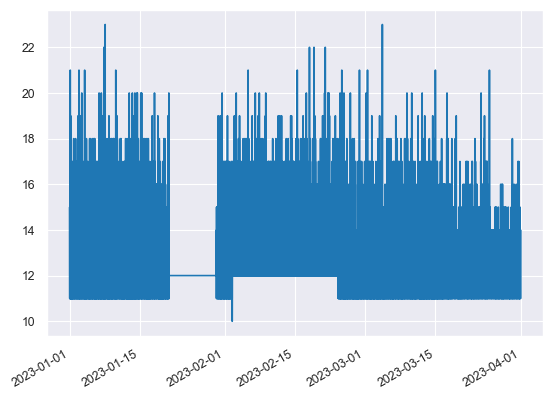

In [108]:
tmp['ttls'].plot()

<AxesSubplot: >

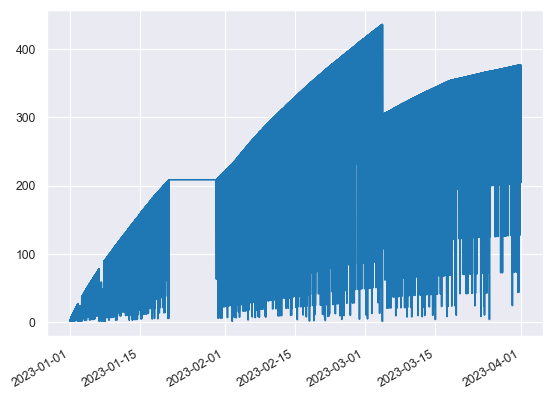

In [109]:
(informations['e_p']/e).plot()

In [97]:
x=((probs.max(axis=1)/tmp['expected']).apply(np.log))#.plot()

In [98]:
from trct.models import NormalModel

In [99]:
nm = NormalModel('u', 'v')
for i, v in enumerate(x):
    nm.log(i,v)

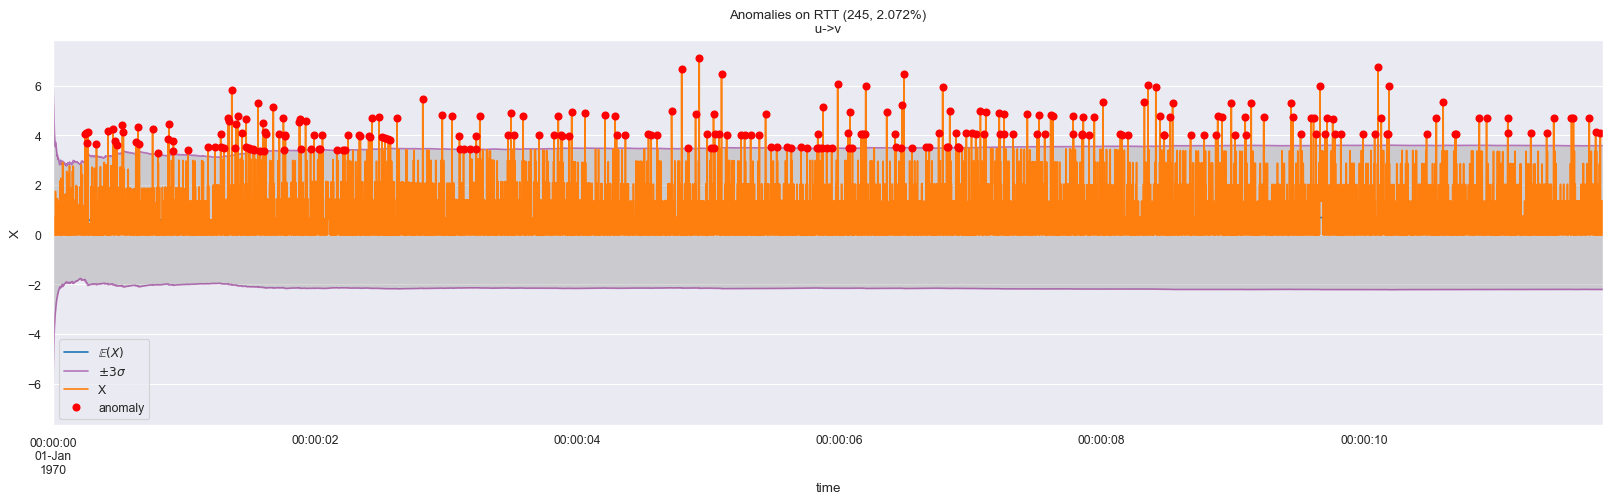

In [100]:
fig  = plt.figure(figsize=(20, 5))
nm.plot(fig.gca())

In [107]:
xxxx = nm.to_frame().reset_index()
xxx = xxxx[xxxx['anomalies']]

In [109]:
xxx.index

Index([  246,   254,   260,   265,   332,   421,   458,   473,   488,   530,
       ...
       11097, 11098, 11273, 11394, 11448, 11584, 11599, 11720, 11768, 11804], dtype='int64', length=245)

In [124]:
tmp['marked'] = False

In [126]:
tmp.columns

Index(['ttls', 'p_11', 'p_8', 'p_13', 'p_12', 'p_9', 'p_10', 'p_16', 'p_14', 'p_17', 'p_15', 'p_19', 'p_18', 'var_p_11', 'var_p_8', 'var_p_13', 'var_p_12', 'var_p_9', 'var_p_10', 'var_p_16', 'var_p_14', 'var_p_17', 'var_p_15', 'var_p_19', 'var_p_18', 'm_11', 'm_8', 'm_13', 'm_12', 'm_9', 'm_10', 'm_16', 'm_14', 'm_17', 'm_15', 'm_19', 'm_18', 'n_11', 'n_8', 'n_13', 'n_12', 'n_9', 'n_10', 'n_16', 'n_14', 'n_17', 'n_15', 'n_19', 'n_18', 'anomalies', 'anomalies_y', 'u', 'v', 'total', 'expected', 'marked'], dtype='object')

In [127]:
tmp.iloc[xxx.index, -1] = True

In [130]:

tmp['marked'].value_counts()

marked
False    11580
True       245
Name: count, dtype: int64

In [134]:
tmp[['ttls', 'marked']].plot(kind='scatter', y='ttls', color='marked' )

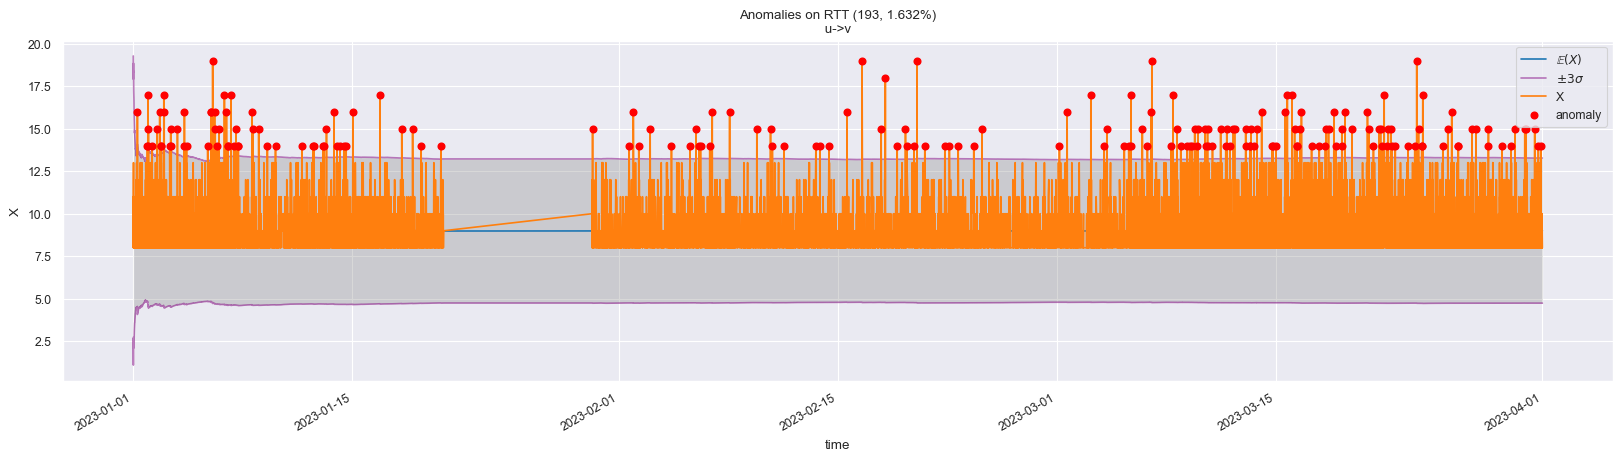

In [153]:
fig = plt.figure(figsize=(20, 5))
nm2.plot(fig.gca())

2a00:139c:5:585::3


None

2001:1458:302:38::1


None

2001:1458:302:27::2


None

2001:760:ffff:110::25


None

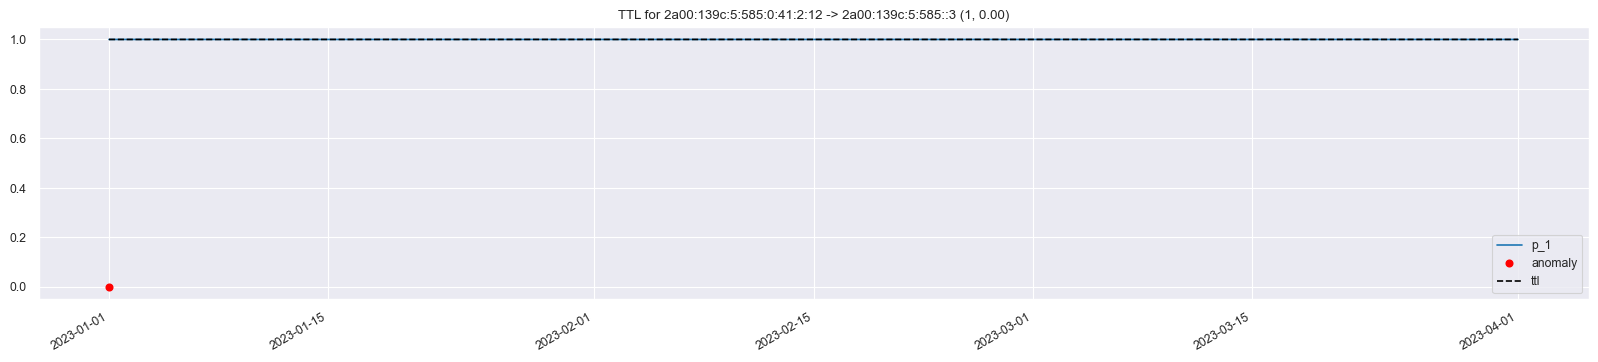

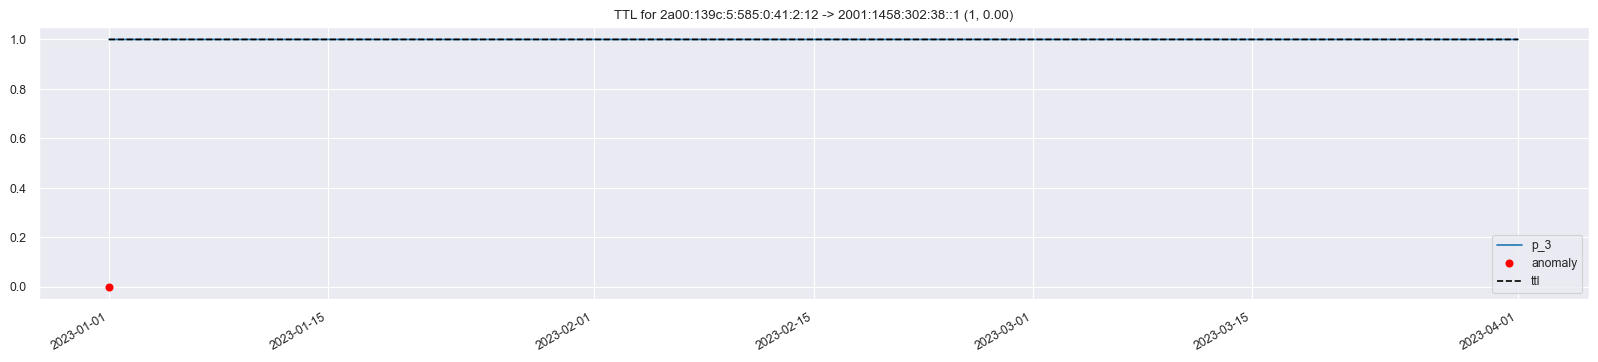

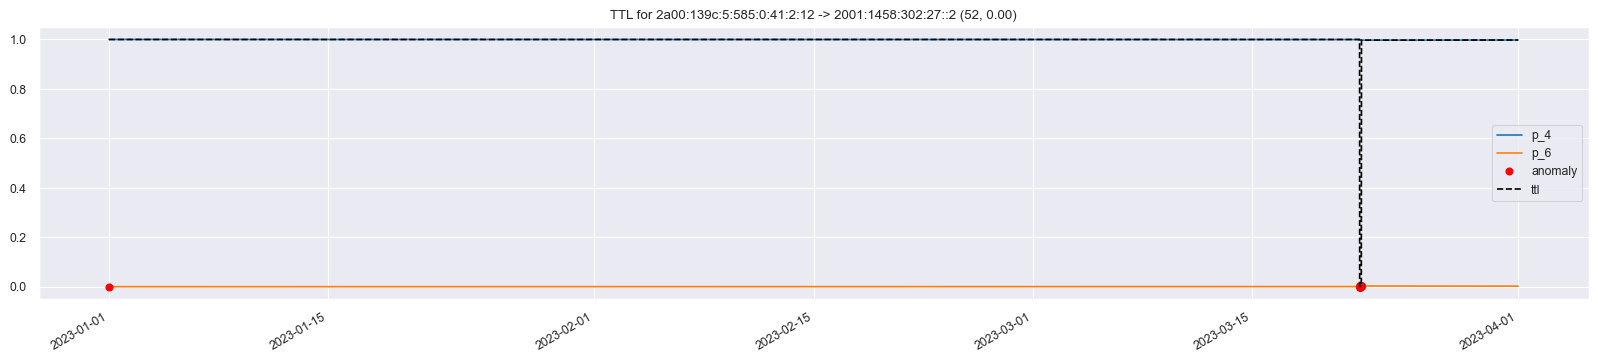

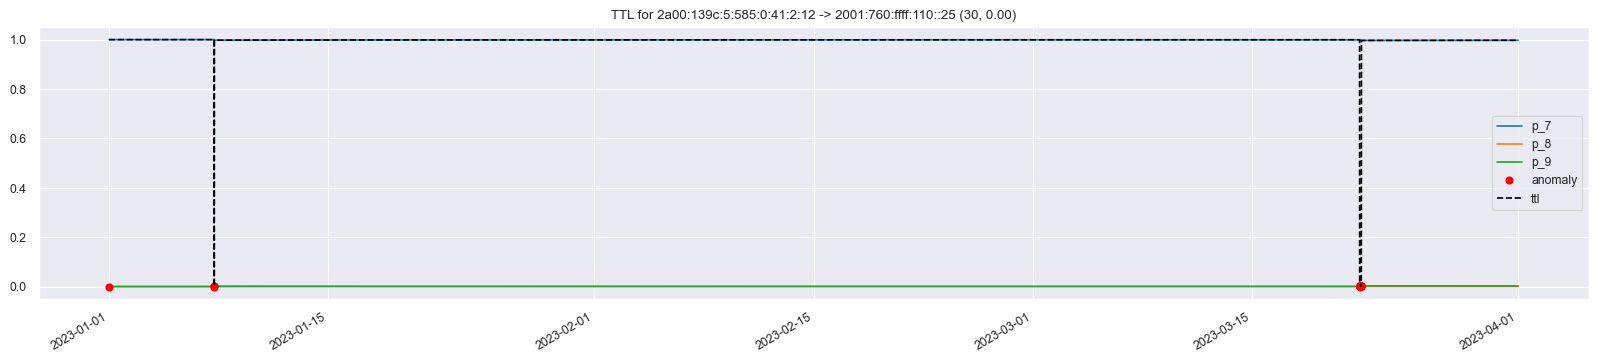

In [17]:
ctr = 0
for i, x in ta.ttl_models.items():
    if ctr==4:
        break
    print(i)
    fig = plt.figure(figsize=(20, 4))
    display(x.plot(plt.gca()))
    ctr+=1

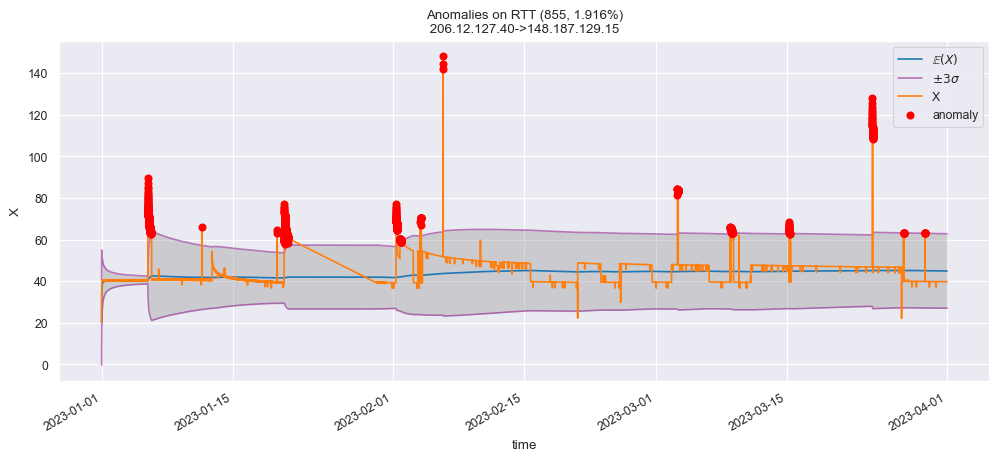

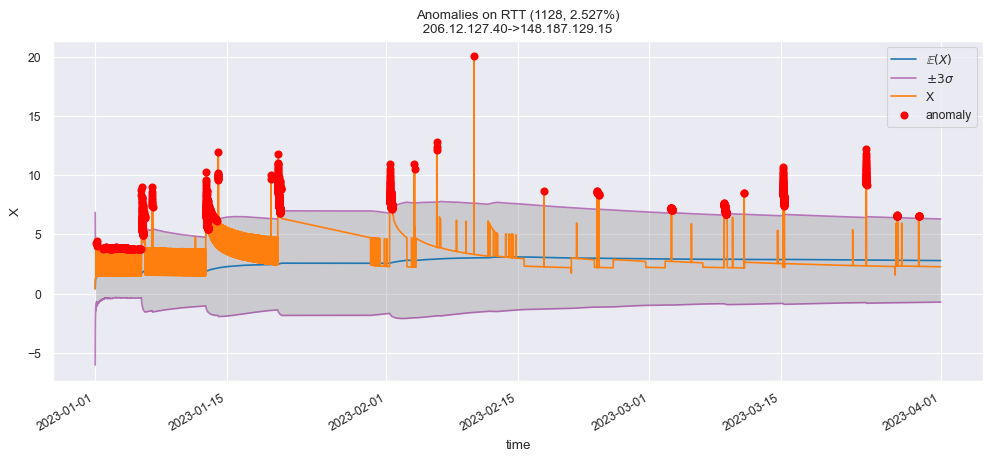

In [ ]:
# fig, (ax1, ax2) = plt.subplots( 2, 1, figsize=(12, 5))
fig = plt.figure(figsize=(12, 5))
ax = plt.gca()
ta.hops_ip_model.global_anomaly_model.plot(ax)

fig = plt.figure(figsize=(12, 5))
ax = plt.gca()
ta.hops_ip_model.local_anomaly_model.plot(ax)

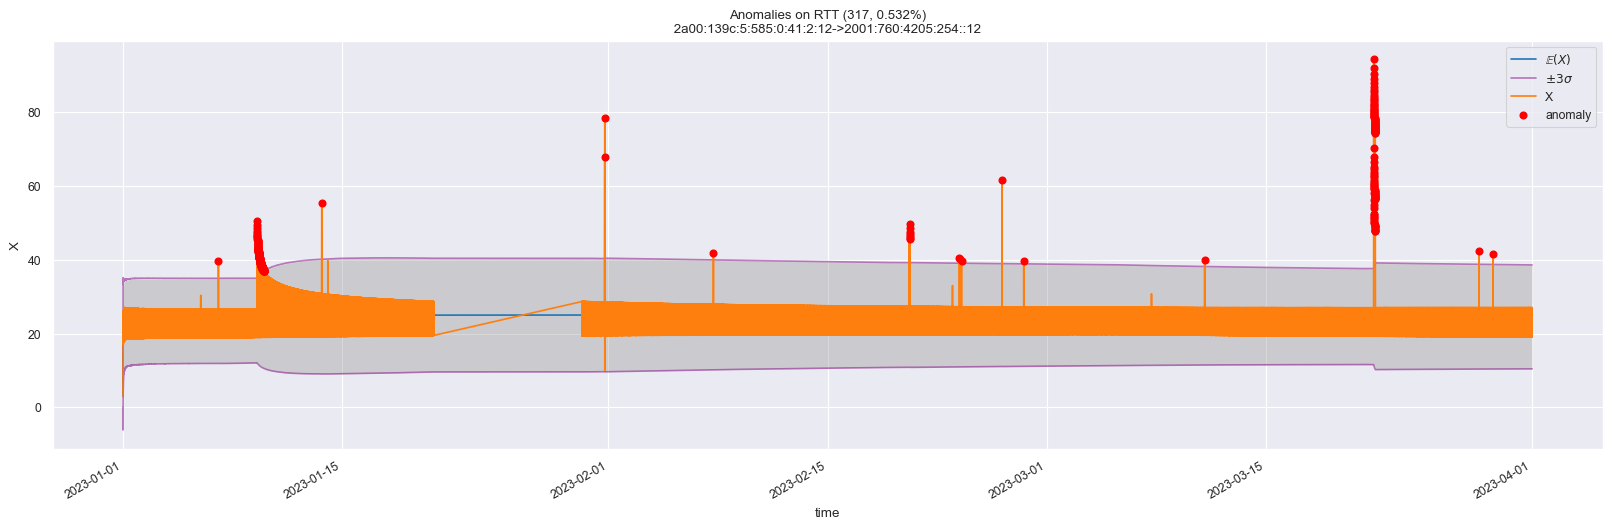

In [ ]:
fig=plt.figure(figsize=(20, 6))
ta.hops_ip_model.weighted_anomaly_model.plot(plt.gca())

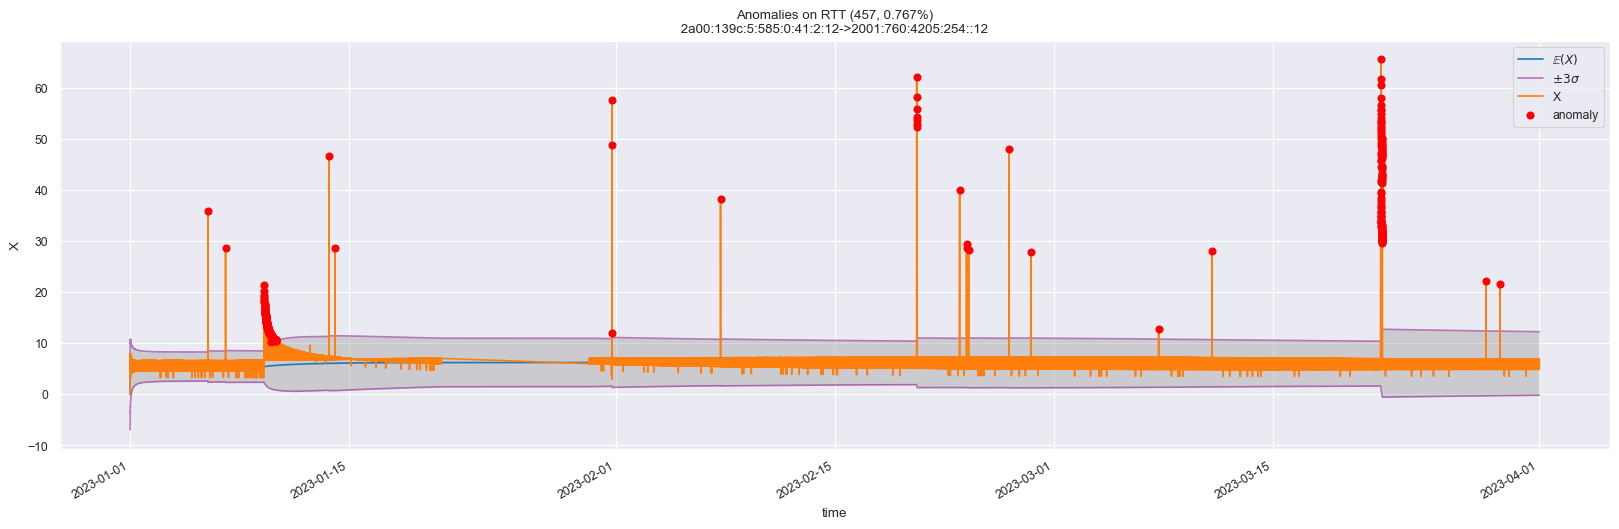

In [ ]:
fig=plt.figure(figsize=(20, 6))
ta.hops_ip_model.node_prob_edge_prob.plot(plt.gca())

In [ ]:
s = np.array(ta.hops_ip_model.weighted_probs)

/tmp/ipykernel_5622/145979019.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(s))


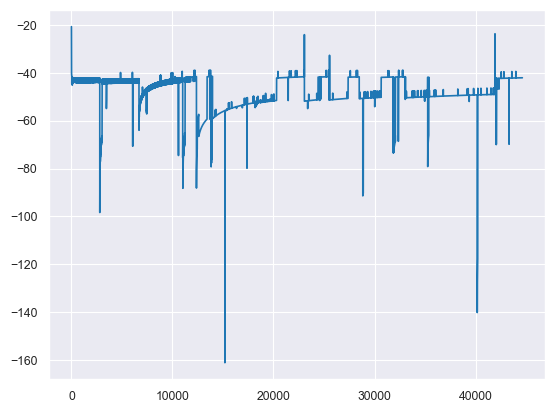

In [ ]:
plt.plot(np.log(s))

In [ ]:
df_paths = ta.hops_ip_model.to_frame()

In [1]:
# ta.hops_ip_model.plot_graph(plt.gca(), node_layout=final_pos2)

<AxesSubplot: xlabel='paths'>

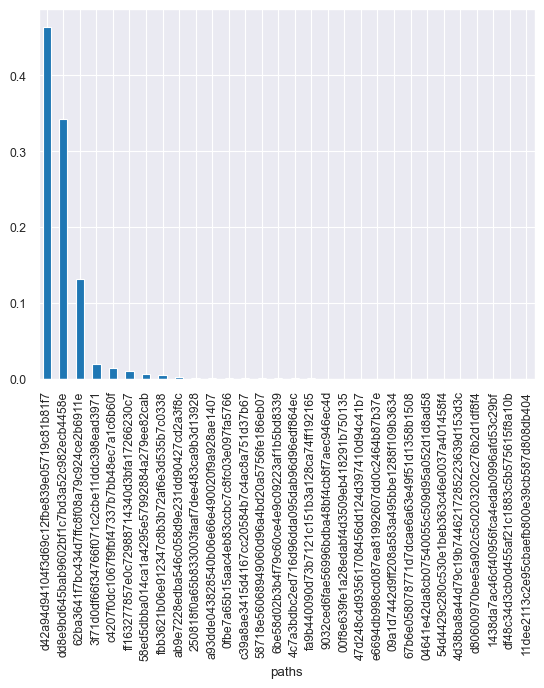

In [ ]:

(df_paths.groupby('paths').size().sort_values(ascending=False)/df_paths.shape[0]).plot(kind='bar')

In [ ]:
N=10

In [ ]:

paths = df_paths.groupby('paths').size().sort_values(ascending=False).head(N).index.tolist()

In [ ]:
mapper = { v:f'top {i+1}' for i, v in enumerate(df_paths.groupby('paths').size().sort_values(ascending=False).rank().index.tolist())}

In [ ]:
df_paths[df_paths['paths'].isin(paths)]['paths'].unique()

array(['62ba3641f7bc434d7ffc8f08a79c924ce2b6911e',
       'c4207f0dc1067f9fbf47337b7bb48ec7a1c6b60f',
       'fbb3621b06e912347c8b3b72af6e3d535b7c0338',
       'dd8e9bd645bab9602bf1c7bd3a52c982ecb4458e',
       'ff163277857e0c72988714340d3bfa17266230c7',
       '3f71d0df66f34766f071c2cbe11ddc398ead3971',
       'd42a94d94104f3d69c12fbe839e05719c81b81f7',
       '250818f0a65b833003faaf7dee483ca9b3d13928',
       '58ed5dbba014ca1a4295e57992884a279ee82cab',
       'ab9e7228edba546c058d9e231dd90427cd2a3f8c'], dtype=object)

<AxesSubplot: >

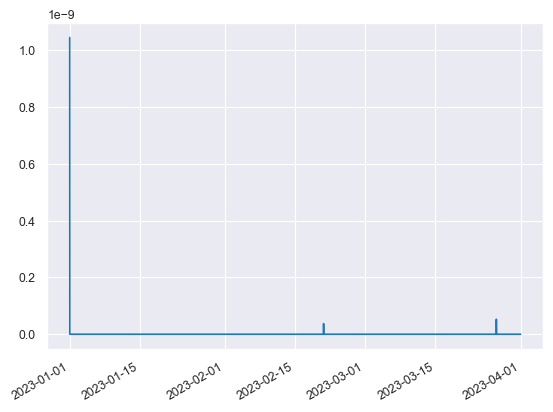

In [ ]:
df_paths['weighted_probs'].apply(lambda x: )

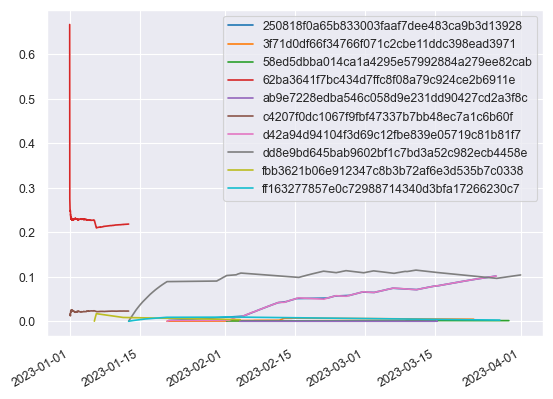

In [ ]:
df_paths[df_paths['paths'].isin(paths)].groupby('paths')['local_probs'].plot()
plt.legend()
# plt.legend([mapper[x] for x in df_paths[df_paths['paths'].isin(paths)]['paths'].unique()], )

In [ ]:
ta.ttl_models

In [ ]:
with open(files[43456], "r") as f:
    json_data = json.load(f)

In [ ]:
node_colors = defaultdict(lambda : 'blue')

In [ ]:
path = [ta.hops_ip_model.node_to_index[x] for x in json_data['hops']] + [0]

for node in g.nodes:
    node_colors[node] = 'blue'

for node in path:
    node_colors[node] = 'red'

node_colors[ta.hops_ip_model.node_to_index['206.12.127.40']] = 'green'
node_colors[ta.hops_ip_model.node_to_index['148.187.129.15']] =  'green'

In [ ]:

#TODO add hash of path to df

In [ ]:
node_sizes = defaultdict(lambda : 1)

data = np.array(list(ta.hops_ip_model.node_in_counts.values()))   

mx = data.max()
mn = data.min()

for k, v in ta.hops_ip_model.node_out_counts.items():
    node_sizes[ta.hops_ip_model.node_to_index[k]] = ((v-mn)/(mx-mn))*2

In [ ]:

fig=plt.figure(figsize=(20, 20))
ng.Graph(
        g,
        layout='dot',
        arrows=True,
        weighted=True,
        node_color={x:node_colors[x] for x in g.nodes}, # TODO: this based on src/dest/normal
        # node_edge_color=clors,
        node_labels={x: i for i, x in enumerate(g.nodes)},
        # node_shape={x: tier_mapping[x] for x in graph.nodes},  # so^>v<dph8
        edge_cmap="RdYlGn",
        # node_colors=node_colors,
        # edge_colors=node_colors,
        node_size={x:node_sizes[x] for x in g.nodes},
        node_layout=final_pos2,
            
            )

NameError: name 'g' is not defined

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# ta.plot()

In [ ]:
from trct.models import NormalModel

In [ ]:
max_data = (np.array(ta.ttl_models["148.187.129.15"].most_probable_ttl))


In [ ]:
m = ta.ttl_models["148.187.129.15"]

In [ ]:
df = m.to_frame()

In [ ]:
tmp = df.reset_index()
c=tmp[tmp['anomalies']]['anomalies'].index.tolist()

Text(0.5, 1.0, 'Outliers = 0.04927679453777738')

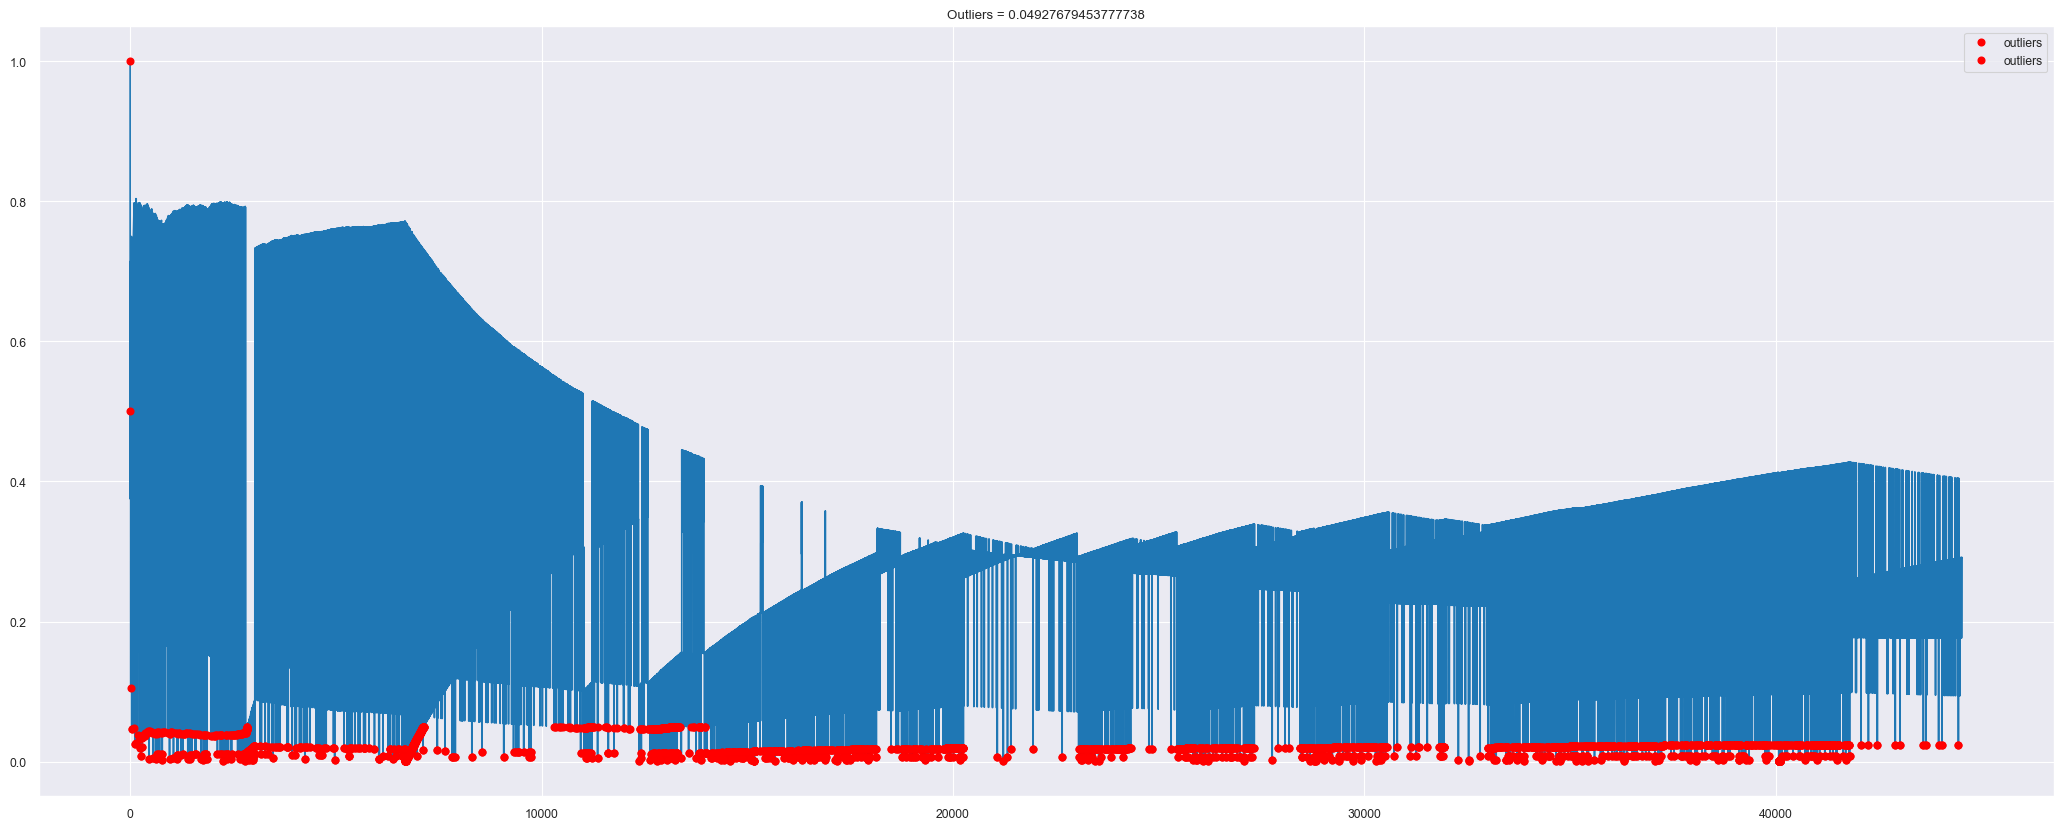

In [ ]:
fig = plt.figure(figsize=(26, 10))
max_data = (np.array(ta.ttl_models["148.187.129.15"].ttl_prob))
plt.plot(max_data)
index = np.where(max_data < 0.05)
plt.plot(index[0], max_data[index], 'ro', label="outliers")
plt.plot(c, max_data[c], 'ro', label="outliers")
plt.legend()
plt.title(f"Outliers = {len(index[0])/len(max_data)}")

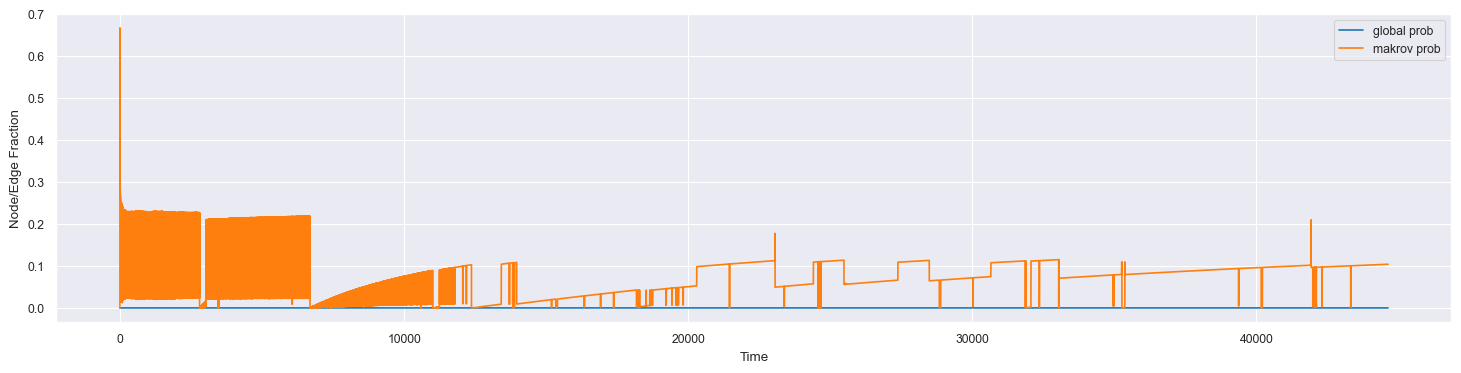

In [ ]:
fig = plt.figure(figsize=(18, 4))
ax = plt.gca()
ta.hops_ip_model.plot(ax)
ax.legend()

In [ ]:
tmp = ta.hops_ip_model.to_frame()

In [ ]:
ts, path = zip(*ta.hops_ip_model.unique_paths)

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
x = pd.DataFrame({'path': path, 'ts':pd.to_datetime(ts, unit='ms')})

In [ ]:
cc = x.groupby('path').agg({'ts': ['min', 'max']})

In [ ]:
from trct.models import NormalModel

In [ ]:
m = NormalModel(src, dest, )

In [ ]:
tmp['local_probs'].plot()

In [ ]:
m = NormalModel(src, dest, alpha_0=0.5, mu_0=3, sigma_0=1)

for i,x in tmp['global_probs'].apply(np.log).items(): #diff
    if(np.isnan(x)):
        continue
    m.log(i.timestamp()*1000, -x)

fig = plt.figure(figsize=(20, 6))
ax =fig.gca()
m.plot(ax)
ax.set_title("Normal Model")

In [ ]:
m = NormalModel(src, dest, alpha_0=0.5, mu_0=3, sigma_0=1)

for i,x in tmp['local_probs'].apply(np.log).items(): #diff
    if(np.isnan(x)):
        continue
    m.log(i.timestamp()*1000, -x)

fig = plt.figure(figsize=(20, 6))
m.plot(fig.gca())

In [ ]:
m = NormalModel(src, dest, alpha_0=0.5, mu_0=3, sigma_0=1)

for i,x in tmp['local_probs'].apply(np.log).items(): #diff
    if(np.isnan(x)):
        continue
    m.log(i.timestamp()*1000, -x)

fig = plt.figure(figsize=(20, 6))
m.plot(fig.gca())

In [ ]:
m = NormalModel(src, dest, alpha_0=1, mu_0=20, sigma_0=1)

for i,x in tmp['global_probs'].apply(np.log).items(): #diff
    if(np.isnan(x)):
        continue
    m.log(i.timestamp()*1000, -x)

fig = plt.figure(figsize=(20, 6))
m.plot(fig.gca())

In [ ]:
m = NormalModel(src, dest, alpha_0=3, mu_0=0, sigma_0=1)
 
for i,x in tmp['local_probs'].apply(np.log).diff().clip(-np.inf, 1).items(): #diff    
    if(np.isnan(x)):
        continue
    
    m.log(i.timestamp()*1000, -x)
fig = plt.figure(figsize=(20, 6))
m.plot(fig.gca())

In [ ]:
m = NormalModel(src, dest, alpha_0=3, mu_0=20, sigma_0=1)

for i,x in tmp['global_probs'].apply(np.log).diff().items(): #diff
    if(np.isnan(x)):
        continue
    m.log(i.timestamp()*1000, -x)

fig = plt.figure(figsize=(20, 6))
m.plot(fig.gca())

In [ ]:
tmp['local_probs'].plot()

In [ ]:
fig = plt.figure(figsize=(22, 4))
fig.gca().xaxis.set_label("p")
# (tmp['global_probs'] / tmp['local_probs']).diff().plot(ax=fig.gca())
x=(tmp['local_probs'])
x.plot(ax=fig.gca())
# (tmp['global_probs']-tmp['local_probs']).diff().plot(ax=fig.gca())
# (tmp['global_probs']).diff().plot(ax=fig.gca())
# (tmp['local_probs']).plot(ax=fig.gca())
# plt.plot(cc['ts']['min'], [0]*len(cc), 'o')
# plt.plot(cc['ts']['max'], [0]*len(cc), '>')
# (tmp['local_probs'][tmp['local_probs']<0.025]).plot(ax=fig.gca(), style='x')
# tmp[tmp['weighted_probs']<0.05]['weighted_probs'].plot(ax=fig.gca(), style='x')
x[x<(0.05)].plot(ax=fig.gca(), style='x', c='r')
# print(tmp[tmp['weighted_probs']<0.05]['weighted_probs'].shape)
print(x[x<(0.05)].shape[0]/x.shape[0])
# todo try path entropy

In [ ]:
fig = plt.figure(figsize=(22, 4))
fig.gca().xaxis.set_label("p")
# (tmp['global_probs'] / tmp['local_probs']).diff().plot(ax=fig.gca())
x=((tmp['global_probs']))
x.plot(ax=fig.gca())
# (tmp['global_probs']-tmp['local_probs']).diff().plot(ax=fig.gca())
# (tmp['global_probs']).diff().plot(ax=fig.gca())
# (tmp['local_probs']).plot(ax=fig.gca())
# plt.plot(cc['ts']['min'], [0]*len(cc), 'o')
# plt.plot(cc['ts']['max'], [0]*len(cc), '>')
# (tmp['local_probs'][tmp['local_probs']<0.025]).plot(ax=fig.gca(), style='x')
# tmp[tmp['weighted_probs']<0.05]['weighted_probs'].plot(ax=fig.gca(), style='x')
x[x<(0.05)].plot(ax=fig.gca(), style='x', c='r')
# print(tmp[tmp['weighted_probs']<0.05]['weighted_probs'].shape)
print(x[x<(0.05)].shape[0]/x.shape[0])

In [ ]:
fig = plt.figure(figsize=(22, 4))
fig.gca().xaxis.set_label("p")
# (tmp['global_probs'] / tmp['local_probs']).diff().plot(ax=fig.gca())
x=((tmp['weighted_probs']))
x.plot(ax=fig.gca())
# (tmp['global_probs']-tmp['local_probs']).diff().plot(ax=fig.gca())
# (tmp['global_probs']).diff().plot(ax=fig.gca())
# (tmp['local_probs']).plot(ax=fig.gca())
# plt.plot(cc['ts']['min'], [0]*len(cc), 'o')
# plt.plot(cc['ts']['max'], [0]*len(cc), '>')
# (tmp['local_probs'][tmp['local_probs']<0.025]).plot(ax=fig.gca(), style='x')
# tmp[tmp['weighted_probs']<0.05]['weighted_probs'].plot(ax=fig.gca(), style='x')
x[x<(0.0005)].plot(ax=fig.gca(), style='x', c='r')
# print(tmp[tmp['weighted_probs']<0.05]['weighted_probs'].shape)
print(x[x<(0.005)].shape[0]/x.shape[0])